In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
housedata = pd.read_csv('C:/Users/nimis/OneDrive/Documents/assignment/table.csv')

Univariate analysis

In [7]:
pd.set_option('display.max_columns', None)
housedata.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
housedata.shape

(1460, 81)

In [9]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
pd.set_option('display.max_columns', None)
housedata.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [11]:
# Identify columns with missing values
missing_values = housedata.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Sort the output by the number of missing values
sorted_output = columns_with_missing_values.sort_values(ascending=False)

for col in sorted_output.index:
    print(f"{col:15} {housedata[col].dtype} -  {missing_values[col]}")

PoolQC          object -  1453
MiscFeature     object -  1406
Alley           object -  1369
Fence           object -  1179
FireplaceQu     object -  690
LotFrontage     float64 -  259
GarageType      object -  81
GarageYrBlt     float64 -  81
GarageFinish    object -  81
GarageQual      object -  81
GarageCond      object -  81
BsmtExposure    object -  38
BsmtFinType2    object -  38
BsmtFinType1    object -  37
BsmtCond        object -  37
BsmtQual        object -  37
MasVnrArea      float64 -  8
MasVnrType      object -  8
Electrical      object -  1


When the list of missing values was compared with the Data Dictionary, it was found that for many variables, the entry ‘NA’ does not represent a missing value.

Instead, it indicates that the feature is not available. Therefore, we cannot delete these variables even though they show a high number of ‘NA’ entries. So new variables are created to show whether the feature is available or not. If there is number ther it is available else not available 

However, there are some exceptions where ‘NA’ is not defined in the Data Dictionary. These exceptions include the variables LotFrontage, GarageYrBlt, MasVnrArea, and Electrical. 
"LotFrontage" / “Linear feet of street connected to property” refers to the length of the property boundary that is adjacent to a street. If it is NA then it means there is no road adjacent to property boundary. So instead of NA it should be 0 as the rest of the values are numerical.



In [12]:
# Identify the columns that have entry 0 in it
columns_with_0s = housedata.columns[housedata.isin([0]).any()]

# Count the number of 0s in the columns that have entry 0 in it
count_0s_in_columns = []
for column in columns_with_0s:
    count_0s_in_columns.append(housedata[column].isin([0]).sum())

# Sort the columns by the number of 0s
sorted_columns = sorted(zip(columns_with_0s, count_0s_in_columns), key=lambda x: x[1], reverse=True)

# Print the sorted columns
for column, count_0s in sorted_columns:
    print(f"{column} - {count_0s}")

PoolArea - 1453
3SsnPorch - 1436
LowQualFinSF - 1434
MiscVal - 1408
BsmtHalfBath - 1378
ScreenPorch - 1344
BsmtFinSF2 - 1293
EnclosedPorch - 1252
HalfBath - 913
MasVnrArea - 861
BsmtFullBath - 856
2ndFlrSF - 829
WoodDeckSF - 761
Fireplaces - 690
OpenPorchSF - 656
BsmtFinSF1 - 467
BsmtUnfSF - 118
GarageCars - 81
GarageArea - 81
TotalBsmtSF - 37
FullBath - 9
BedroomAbvGr - 6
KitchenAbvGr - 1


In the data, it was observed that when there is no 'PoolQC', the ‘PoolArea’ is recorded as 0. 
Similarly, when the ‘MiscFeature’ is ‘NA’, the ‘MiscVal’ is 0. 
The value of ‘BsmtHalfBath’, when 0 indicates the non availability of basement half bathrooms. 

This means that there is no need to delete rows with zeros in a variable because 0 means the feature is not available and does not represent a missing value.

In [13]:
# dropping 'Id'
housedata = housedata.drop(['Id'], axis=1)

In [14]:
def replace_outliers(data):
    """Replace outliers using the interquartile range (IQR) method with the mean, median or mode value of the data based on the distribution of each variable."""

    # Make a copy of the DataFrame before inplace assignment
    housedata = data.copy()

    q1 = np.percentile(housedata, 25)
    q3 = np.percentile(housedata, 75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    outliers = np.where((housedata < lower_bound) | (housedata > upper_bound))[0]

    # Select the appropriate measure of central tendency based on the distribution of the data
    if housedata.skew() > 1:
        # If the data is highly skewed, use the median
        replacement_value = housedata.median()
    elif housedata.kurtosis() > 1:
        # If the data has high kurtosis, use the mode
        replacement_value = housedata.mode()[0]
    else:
        # Otherwise, use the mean
        replacement_value = housedata.mean()

    # Replace the outliers with the selected replacement value
    housedata[outliers] = replacement_value
    return housedata


# Select the numerical columns
numerical_cols = housedata.select_dtypes(include=[np.number]).columns

# Replace outliers for each numerical column
for col in numerical_cols:
    housedata[col] = replace_outliers(housedata[col])

In [15]:
# Calculate the correlation matrix.
correlation_matrix = housedata.corr()

# Sort the correlation matrix by correlation coefficient.
correlation_matrix = correlation_matrix.sort_values(by='SalePrice', ascending=False)

# Print the correlation coefficient lists in a table format.
for column1 in correlation_matrix.columns:
  for column2 in correlation_matrix.columns:
    if column1 != column2:
      print("('{}', '{}')".format(column1, column2), "|", correlation_matrix[column1][column2].round(2))

('MSSubClass', 'LotFrontage') | -0.2
('MSSubClass', 'LotArea') | -0.24
('MSSubClass', 'OverallQual') | 0.16
('MSSubClass', 'OverallCond') | -0.11
('MSSubClass', 'YearBuilt') | 0.1
('MSSubClass', 'YearRemodAdd') | 0.1
('MSSubClass', 'MasVnrArea') | 0.04
('MSSubClass', 'BsmtFinSF1') | -0.04
('MSSubClass', 'BsmtFinSF2') | nan
('MSSubClass', 'BsmtUnfSF') | -0.04
('MSSubClass', 'TotalBsmtSF') | -0.12
('MSSubClass', '1stFlrSF') | -0.09
('MSSubClass', '2ndFlrSF') | 0.33
('MSSubClass', 'LowQualFinSF') | nan
('MSSubClass', 'GrLivArea') | 0.19
('MSSubClass', 'BsmtFullBath') | 0.01
('MSSubClass', 'BsmtHalfBath') | nan
('MSSubClass', 'FullBath') | 0.19
('MSSubClass', 'HalfBath') | 0.2
('MSSubClass', 'BedroomAbvGr') | -0.03
('MSSubClass', 'KitchenAbvGr') | nan
('MSSubClass', 'TotRmsAbvGrd') | 0.13
('MSSubClass', 'Fireplaces') | 0.08
('MSSubClass', 'GarageYrBlt') | 0.12
('MSSubClass', 'GarageCars') | 0.08
('MSSubClass', 'GarageArea') | 0.01
('MSSubClass', 'WoodDeckSF') | 0.05
('MSSubClass', 'OpenPor

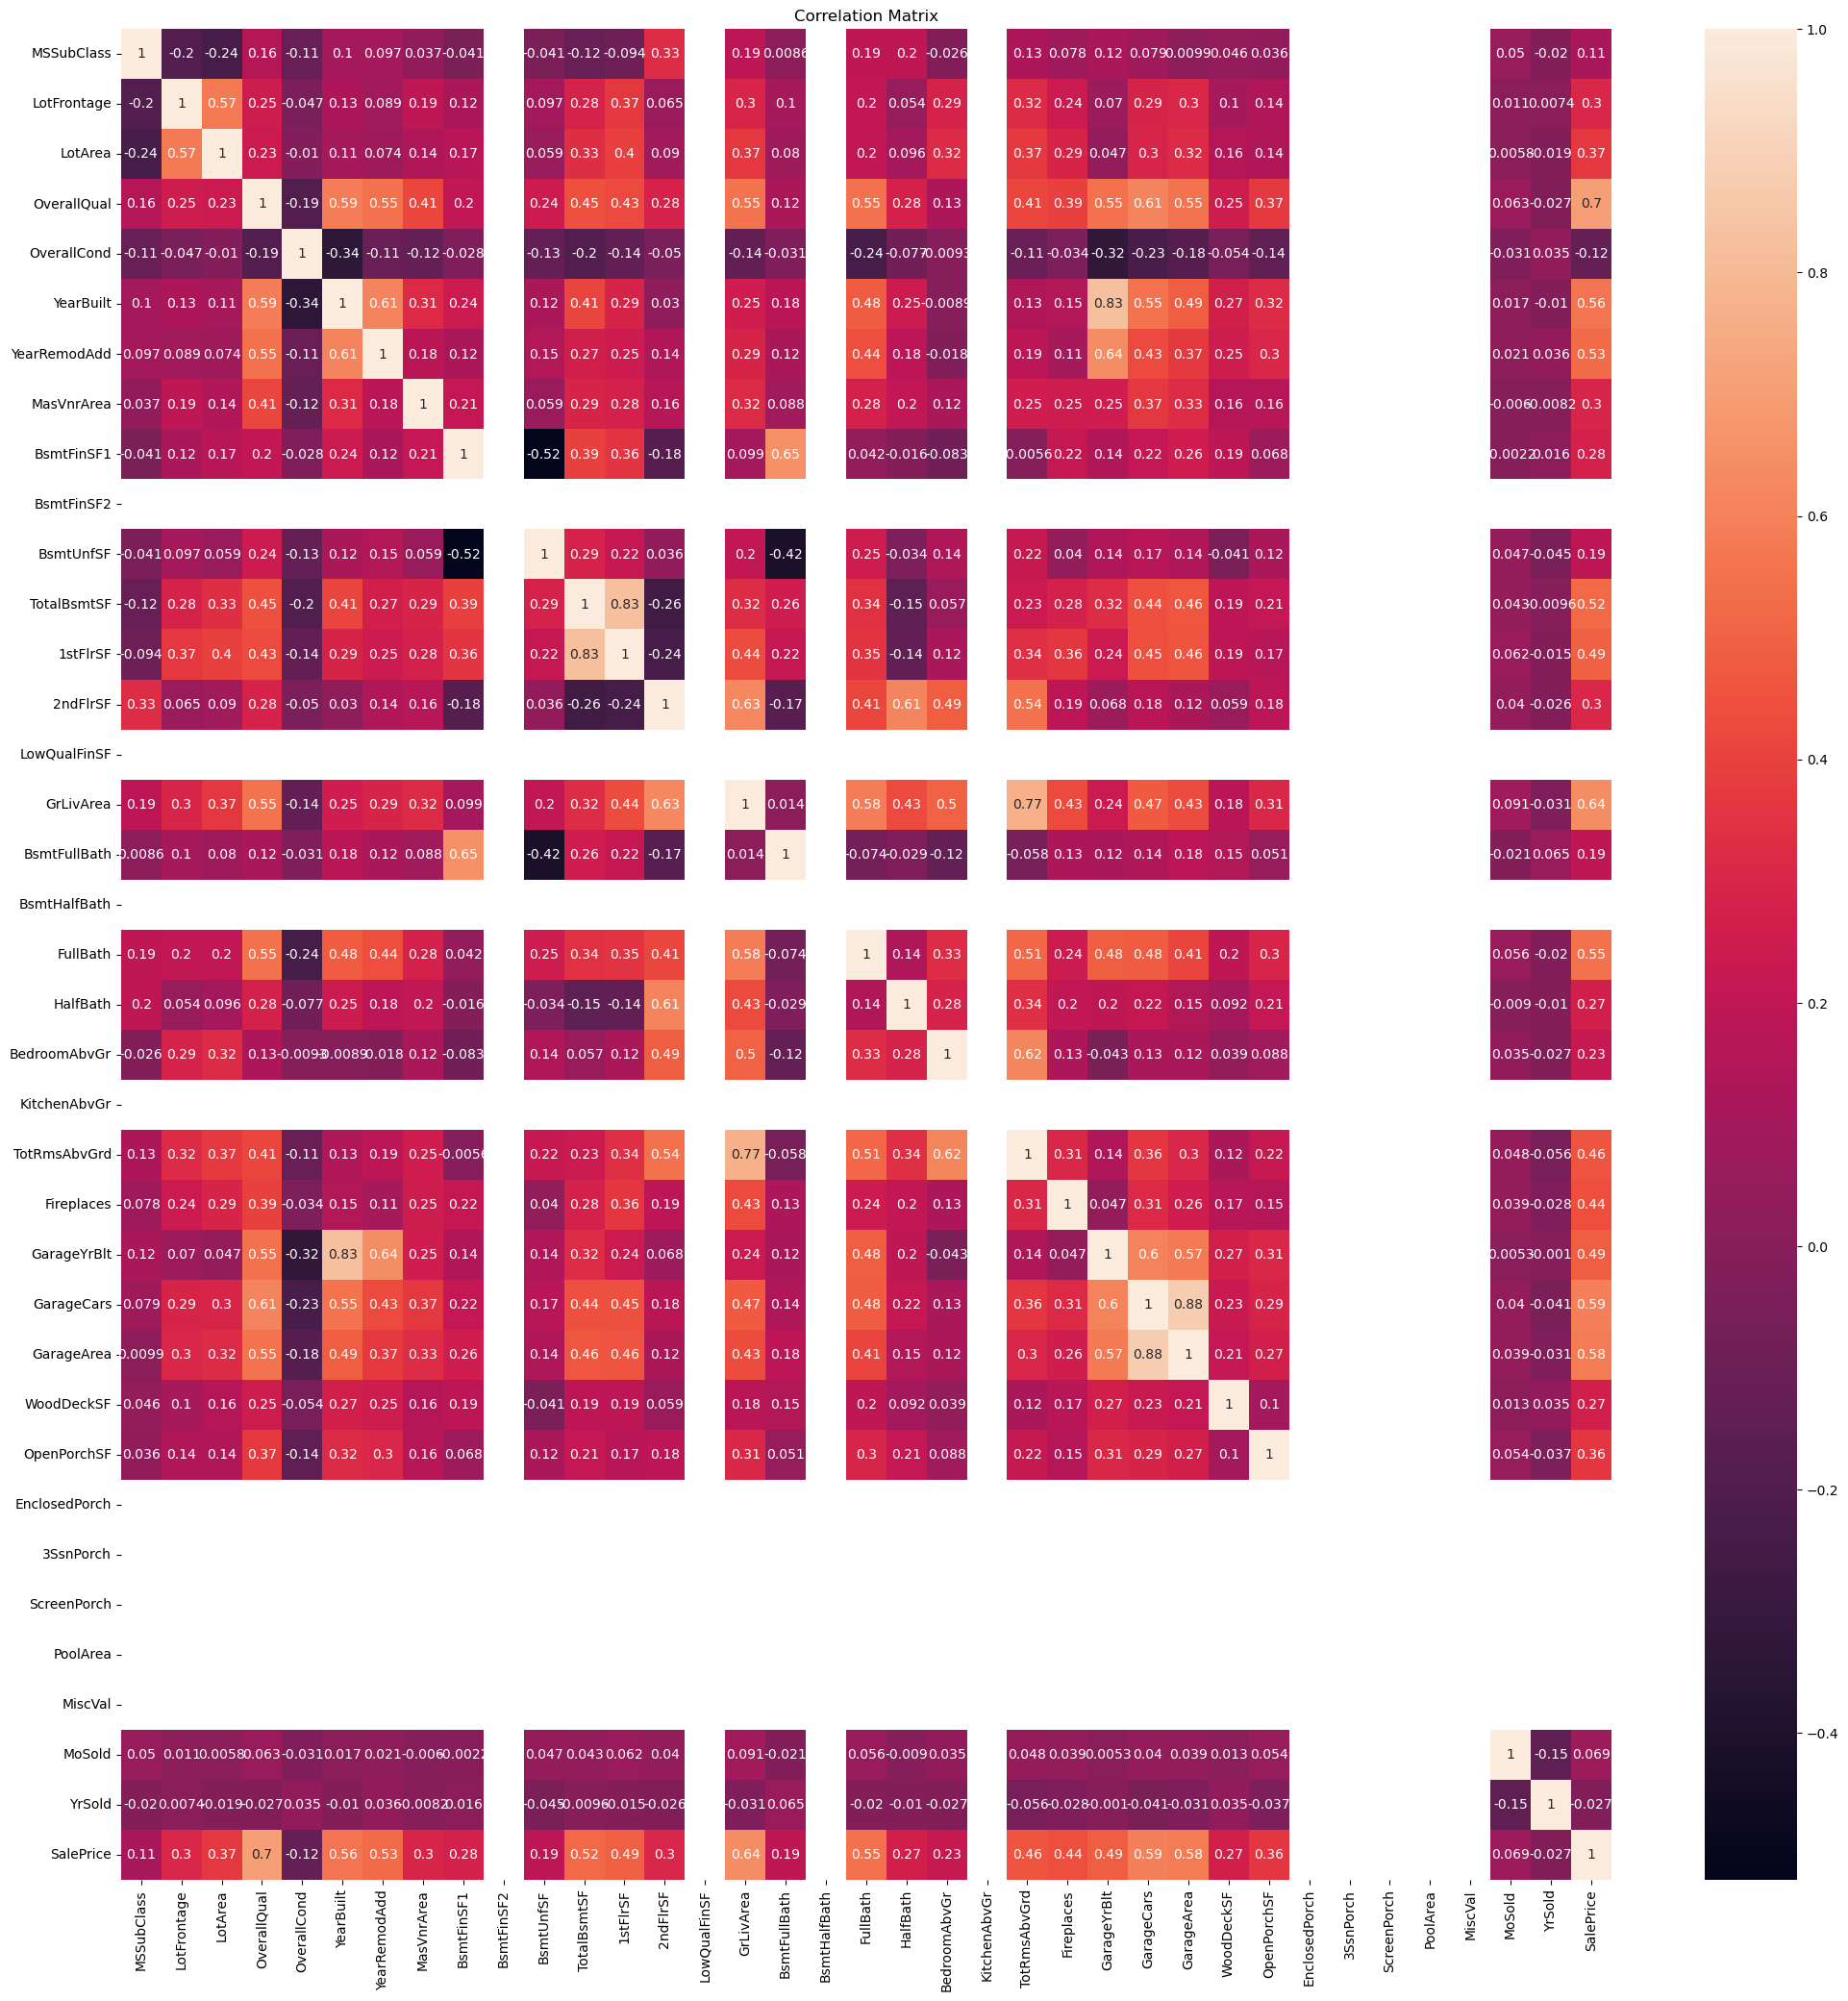

In [16]:
# Calculate the correlation matrix
correlation_matrix = housedata.corr()

import matplotlib.pyplot as plt
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Based on the correlation coefficient table and plot the following are the ones having more than .8 correlation (Multi collinearity removal)

Variable 1	 --------	Variable 2	 --------	Correlation coefficient

GarageCars	 --------	 GarageArea 	 --------	0.88
				
GarageArea	 --------	 GarageCars 	 --------	0.88
				
YearBuilt	 --------	 GarageYrBlt 	 --------	0.83
				
GrLivArea	 --------	 TotRmsAbvGrd 	 --------	0.83
				
TotRmsAbvGrd	 --------	 GrLivArea 	 --------	0.83
				
GarageYrBlt	 --------	 YearBuilt 	 --------	0.83
				
TotalBsmtSF	 --------	 1stFlrSF 	 --------	0.82
				
1stFlrSF	 --------	 TotalBsmtSF 	 --------	0.82



One of the pair (GarageCars, GarageYrBlt, TotRmsAbvGrd, GarageYrBlt, TotalBsmtSF) will be removed as there is high correlation between the variable.


In [17]:
housedata.shape

(1460, 80)

In [18]:
# Drop the Utilities_NoSeWa variable
data_encoded = data_encoded.drop('Utilities_NoSeWa', axis=1)

NameError: name 'data_encoded' is not defined

In [ ]:
# Get the categorical variables
categorical_data = housedata.select_dtypes(include=["object"])

# Encode the categorical variables and drop the first column for each categorical variable
data_encoded = pd.get_dummies(housedata, columns=categorical_data.columns, drop_first=True)

# Calculate the correlation matrix of the predictor variables
corr_matrix = data_encoded.corr()

# Find pairs of predictor variables with a correlation coefficient of 1 or -1
perfect_collinearity = corr_matrix[(corr_matrix == 1) | (corr_matrix == -1)].stack()

# Exclude the diagonal of the correlation matrix
perfect_collinearity = perfect_collinearity[perfect_collinearity.index.get_level_values(0) != perfect_collinearity.index.get_level_values(1)]

# Print the pairs of perfectly collinear predictor variables
print(perfect_collinearity)

In [ ]:
housedata.shape

In [ ]:
# Get the categorical variables
categorical_data = housedata.select_dtypes(include=["object"])

# Encode the categorical variables and drop the first column for each categorical variable
data_encoded = pd.get_dummies(housedata, columns=categorical_data.columns, drop_first=True)

# Calculate the correlation matrix of the predictor variables
corr_matrix = data_encoded.corr()

# Find pairs of predictor variables with a correlation coefficient of 1 or -1
perfect_collinearity = corr_matrix[(corr_matrix == 1) | (corr_matrix == -1)].stack()

# Exclude the diagonal of the correlation matrix
perfect_collinearity = perfect_collinearity[perfect_collinearity.index.get_level_values(0) != perfect_collinearity.index.get_level_values(1)]

# Print the pairs of perfectly collinear predictor variables
print(perfect_collinearity)

# Drop one variable from each pair of perfectly collinear variables
for var1, var2 in perfect_collinearity.index:
    data_encoded = data_encoded.drop(var2, axis=1)

Bivariate analysis

In [ ]:
# Seggregate Numerical and Categorical variables
numerical_data = housedata.select_dtypes(include = ['int64', 'float64'])
categorical_data = housedata.select_dtypes(include = ['object'])

In [ ]:
numerical_data.columns

In [ ]:
plot = plt.subplots(figsize=(12, 12))
for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housedata[feature],housedata['SalePrice'])
    plt.tight_layout()

plt.show()

In [ ]:
plot = plt.subplots(figsize=(12, 12))
for i, feature in enumerate(['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housedata[feature],housedata['SalePrice'])
    plt.tight_layout()

plt.show()

The variables 
'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal' 
have only one data point for each value of the variable. So the variables are not informative and can be dropped.

The following variables show high Sales when its value increases

2ndFlrSF: Second floor square feet

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

GrLivArea: Above grade (ground) living area square feet

GarageYrBlt: Year garage was built

In [19]:
# dropping for no information ['GarageCars','GarageYrBlt','GrLivArea','TotalBsmtSF'] MasVnrArea KitchenAbvGr
# 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' BsmtFinSF2 

housedata = housedata.drop(['BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 
              'GarageCars', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 
              'PoolArea', 'MiscVal', 'LowQualFinSF', 'BsmtFinSF2'], axis=1)

In [20]:
# dropping for correlation
housedata = housedata.drop(['GarageYrBlt', 'TotRmsAbvGrd', 'GarageYrBlt', 'TotalBsmtSF'], axis=1)

Variable 1 -------- Variable 2 -------- Correlation coefficient

GarageCars -------- GarageArea -------- 0.88

GarageArea -------- GarageCars -------- 0.88

YearBuilt -------- GarageYrBlt -------- 0.83

GrLivArea -------- TotRmsAbvGrd -------- 0.83

TotRmsAbvGrd -------- GrLivArea -------- 0.83

GarageYrBlt -------- YearBuilt -------- 0.83

TotalBsmtSF -------- 1stFlrSF -------- 0.82

1stFlrSF -------- TotalBsmtSF -------- 0.82


-----------------------------------------------------


The following are not dropped as it is having high correlation with target variable

OverallQual -------- SalePrice -------- 0.79

SalePrice -------- OverallQual -------- 0.79

GrLivArea-------- SalePrice-------- 0.71

SalePrice-------- GrLivArea-------- 0.71


In [21]:
housedata.shape

(1460, 65)

In [22]:
# Current variables
housedata.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath',
       'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

Categorical data analysis

In [23]:
housedata.shape

(1460, 65)

In [24]:
categorical_data.columns

NameError: name 'categorical_data' is not defined

In [25]:
# check for null values in categorical data
nulls_in_columns = categorical_data.isnull().any()
print(nulls_in_columns)

NameError: name 'categorical_data' is not defined

In [26]:
# Not displaying Correlation matrix as it is congested
# Get the target variable
saleprice = housedata["SalePrice"]

# Get the categorical variables
categorical_data = housedata.select_dtypes(include=["object"])

# Perform one-hot encoding on the categorical columns - declaration already done 
#data_encoded = pd.get_dummies(housedata, columns=categorical_data.columns)

# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Get the correlation coefficient between SalePrice and the top 10 most correlated variables
correlation_coefficients = corr_matrix["SalePrice"].nlargest(10).values

# Get the variable names for the top 10 most correlated variables
variable_names = corr_matrix["SalePrice"].nlargest(10).index

# Print the output
for variable_name, correlation_coefficient in zip(variable_names, correlation_coefficients):
    print(f"{variable_name} -  {correlation_coefficient:.3f}")

NameError: name 'data_encoded' is not defined

In [27]:
housedata.shape

(1460, 65)

In [28]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Display only columns with missing values
print(housedata.columns[housedata.isnull().any()])

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


In [29]:
# output of previous code is "MasVnrArea" only 8 rows were there as NA. So it is good to replace with 0 rather than dropping as dropna affects other columns as well
housedata['MasVnrArea'] = housedata['MasVnrArea'].fillna(0)

In [30]:
# Remove missing values from the MasVnrArea column
data_encoded['MasVnrArea'] = data_encoded['MasVnrArea'].fillna(0)

NameError: name 'data_encoded' is not defined

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get the target variable
saleprice = housedata["SalePrice"]

# Get the categorical variables
categorical_data = housedata.select_dtypes(include=["object"])

# Perform one-hot encoding on the categorical columns
data_encoded = pd.get_dummies(housedata, columns=categorical_data.columns)

# Remove the infinite values
data_encoded = data_encoded.replace([np.inf, -np.inf], np.nan)

# Remove the NaN values
data_encoded = data_encoded.dropna()

# Calculate the VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = data_encoded.drop("SalePrice", axis=1).columns

vif_data["VIF"] = [variance_inflation_factor(data_encoded.drop("SalePrice", axis=1).values, i) for i in range(len(data_encoded.drop("SalePrice", axis=1).columns))]

# Print the VIF values
print(vif_data)

C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: Runtime

                   feature       VIF
0               MSSubClass  5.761266
1              LotFrontage  3.582712
2                  LotArea  3.381101
3              OverallQual  6.143737
4              OverallCond  1.793231
..                     ...       ...
268  SaleCondition_AdjLand       inf
269   SaleCondition_Alloca       inf
270   SaleCondition_Family       inf
271   SaleCondition_Normal       inf
272  SaleCondition_Partial       inf

[273 rows x 2 columns]


C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [32]:
# Check for NaN values
print(data_encoded.columns[data_encoded.isnull().any()])

# Check for infinite values
print(data_encoded.columns[np.isinf(data_encoded).any()])

Index([], dtype='object')
Index([], dtype='object')


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get the target variable
saleprice = housedata["SalePrice"]

# Get the categorical variables
categorical_data = housedata.select_dtypes(include=["object"])

# Perform one-hot encoding on the categorical columns
data_encoded = pd.get_dummies(housedata, columns=categorical_data.columns)

# Remove the infinite values
data_encoded = data_encoded.replace([np.inf, -np.inf], np.nan)

# Remove the NaN values
data_encoded = data_encoded.dropna()

# Calculate the VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = data_encoded.drop("SalePrice", axis=1).columns

vif_data["VIF"] = [variance_inflation_factor(data_encoded.drop("SalePrice", axis=1).values, i) for i in range(len(data_encoded.drop("SalePrice", axis=1).columns))]

# Print the VIF values
print(vif_data)

C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: Runtime

                   feature       VIF
0               MSSubClass  5.761266
1              LotFrontage  3.582712
2                  LotArea  3.381101
3              OverallQual  6.143737
4              OverallCond  1.793231
..                     ...       ...
268  SaleCondition_AdjLand       inf
269   SaleCondition_Alloca       inf
270   SaleCondition_Family       inf
271   SaleCondition_Normal       inf
272  SaleCondition_Partial       inf

[273 rows x 2 columns]


C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nimis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [34]:
housedata.shape

(1460, 65)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.352e+26
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        23:00:57   Log-Likelihood:                 16866.
No. Observations:                 960   AIC:                        -3.327e+04
Df Residuals:                     729   BIC:                        -3.214e+04
Df Model:                         230                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass            -1.933e-

<AxesSubplot:ylabel='SalePrice'>

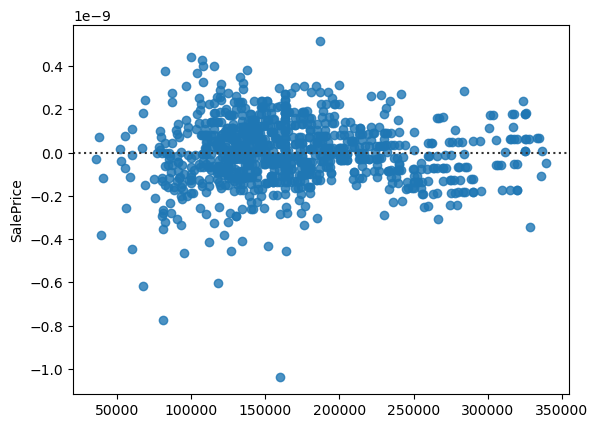

In [35]:
# Set a random seed to ensure reproducibility
random_seed = 42

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data_encoded["SalePrice"], test_size=0.2, random_state=random_seed)

# Add a constant term to the independent variables to include an intercept in the model
X_train = sm.add_constant(X_train)

# Create an OLS model
model = sm.OLS(y_train, X_train)

# Fit the model to the data
results = model.fit()

# Print the summary of the results
print(results.summary())

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a linear regression model with all features
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions on the training set using the linear regression model
y_train_pred = lin_reg.predict(X_train_scaled)

# Calculate the RMSE for the training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Plot the residuals to see if there are any patterns in the errors
sns.residplot(y_train_pred, y_train - y_train_pred)

The P-values for most of the independent variables are greater than 0.05

In [36]:
residuals = y_train - y_train_pred
for column in X_train.columns:
    corr = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f"{column}: {corr}")

MSSubClass: -0.02769027193533036
LotFrontage: -0.14517818116224007
LotArea: 0.18453999314099342
OverallQual: -0.10048966772137113
OverallCond: 0.13151008565835315
YearBuilt: -0.1844875417105353
YearRemodAdd: -0.10631538971492199
MasVnrArea: -0.09937020880874263
BsmtFinSF1: 0.015199728781420176
BsmtUnfSF: -0.021770700248563746
1stFlrSF: 0.0042576271756185075
2ndFlrSF: -0.05167093354838293
GrLivArea: -0.0586478051638749
BsmtFullBath: -0.0015960485770166693
HalfBath: -0.02099632141607108
Fireplaces: -0.056675854636990264
GarageArea: -0.06788924610319272
WoodDeckSF: 0.04465796964656954
OpenPorchSF: -0.005011506983619732
MoSold: 0.1419412138045872
YrSold: 0.012858877988313998
SalePrice: -0.12870670789568328
MSZoning_C (all): -0.08614855806059366
MSZoning_FV: -0.13253758391989143
MSZoning_RH: 0.08057803024179425
MSZoning_RL: 0.11168265767186943
MSZoning_RM: -0.05218748572047107
Street_Grvl: -0.14755524367741807
Street_Pave: 0.14755524367741807
Alley_Grvl: 0.19455036833265327
Alley_Pave: -0.0

C:\Users\nimis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\nimis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [37]:
residuals = y_train - y_train_pred
correlations = {}
for column in X_train.columns:
    corr = np.corrcoef(X_train[column], residuals)[0, 1]
    correlations[column] = corr

# Find columns with nan correlation
nan_columns = [column for column, corr in correlations.items() if np.isnan(corr)]

# Drop these columns from X_train and X_test
X_train = X_train.drop(nan_columns, axis=1)
X_test = X_test.drop(nan_columns, axis=1)

# Remove nan columns from correlations dictionary
for column in nan_columns:
    del correlations[column]

# Sort remaining columns by absolute correlation with residuals
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
for column, corr in sorted_correlations:
    print(f"{column}: {corr}")

RoofMatl_ClyTile: -0.22356799361610288
BldgType_1Fam: 0.20309845138623875
Alley_Grvl: 0.19455036833265327
SaleType_WD: 0.1916282321121708
BsmtQual_TA: 0.18661901285609128
LotArea: 0.18453999314099342
YearBuilt: -0.1844875417105353
PoolQC_Gd: -0.17864677878064925
BldgType_TwnhsE: -0.17796161227261734
ExterCond_Fa: -0.17685534142757395
Neighborhood_MeadowV: -0.16373605099915314
Exterior1st_WdShing: 0.1637239180204447
MasVnrType_Stone: -0.15869693728930379
Foundation_PConc: -0.15667341530452658
Condition2_Artery: -0.15643853942119834
Exterior2nd_Wd Shng: 0.15481775152929708
SaleType_New: -0.15478084826212318
BsmtFinType2_LwQ: 0.15444355422013487
Foundation_CBlock: 0.15356195653189939
SaleCondition_Partial: -0.15067152075745718
Street_Grvl: -0.14755524367741807
Street_Pave: 0.14755524367741807
ExterQual_TA: 0.14751083529345008
Neighborhood_Somerst: -0.14548526177596874
LotFrontage: -0.14517818116224007
ExterQual_Fa: -0.1445962955247184
MoSold: 0.1419412138045872
GarageFinish_Unf: 0.1387453

<AxesSubplot:ylabel='SalePrice'>

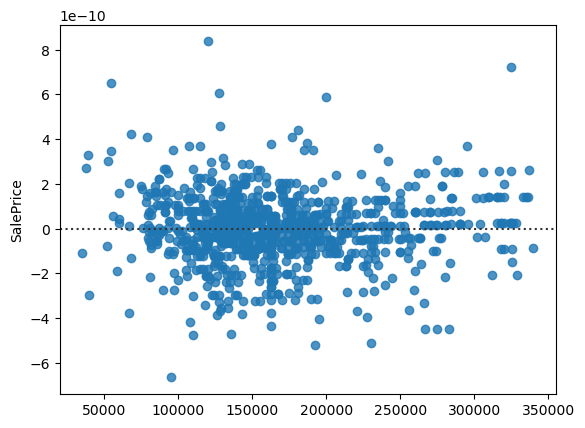

In [38]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a linear regression model with all features
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions on the training set using the linear regression model
y_train_pred = lin_reg.predict(X_train_scaled)

# Calculate the RMSE for the training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Plot the residuals to see if there are any patterns in the errors
sns.residplot(y_train_pred, y_train - y_train_pred)

In [39]:
from scipy.stats import zscore

# Calculate studentized residuals
studentized_residuals = zscore(residuals)

# Find potential outliers
outliers = np.abs(studentized_residuals) > 3

<AxesSubplot:ylabel='SalePrice'>

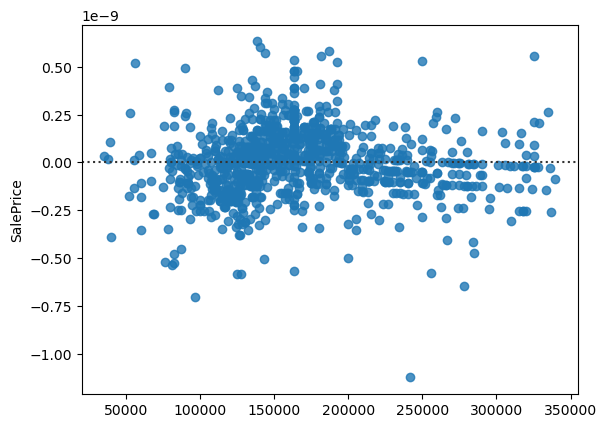

In [40]:
# Remove potential outliers from data
X_train_no_outliers = X_train[~outliers]
y_train_no_outliers = y_train[~outliers]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no_outliers)
X_test_scaled = scaler.transform(X_test)

# Build a linear regression model with all features
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_no_outliers)

# Make predictions on the training set using the linear regression model
y_train_pred = lin_reg.predict(X_train_scaled)

# Calculate the RMSE for the training set
rmse_train = np.sqrt(mean_squared_error(y_train_no_outliers, y_train_pred))

# Plot the residuals to see if there are any patterns in the errors
sns.residplot(y_train_pred, y_train_no_outliers - y_train_pred)

In [41]:
housedata.shape

(1460, 65)

In [42]:
# Set a random seed to ensure reproducibility
random_seed = 42

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data_encoded["SalePrice"], test_size=0.2, random_state=random_seed)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a linear regression model with all features
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions on the training set using the linear regression model
y_train_pred = lin_reg.predict(X_train_scaled)

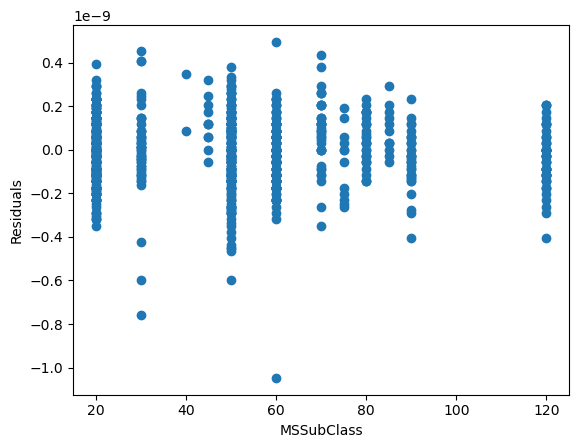

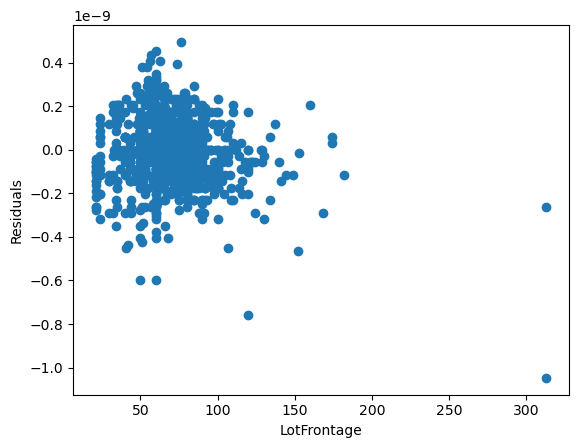

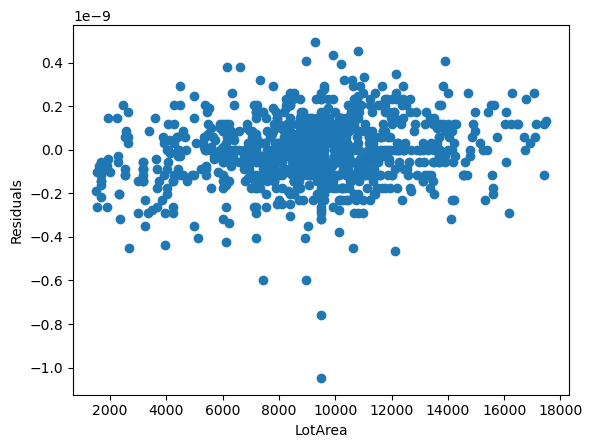

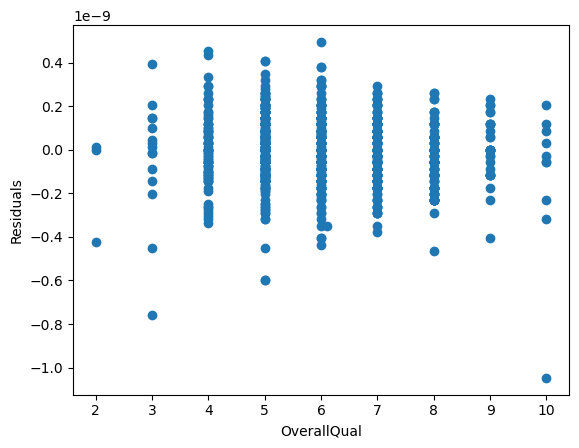

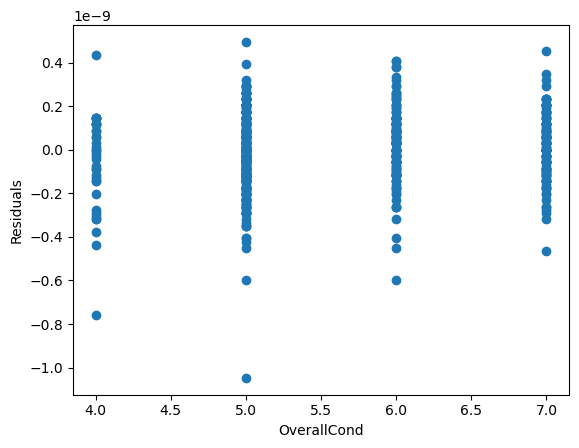

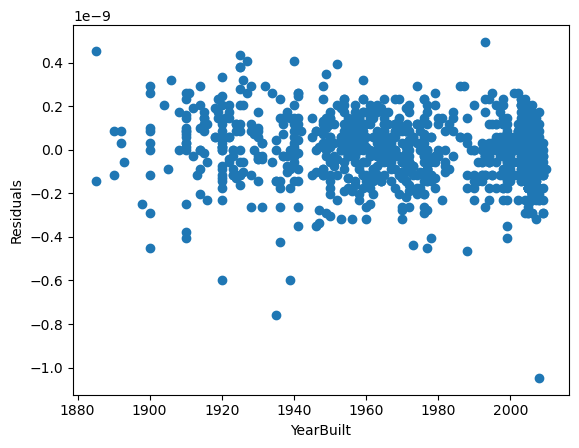

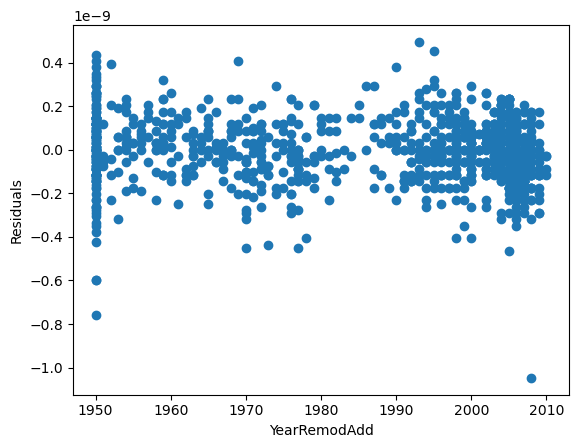

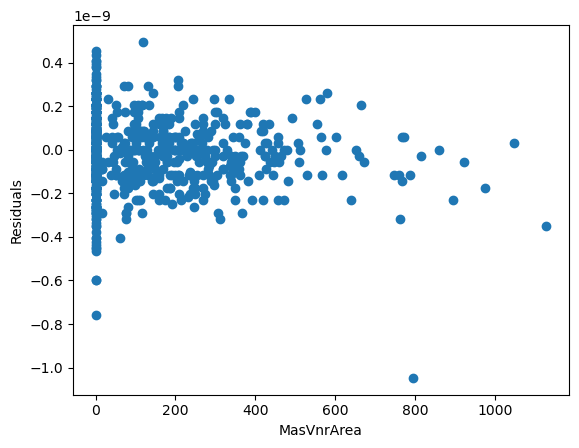

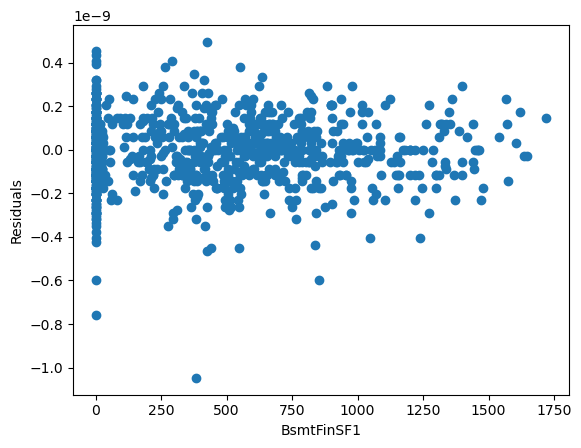

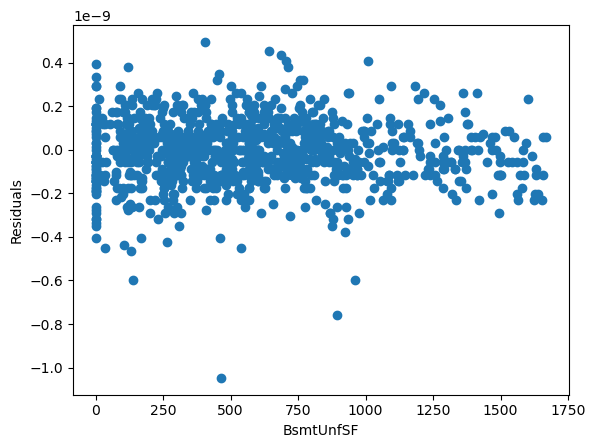

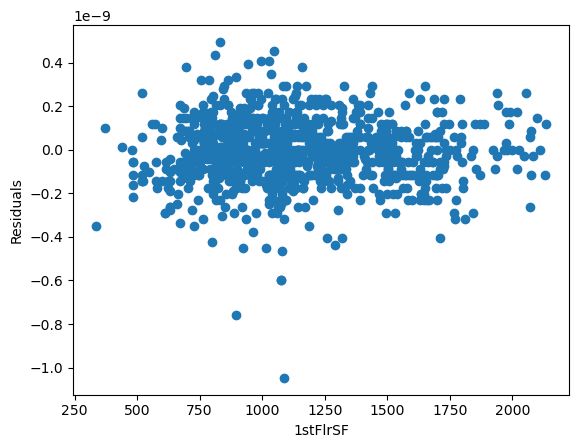

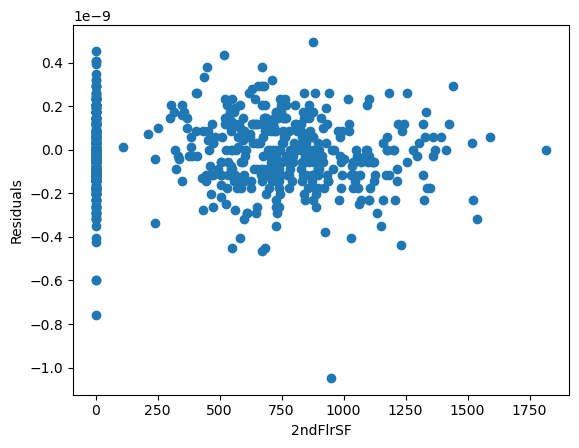

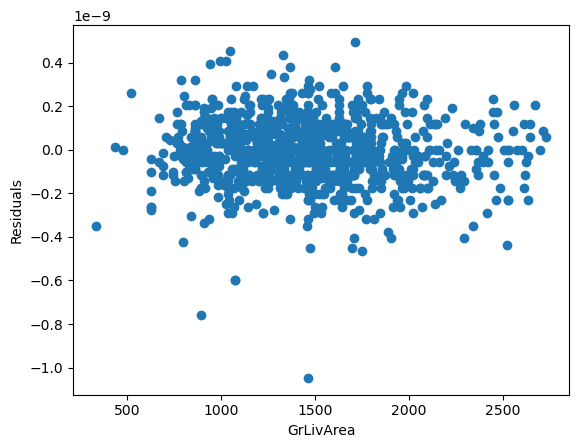

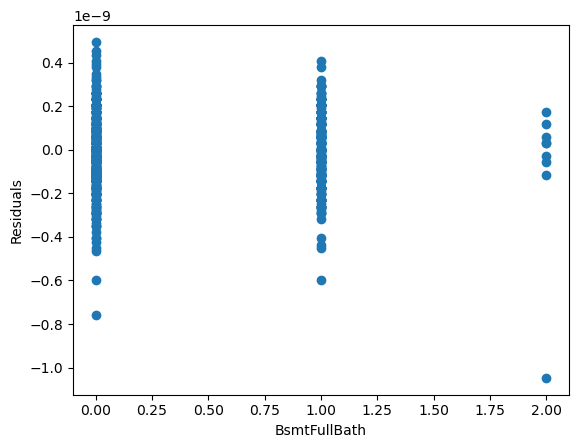

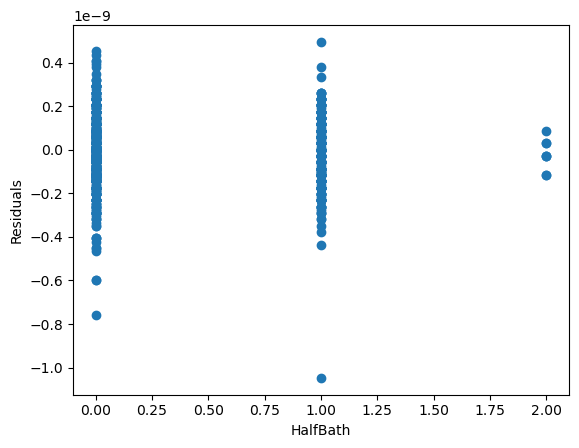

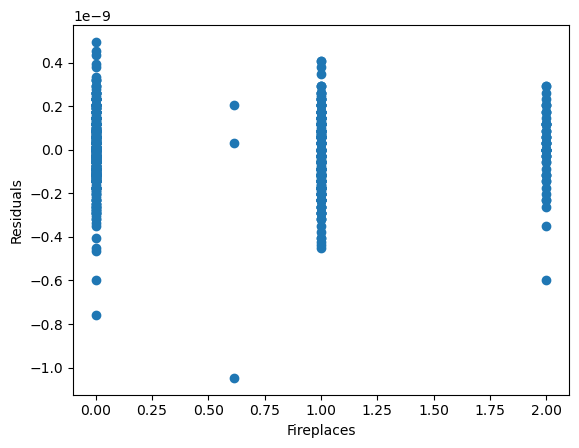

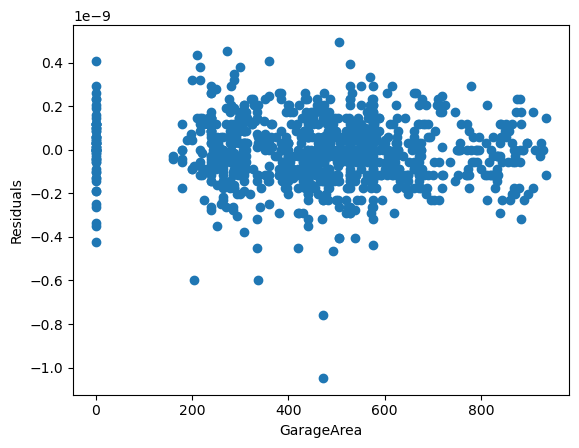

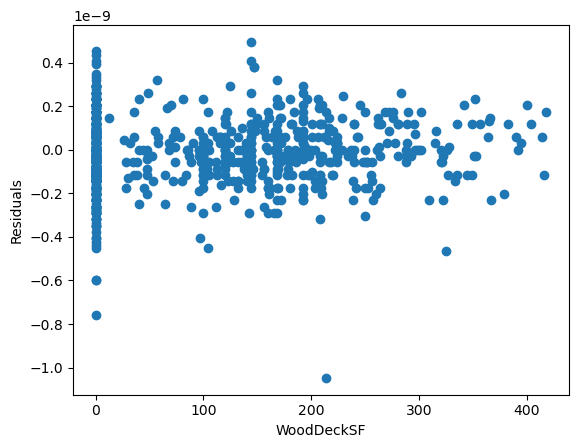

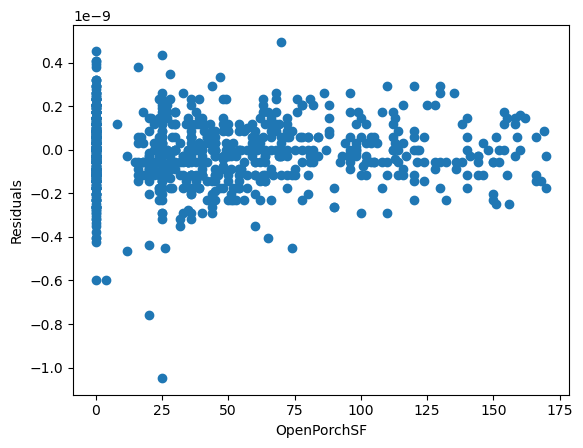

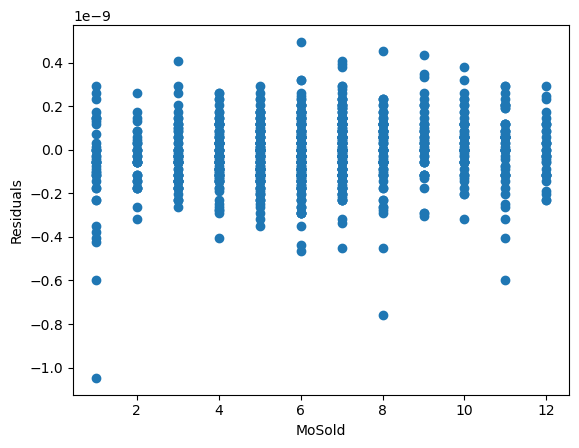

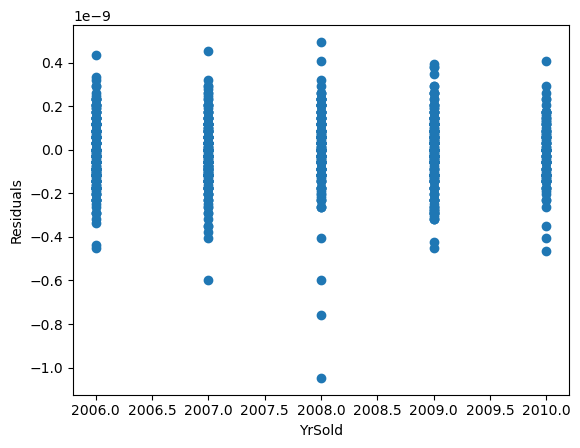

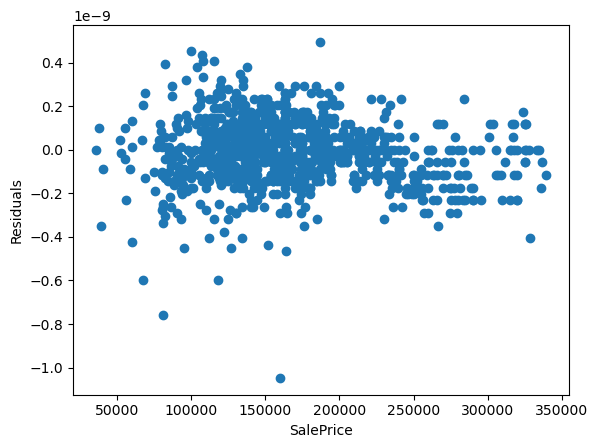

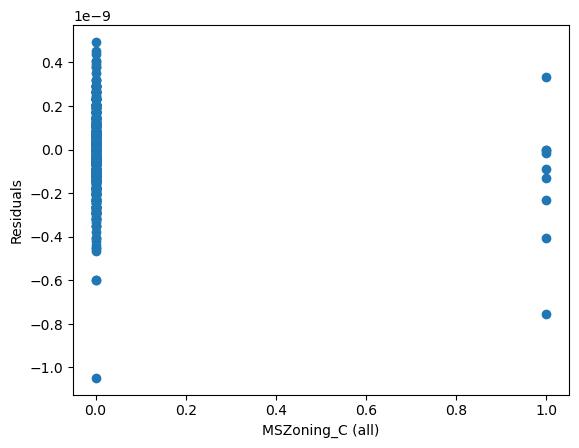

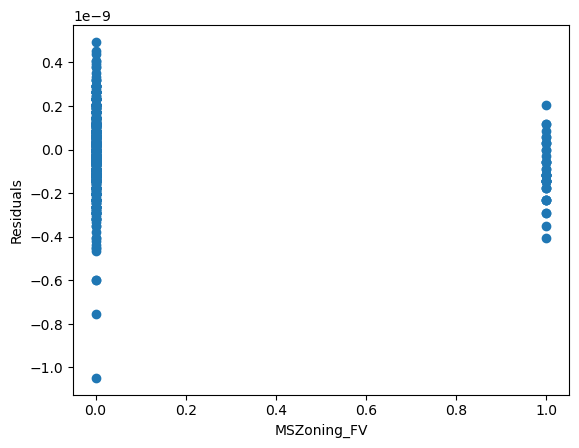

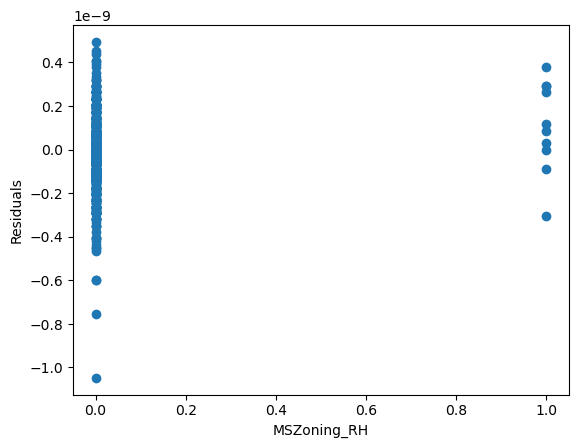

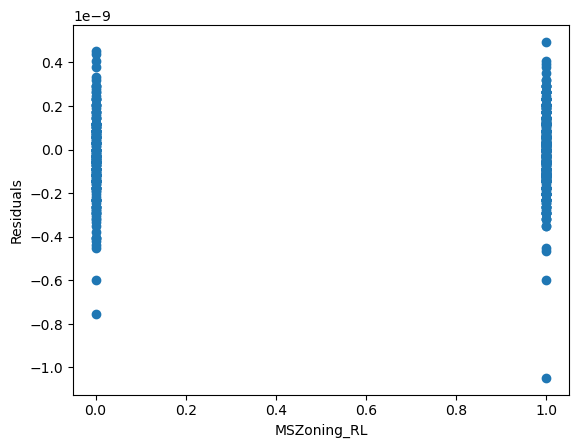

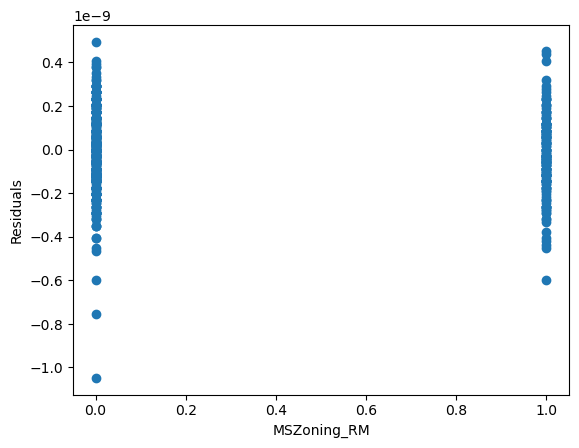

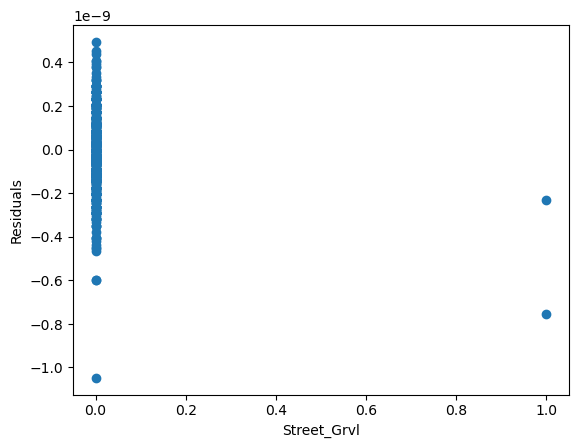

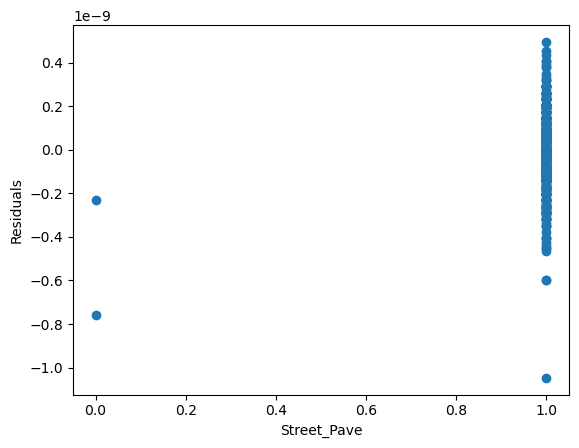

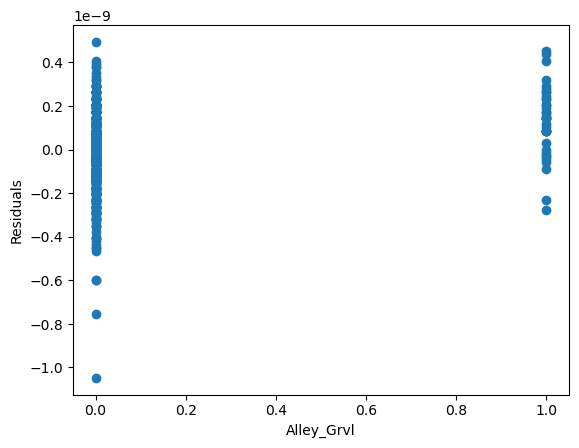

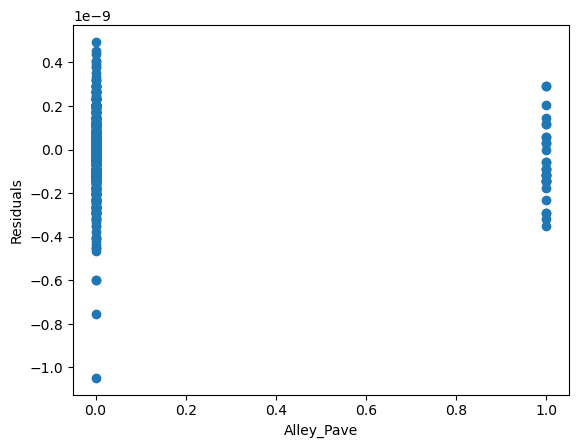

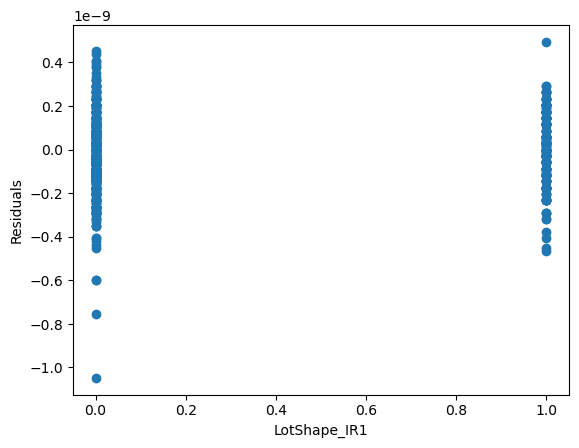

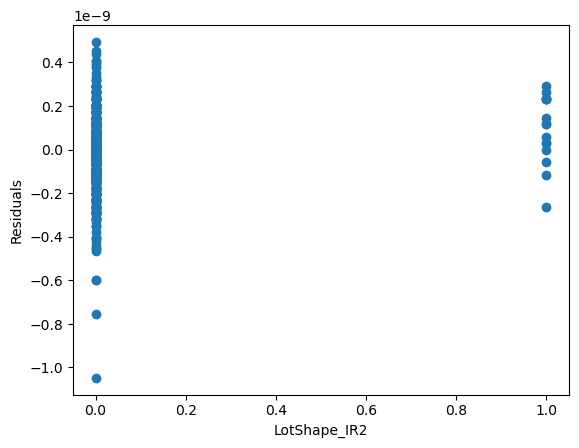

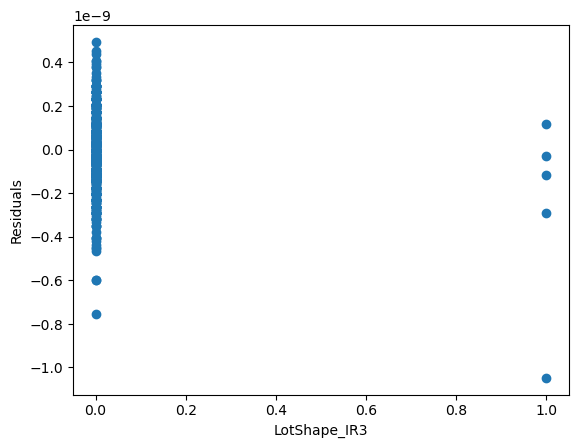

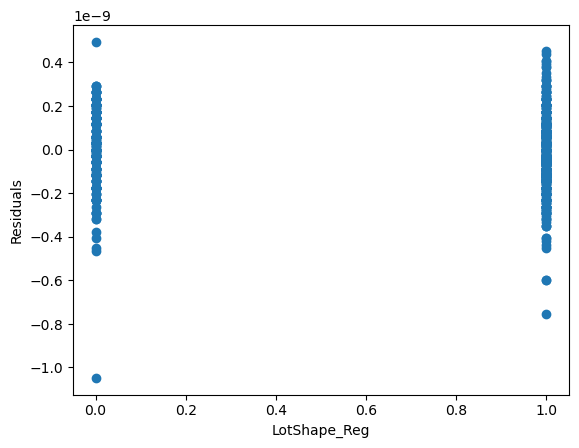

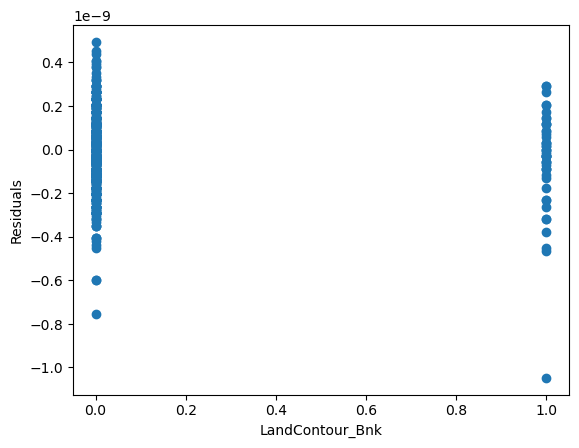

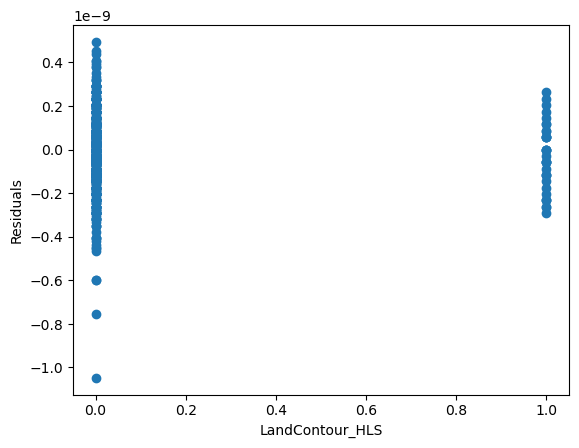

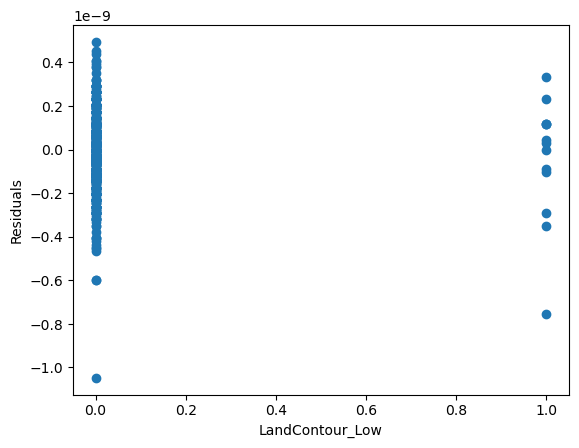

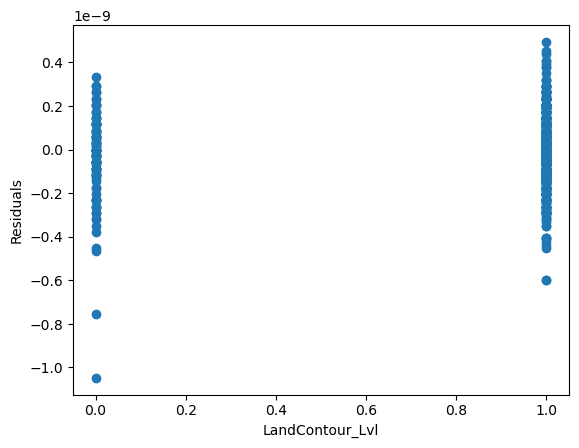

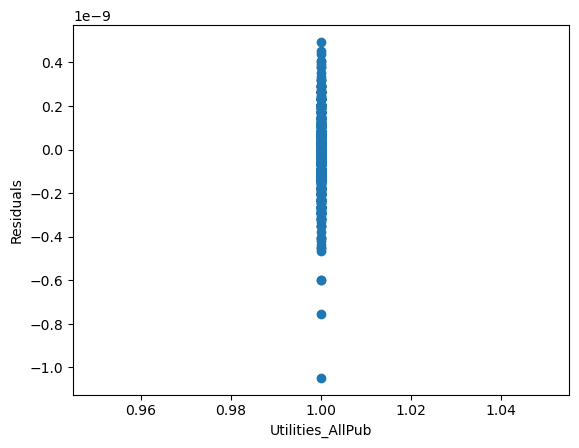

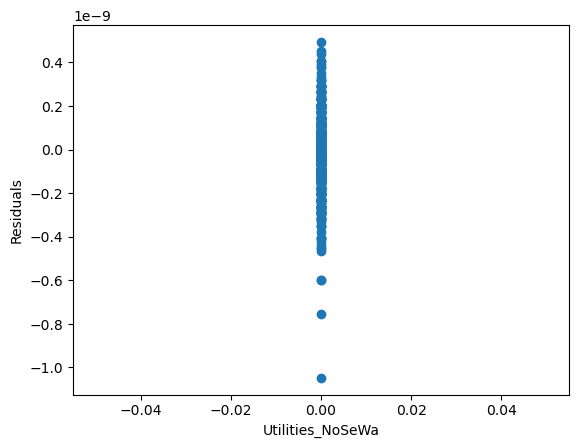

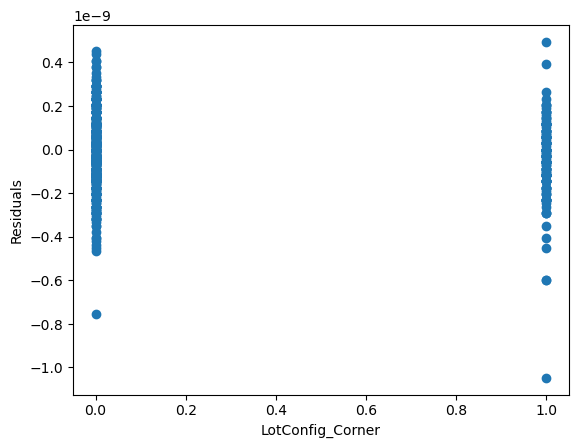

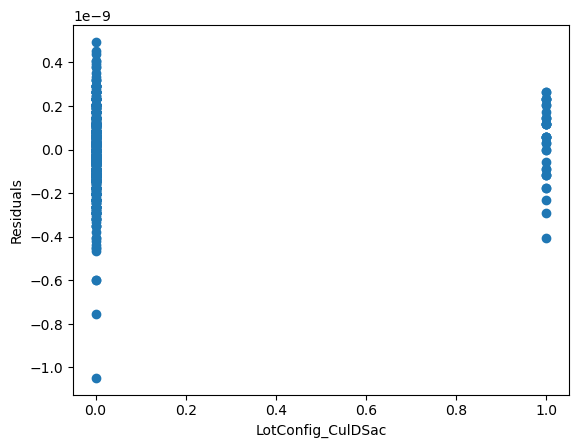

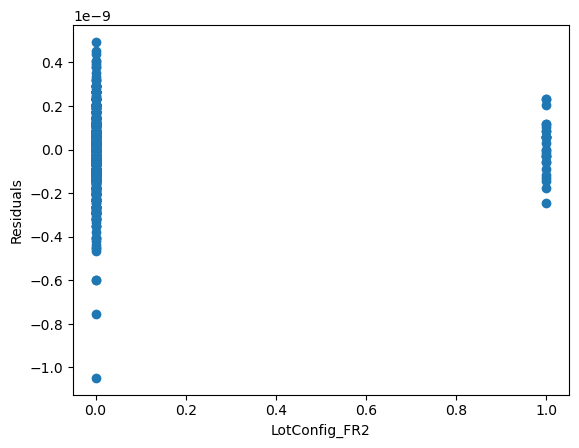

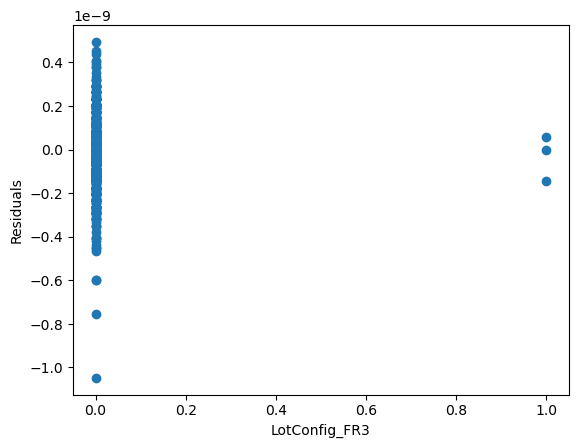

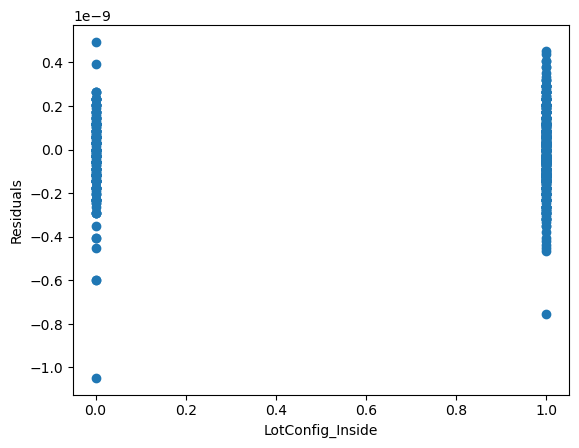

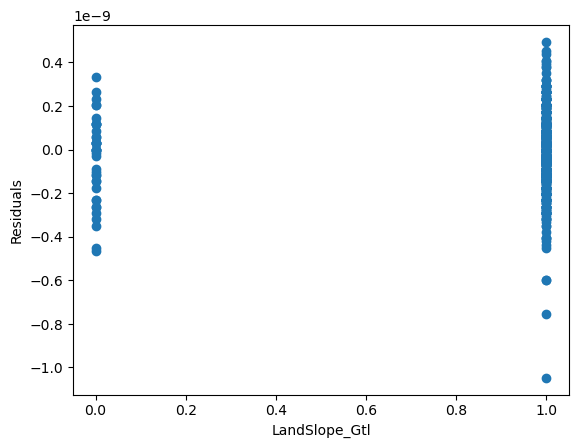

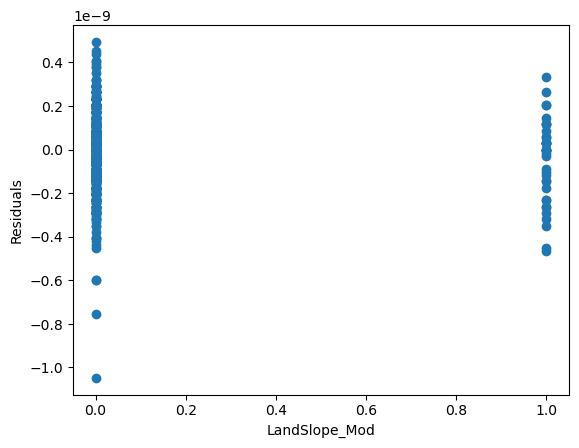

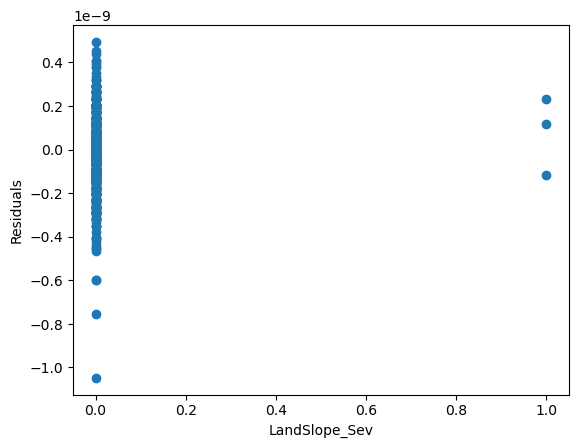

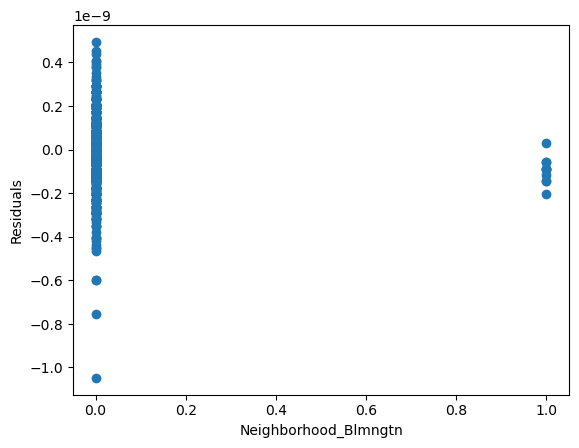

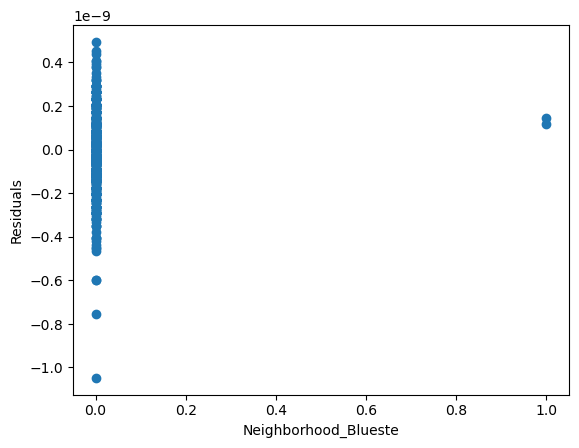

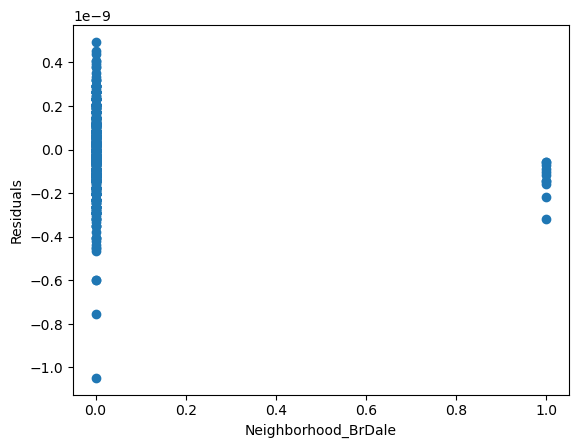

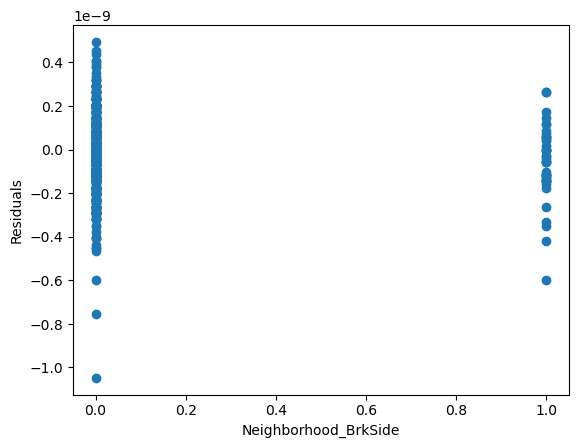

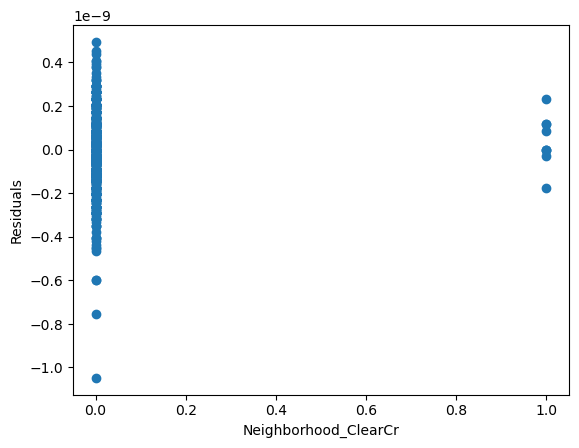

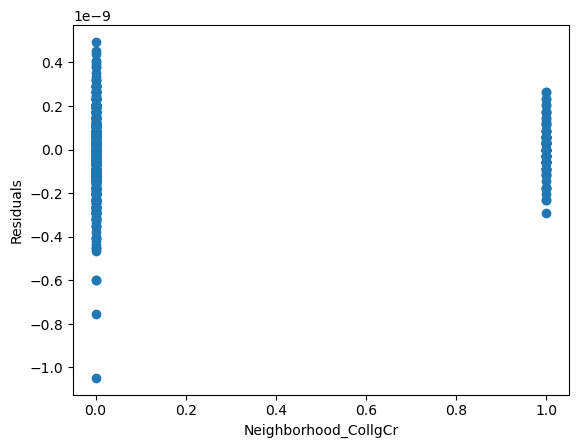

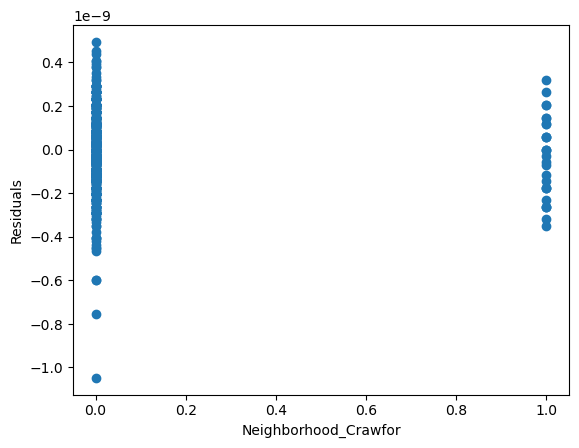

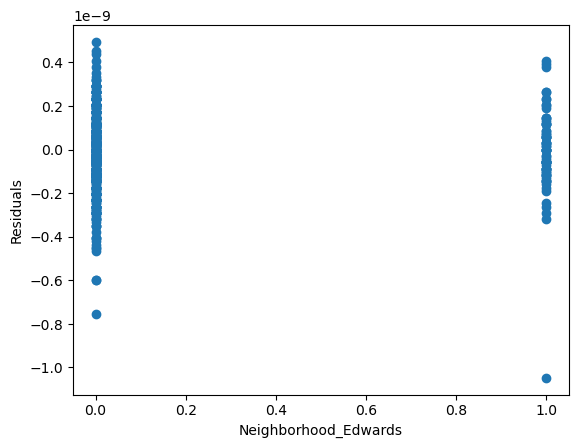

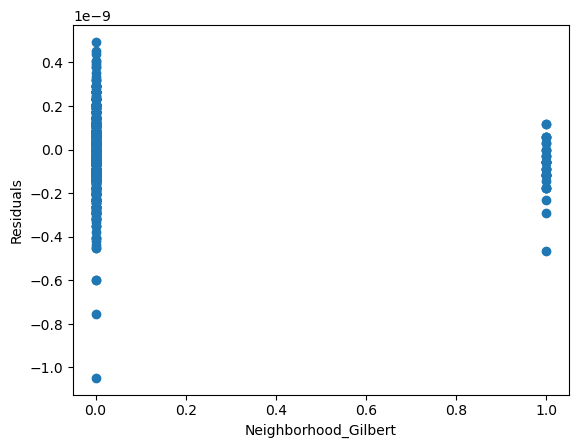

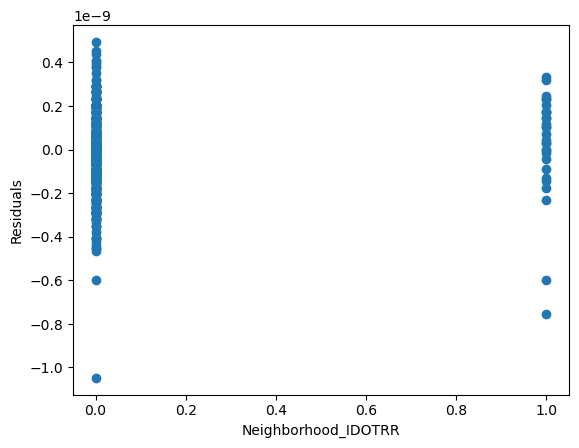

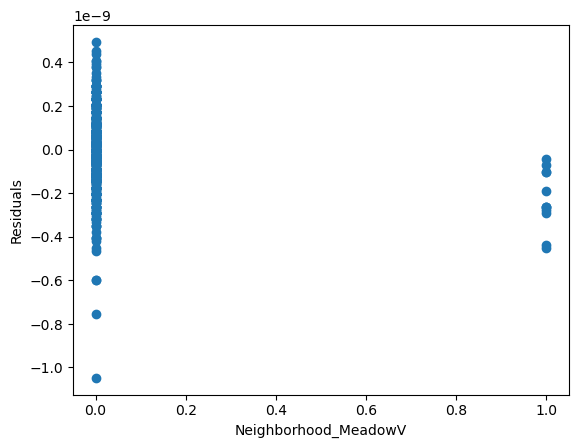

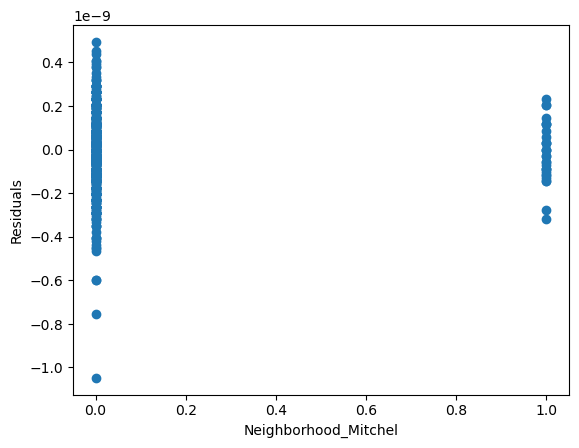

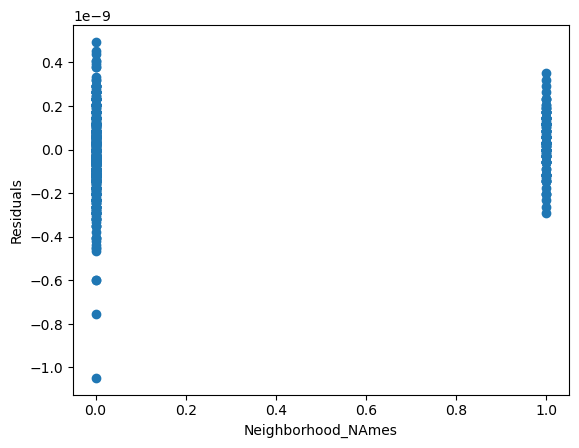

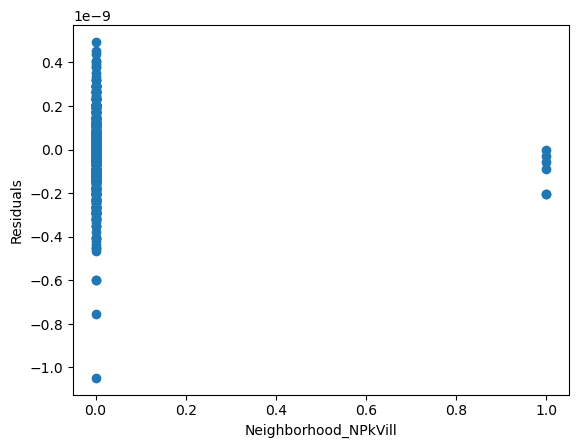

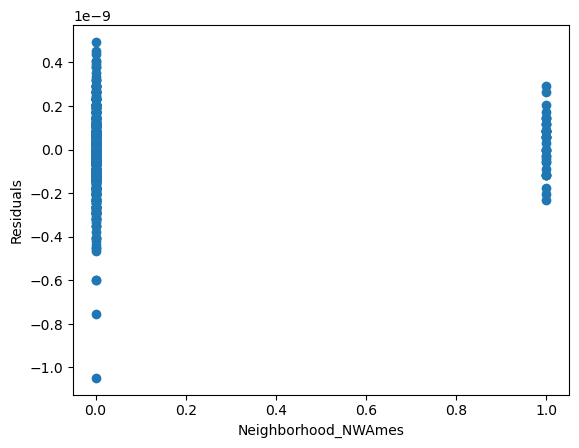

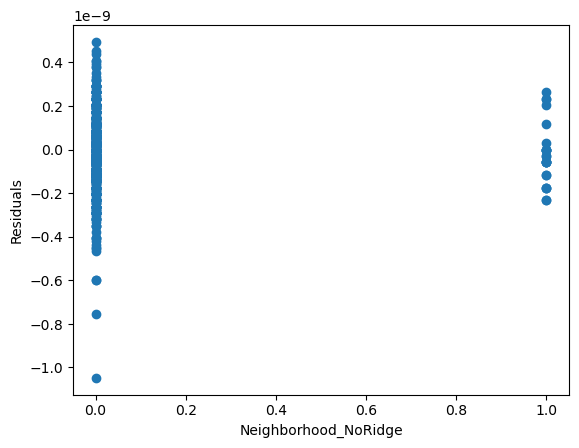

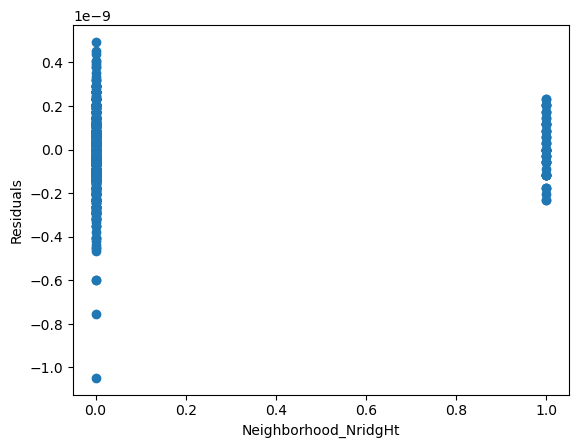

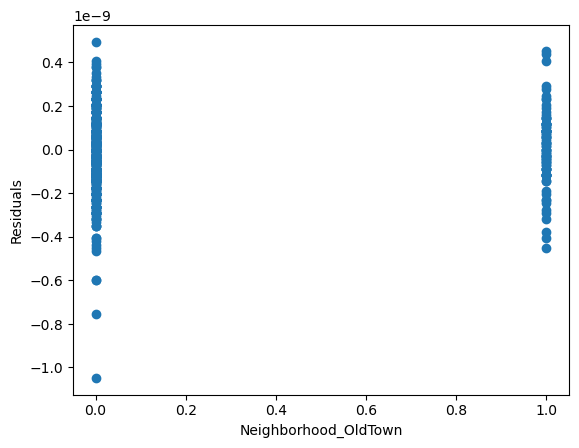

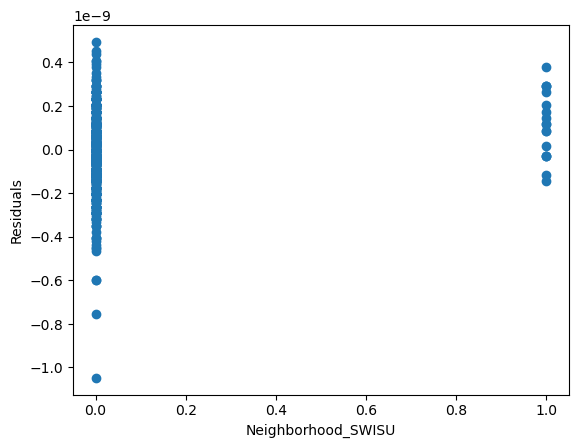

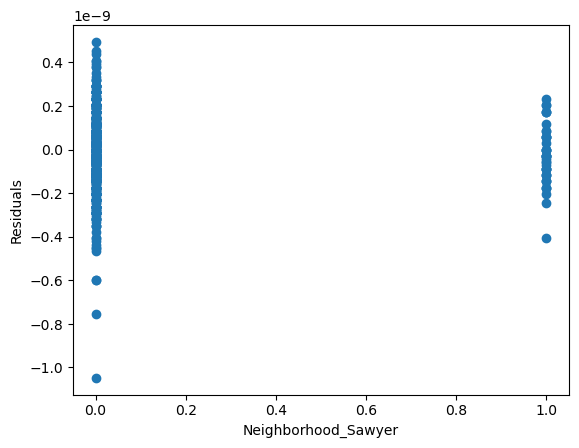

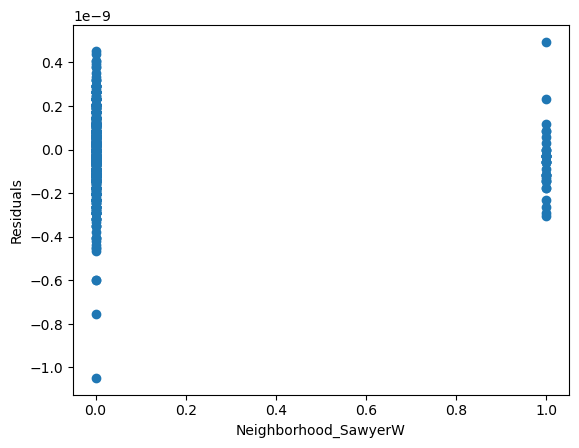

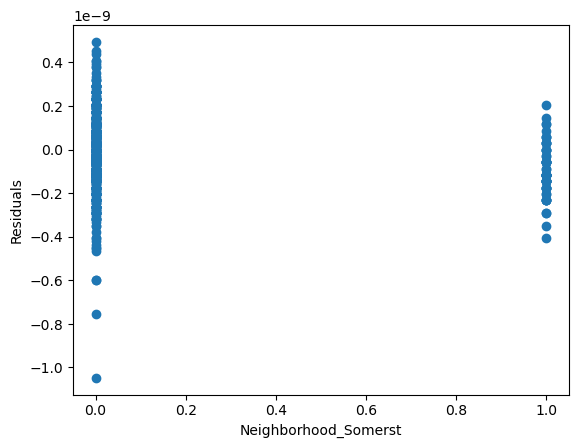

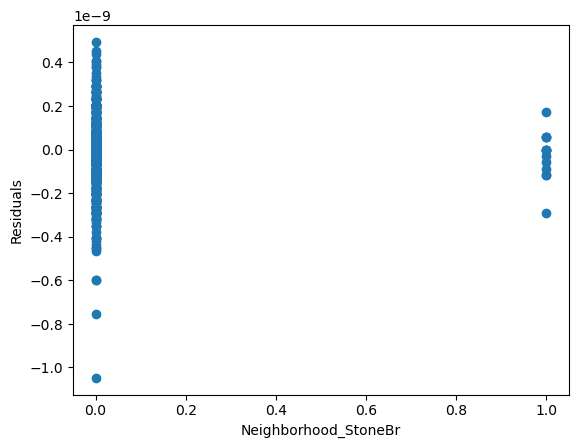

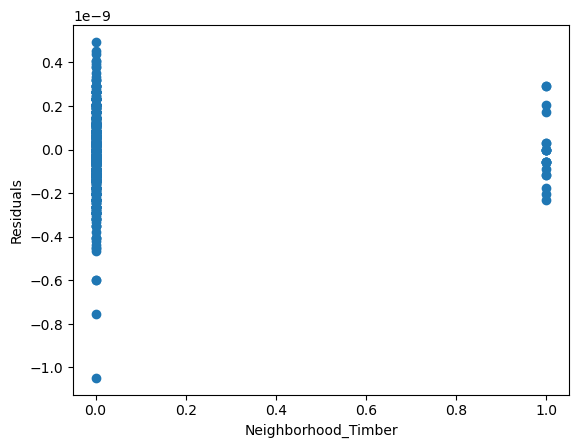

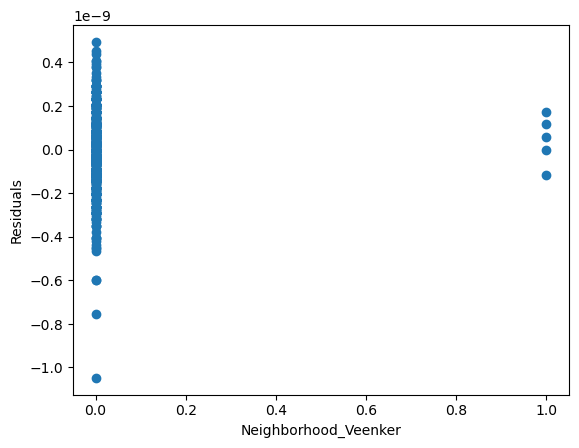

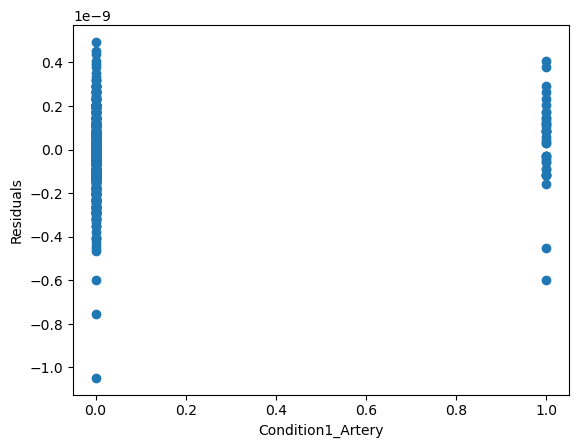

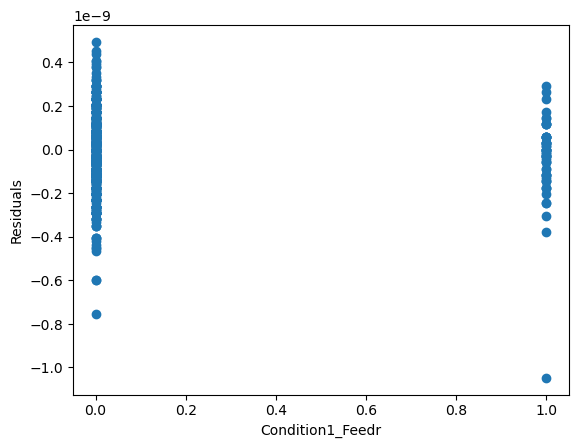

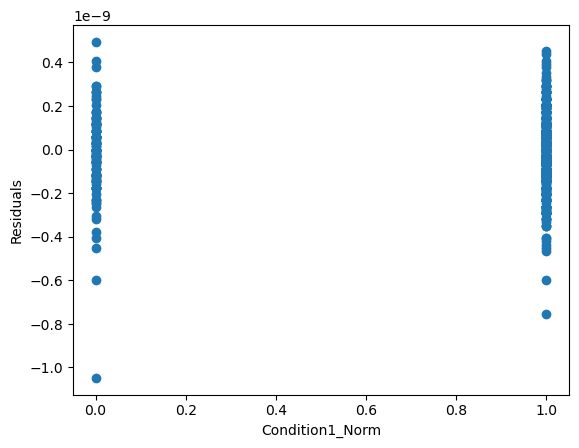

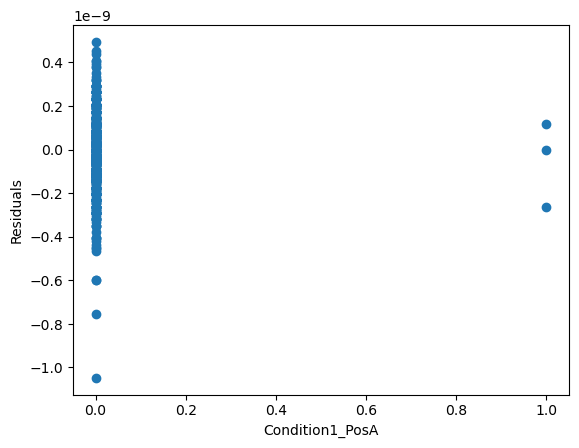

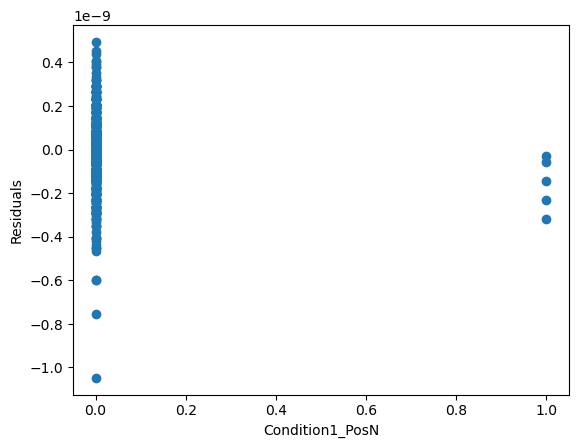

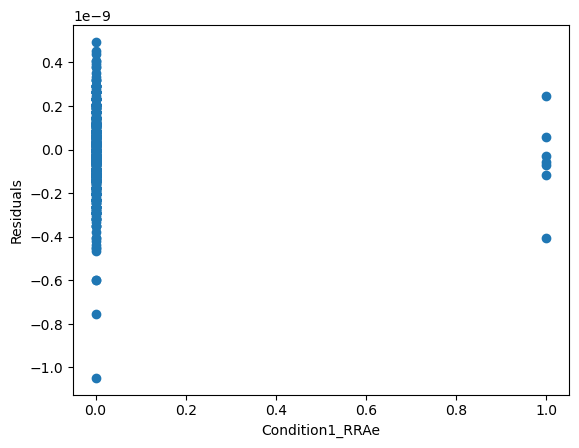

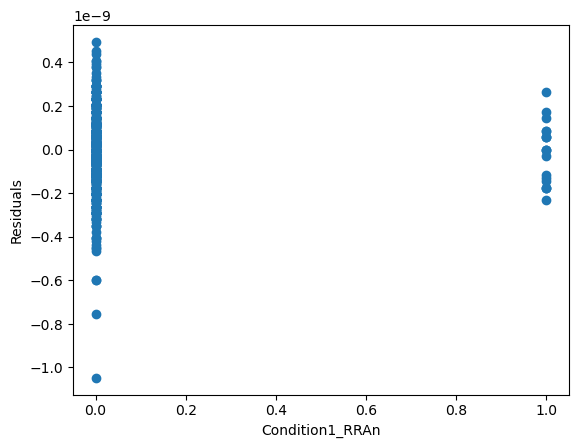

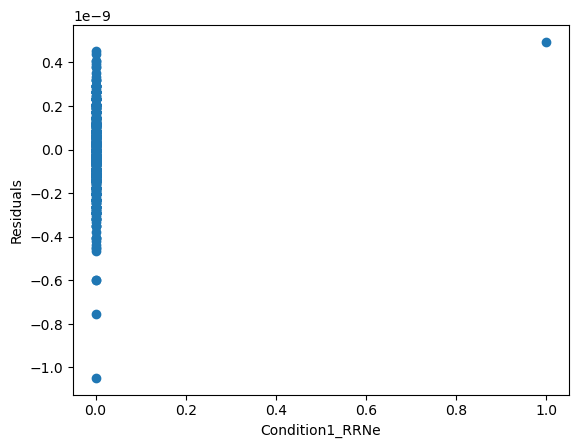

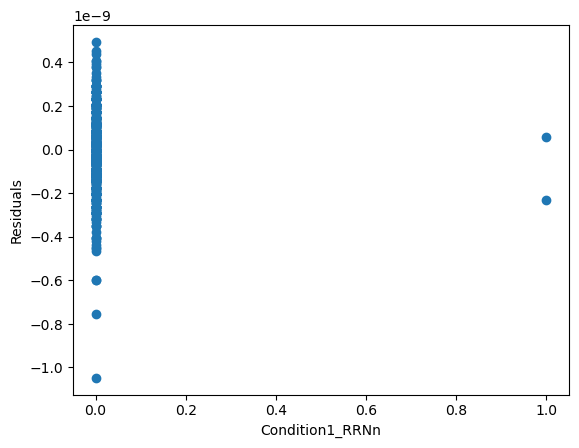

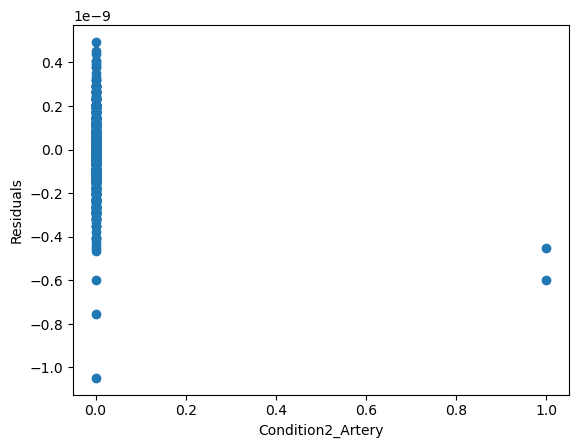

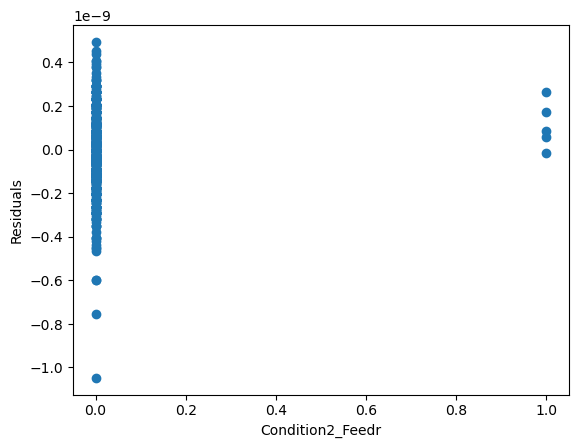

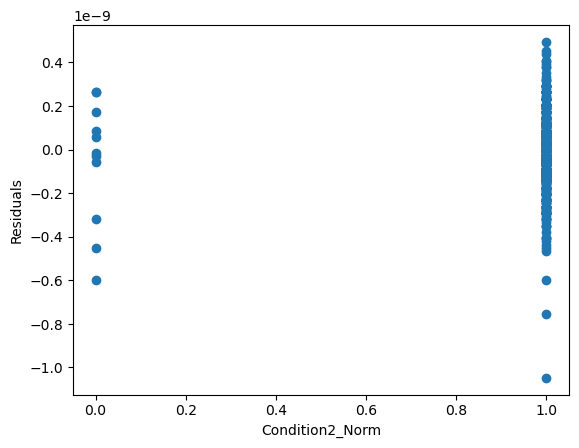

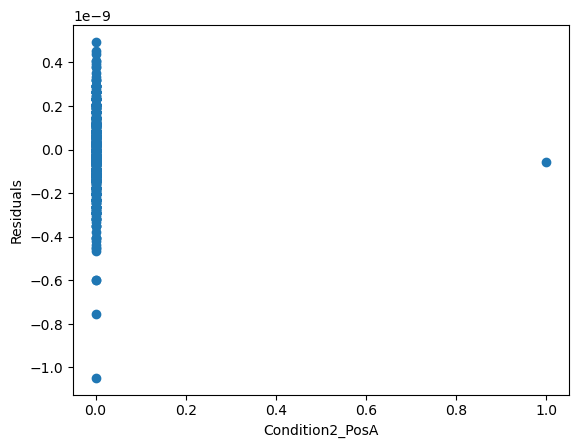

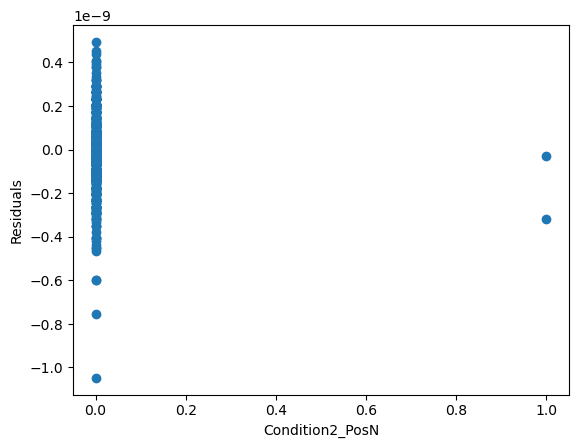

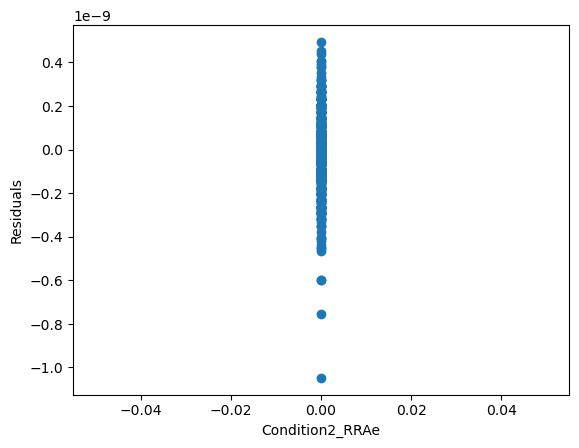

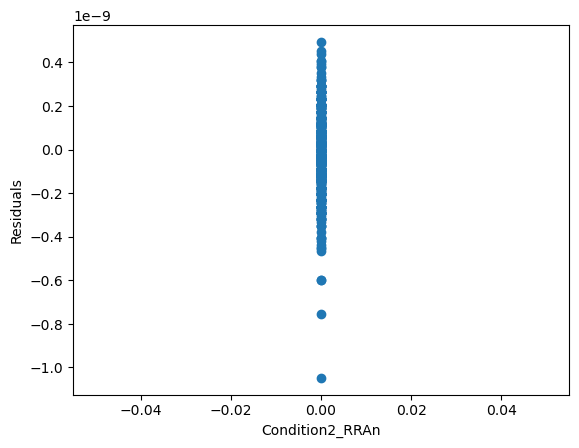

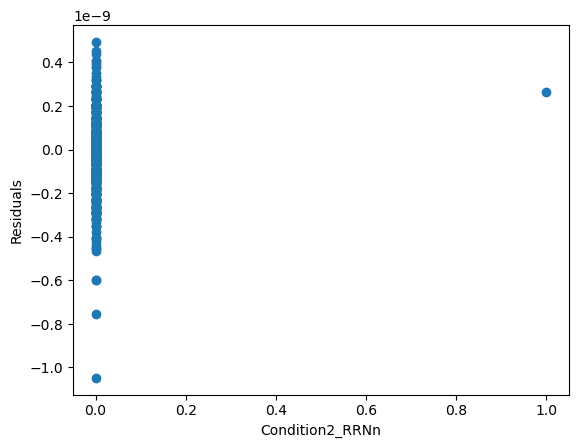

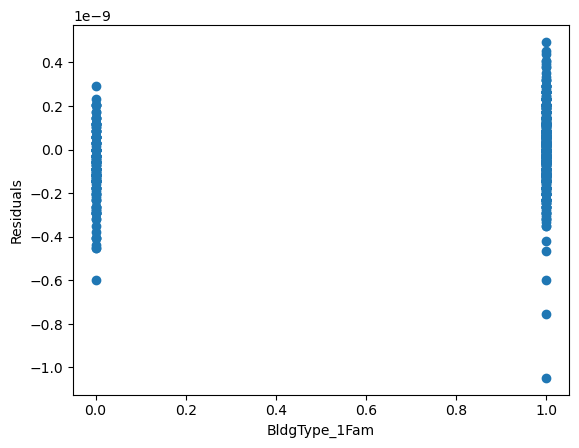

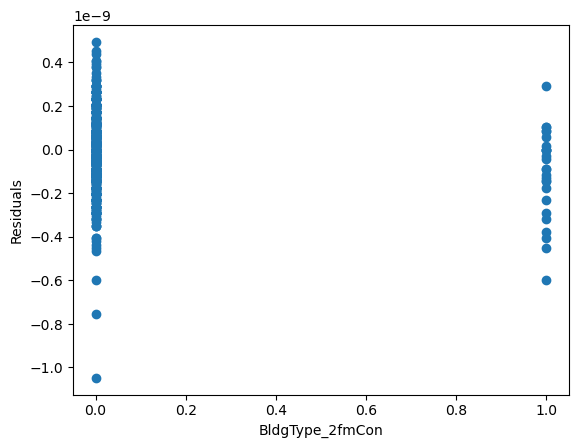

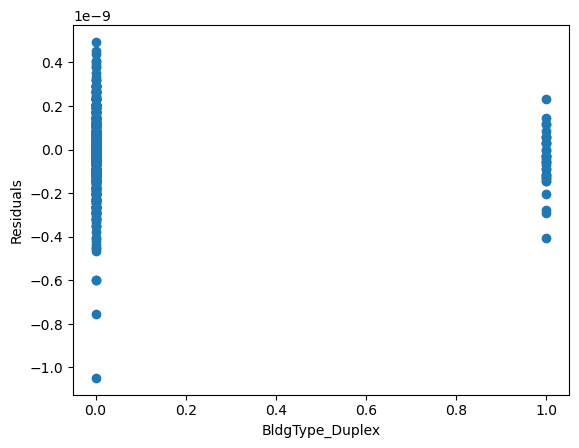

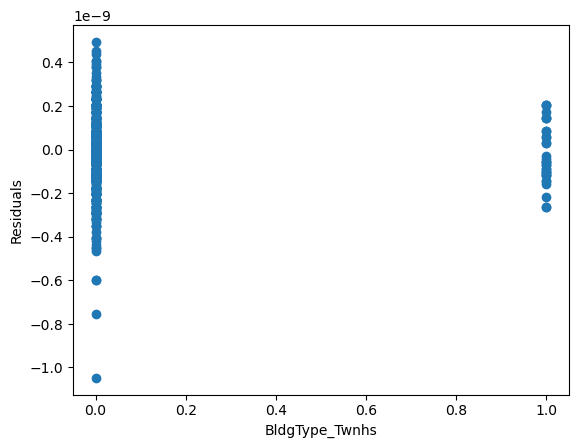

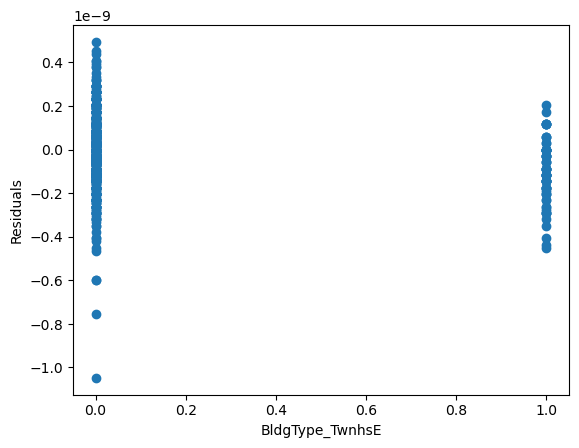

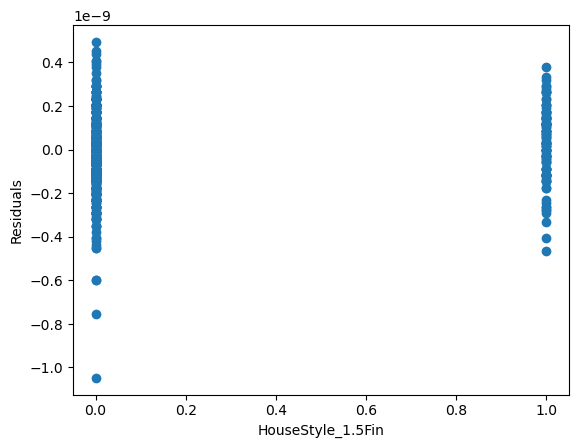

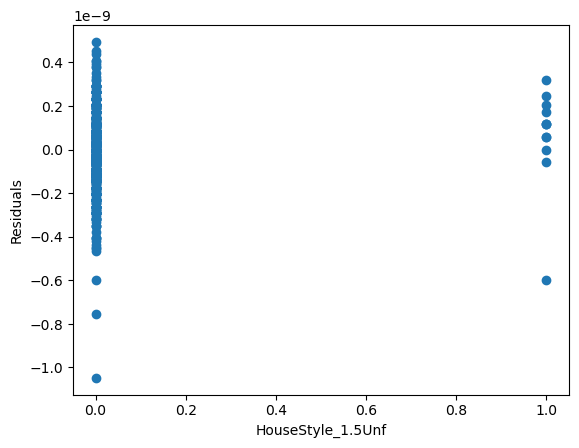

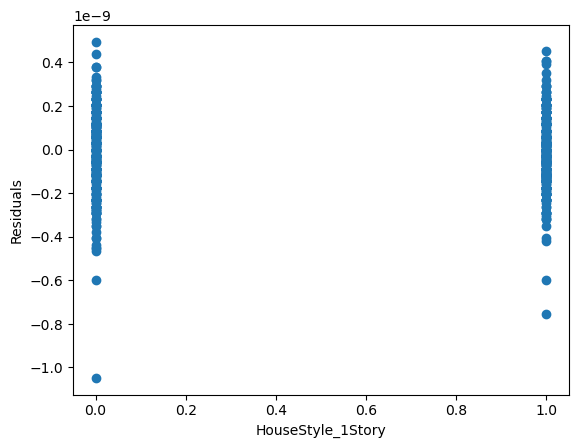

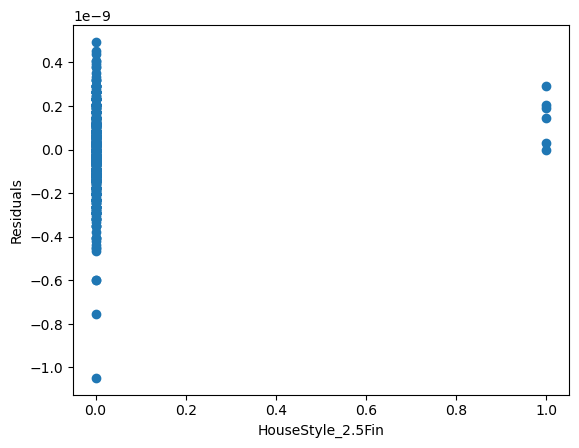

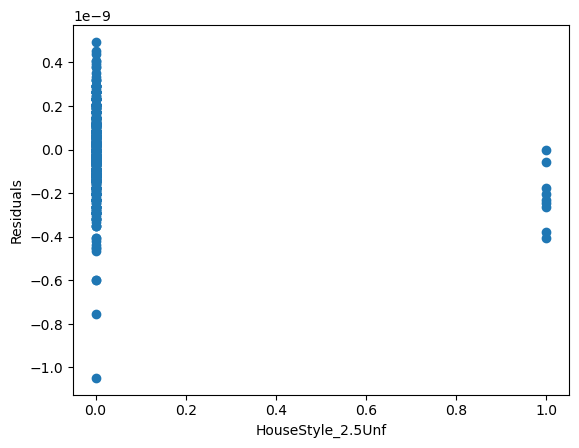

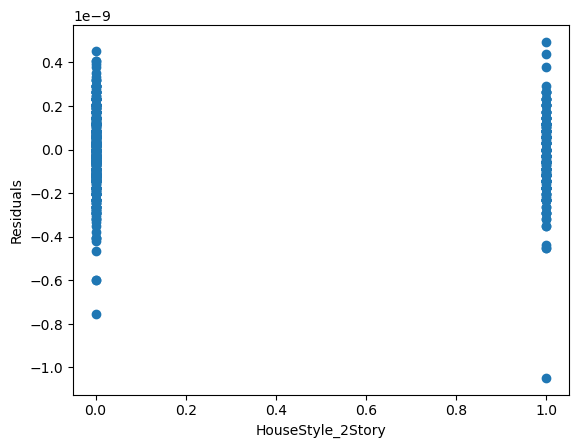

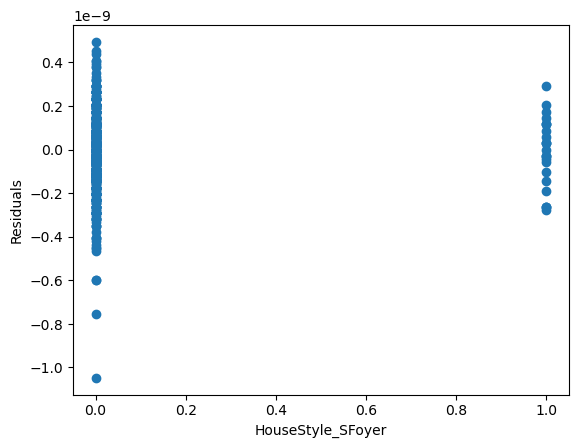

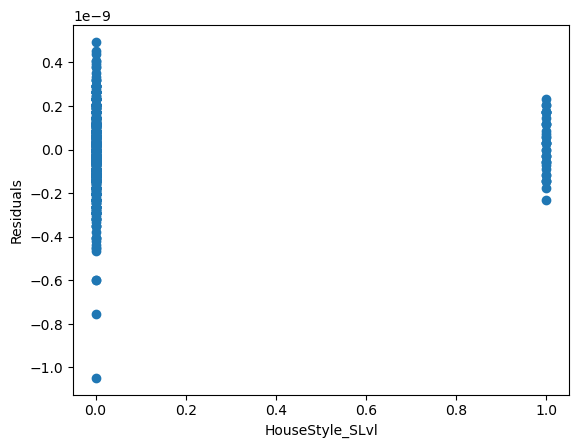

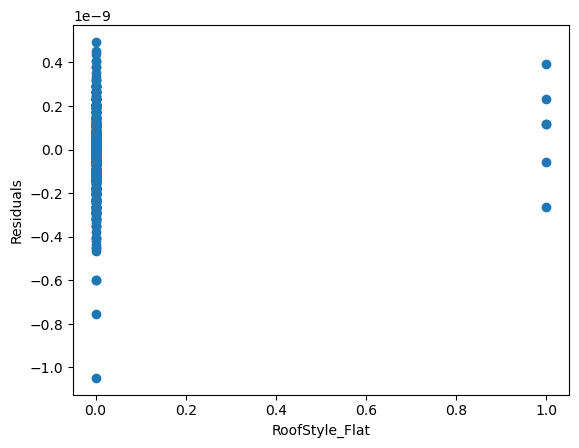

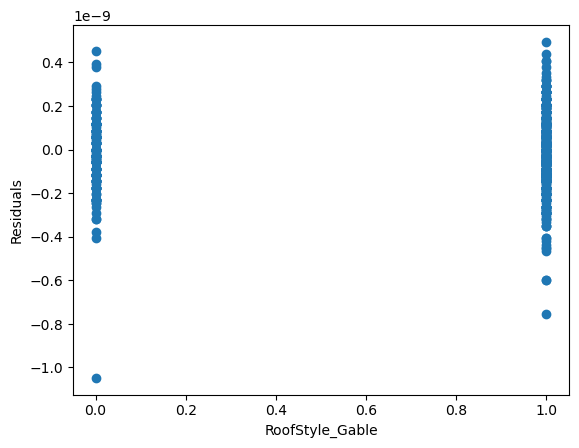

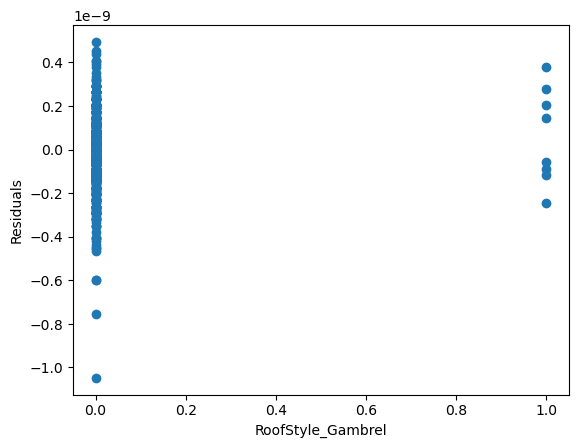

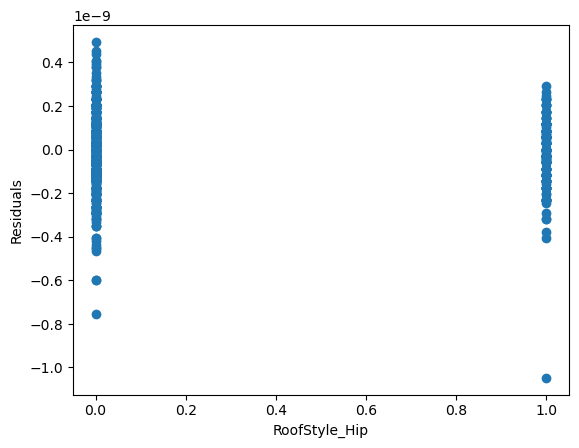

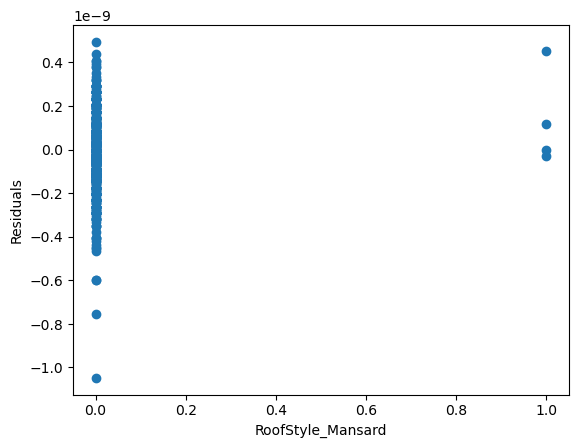

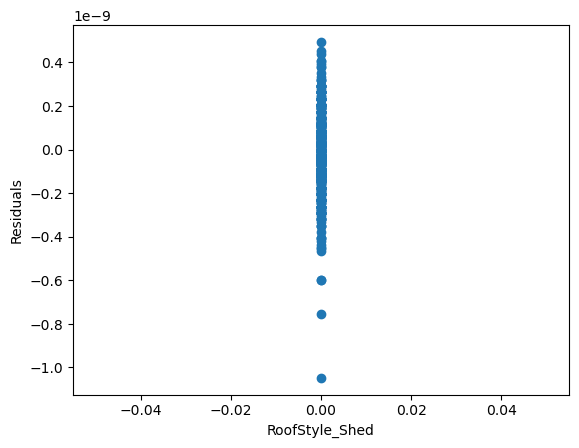

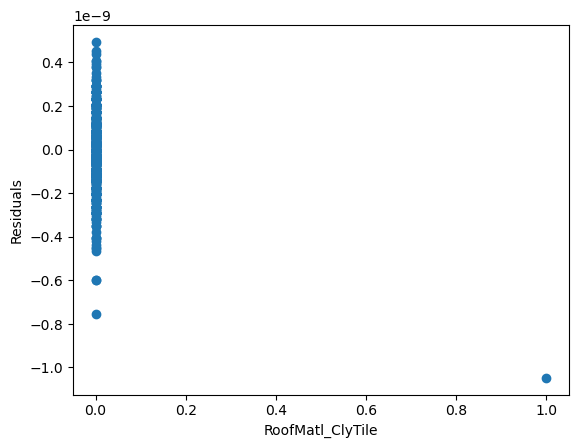

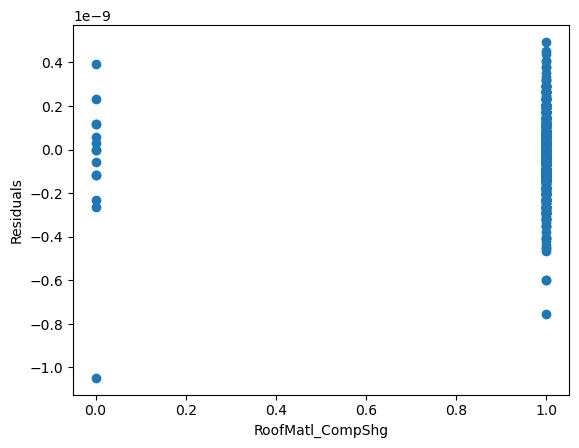

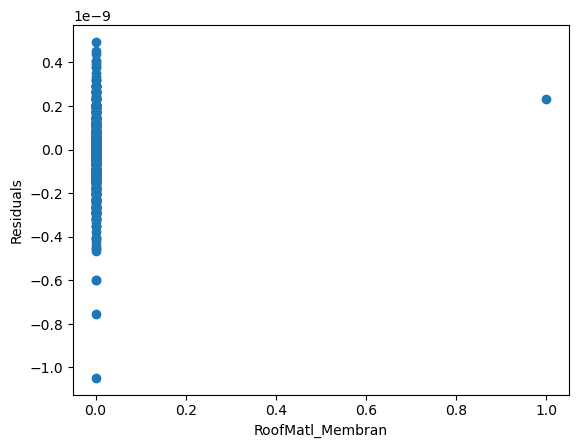

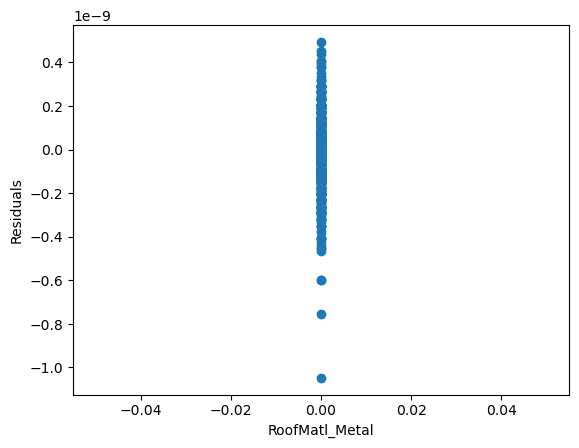

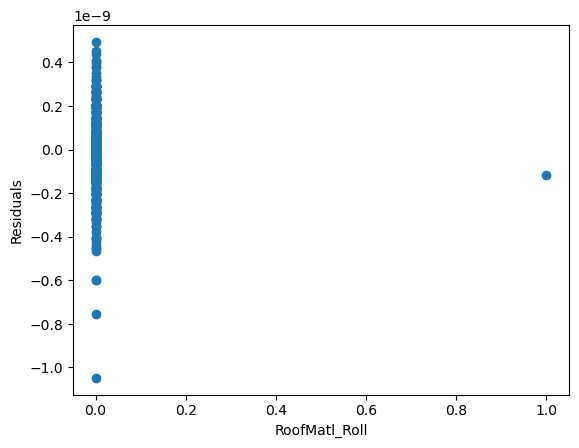

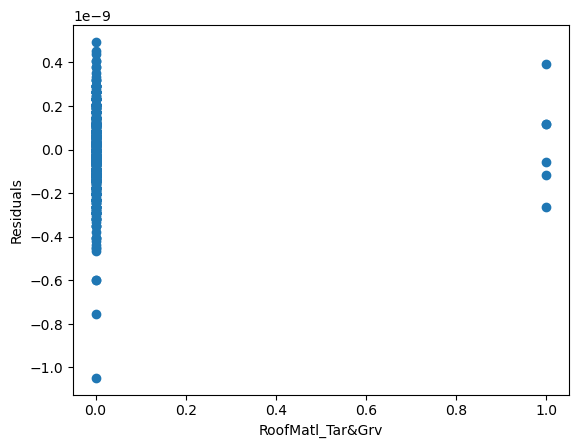

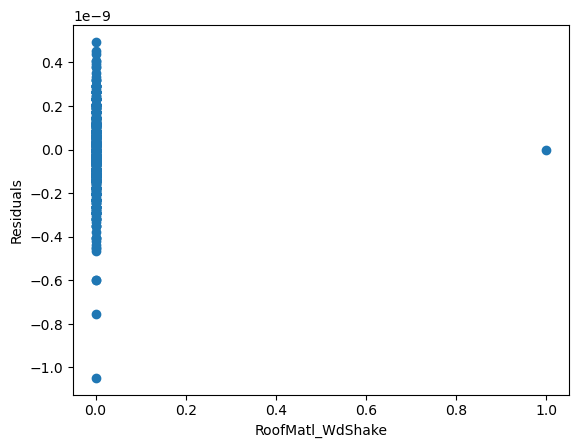

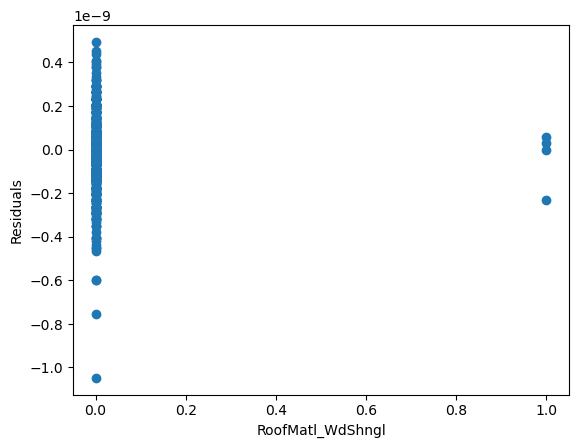

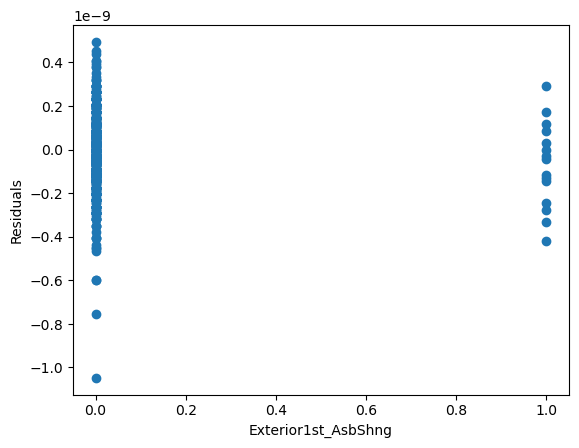

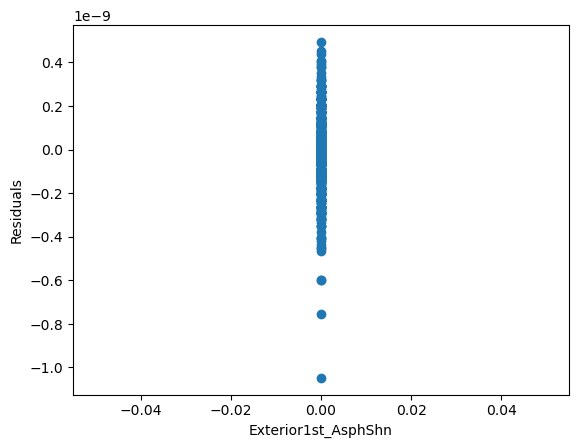

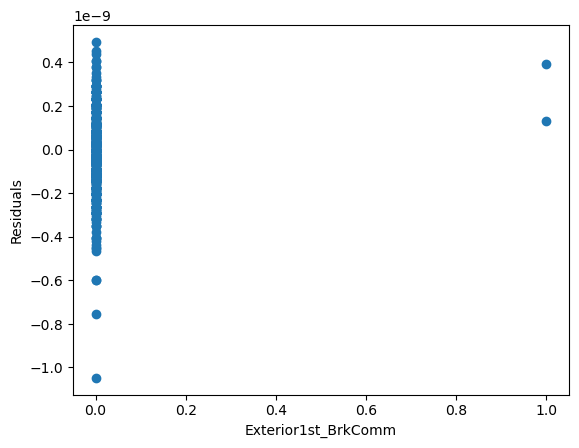

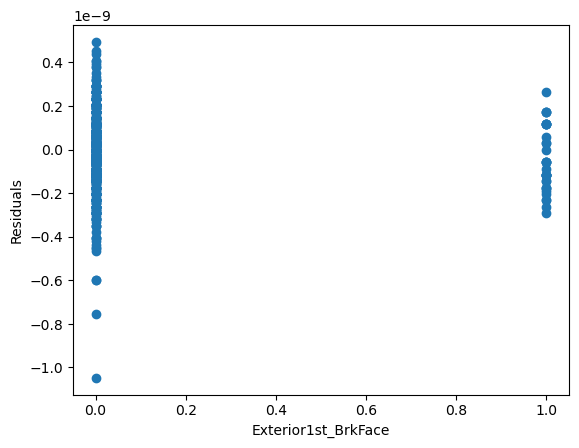

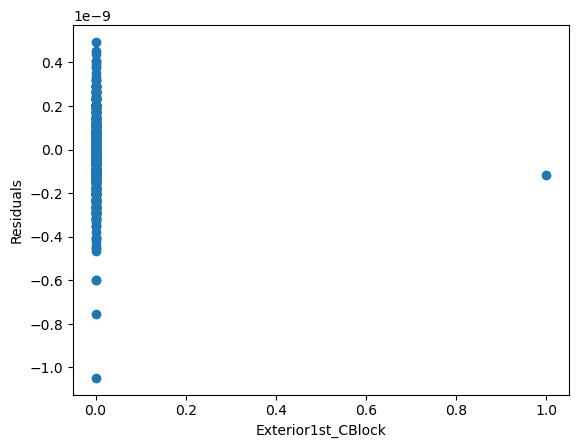

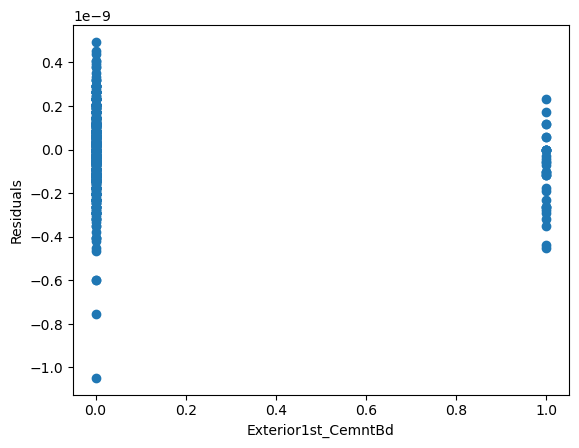

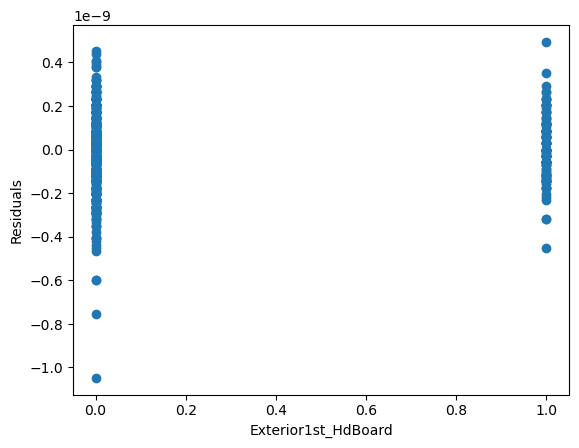

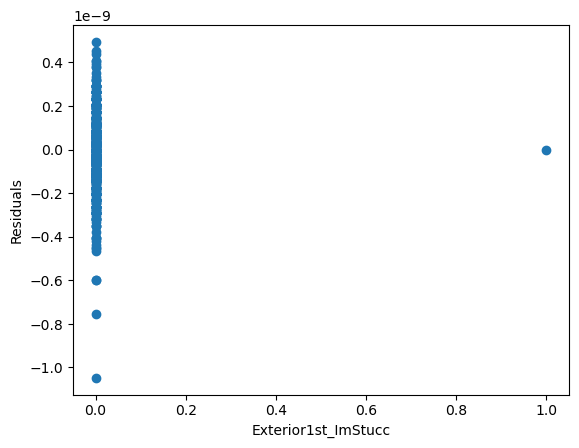

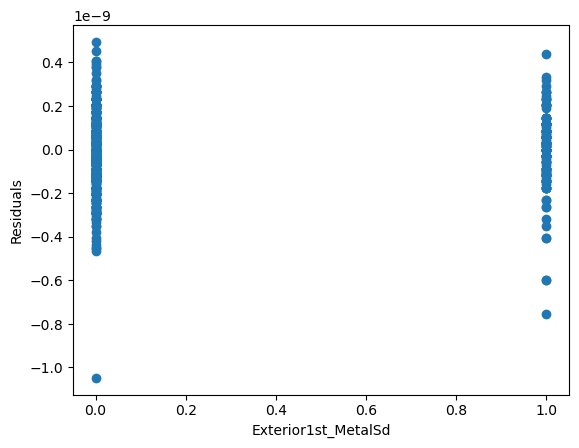

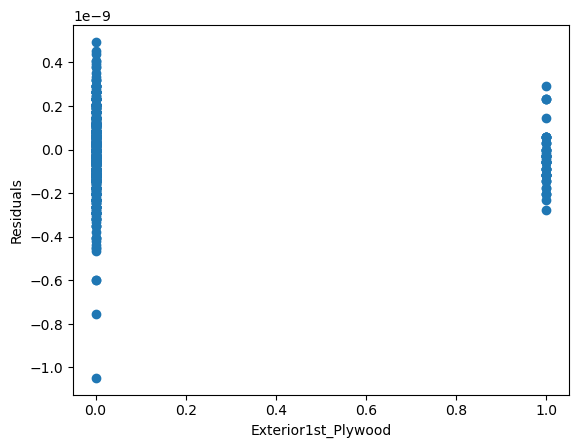

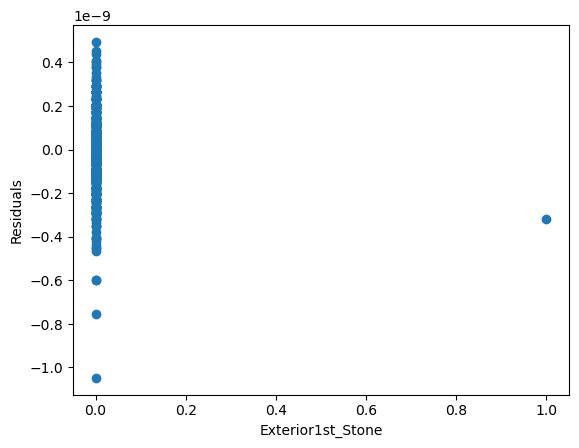

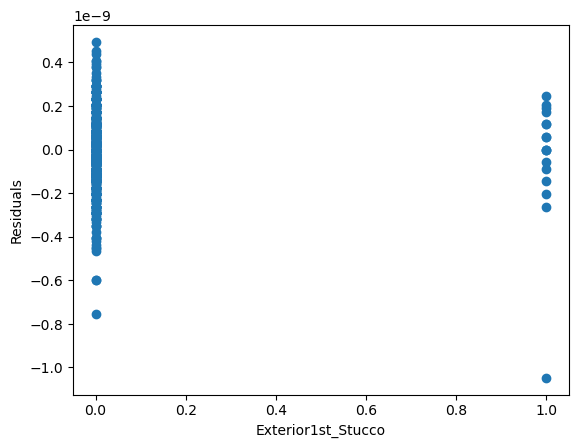

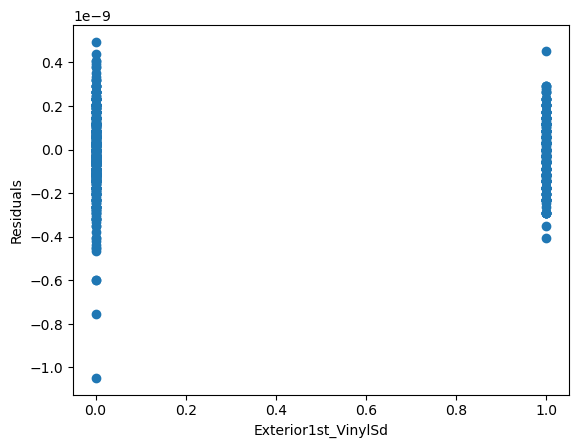

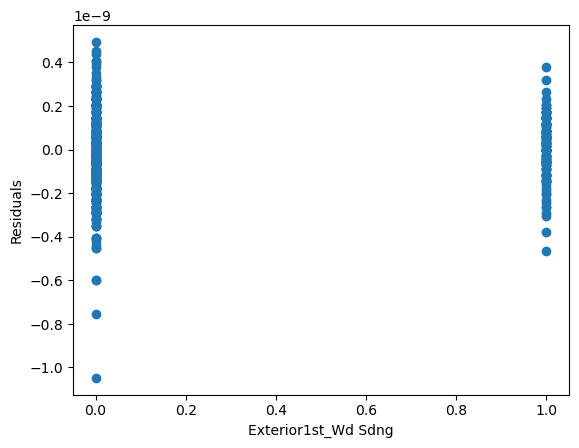

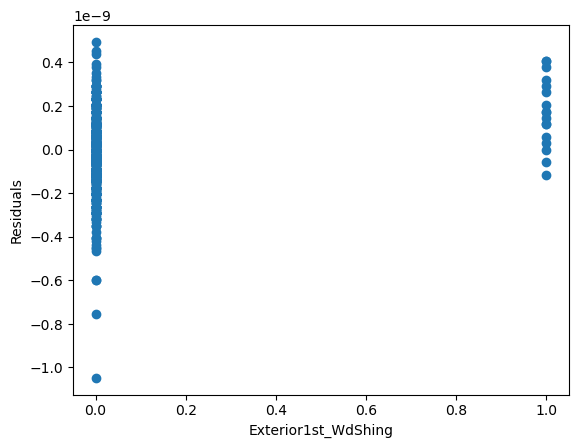

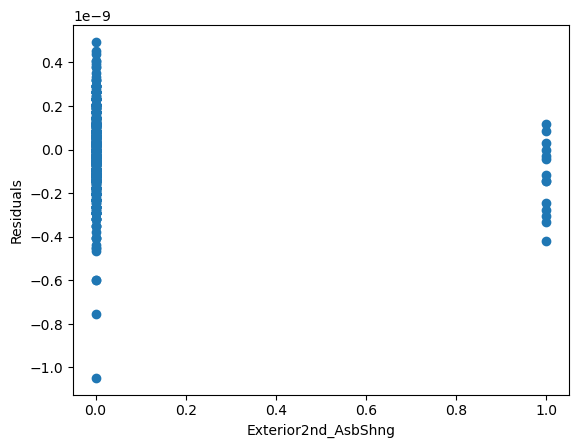

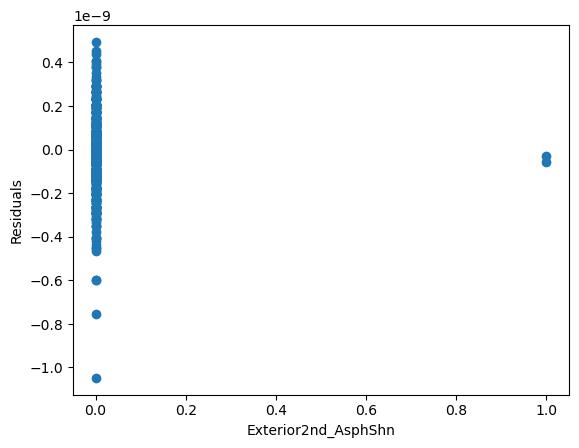

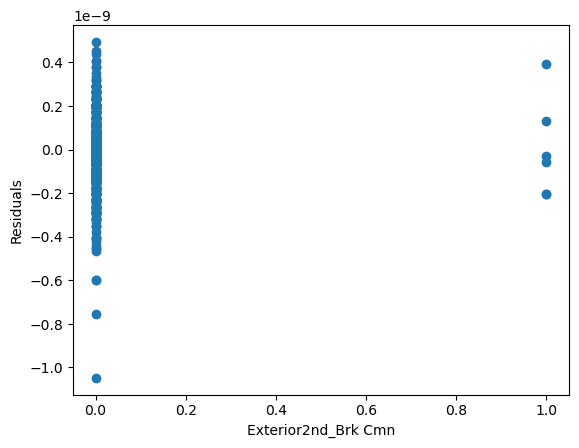

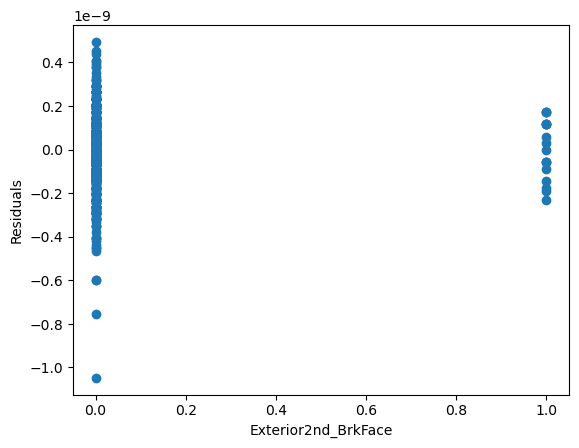

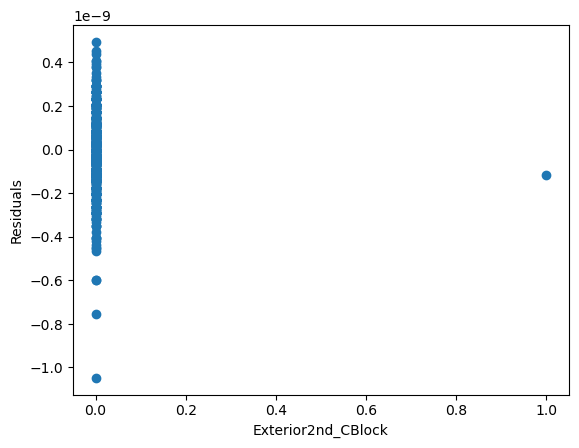

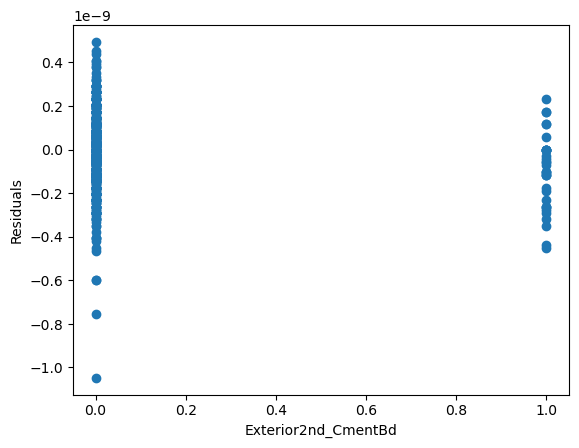

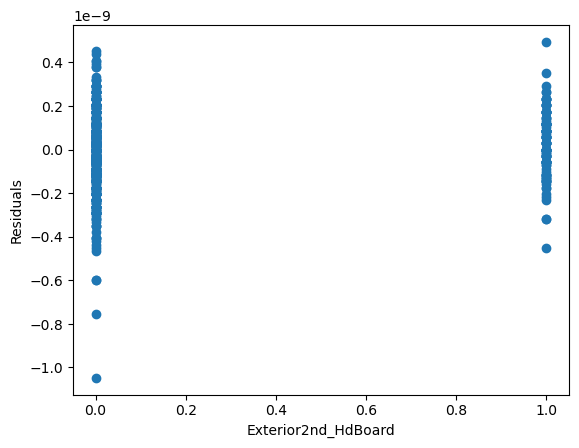

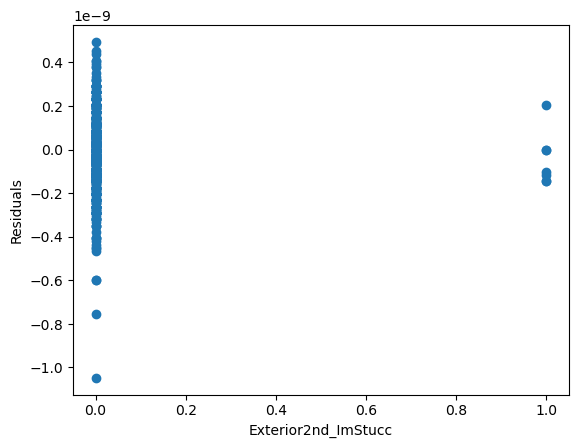

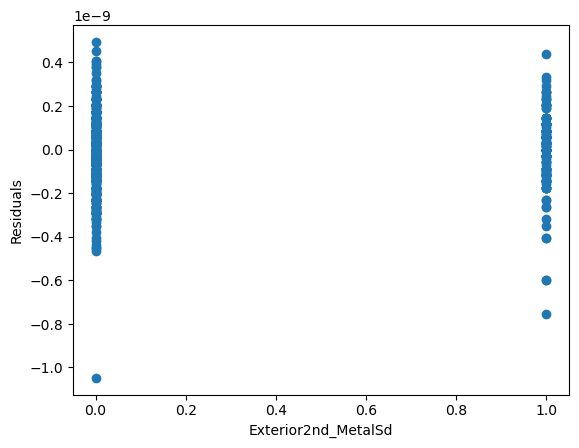

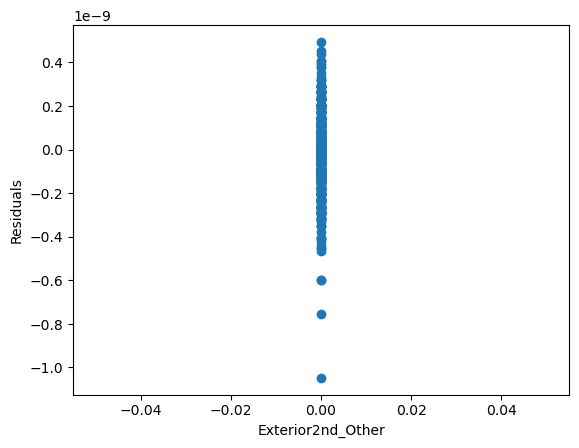

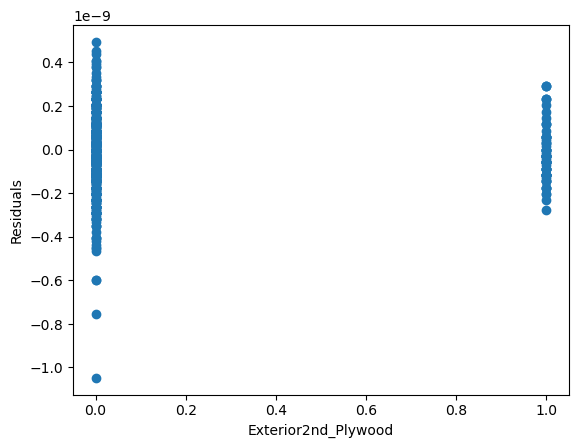

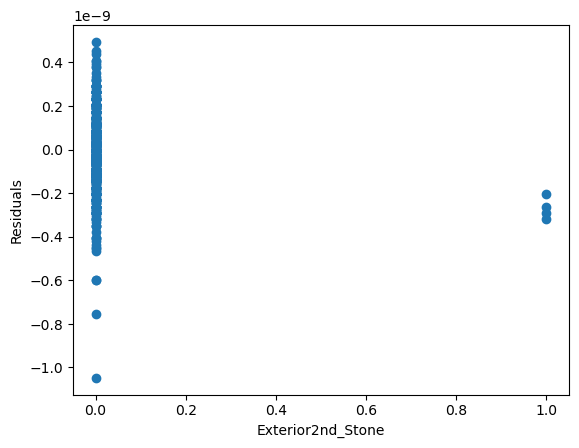

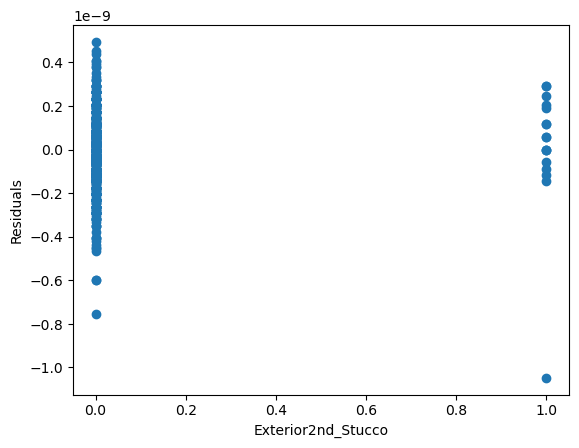

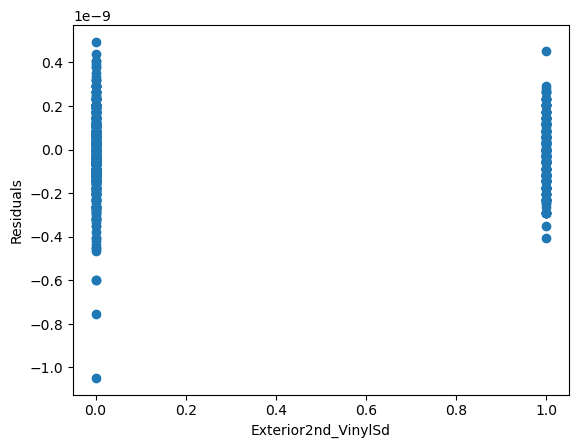

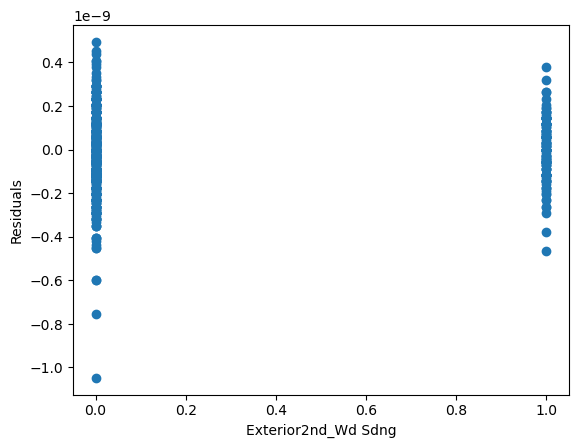

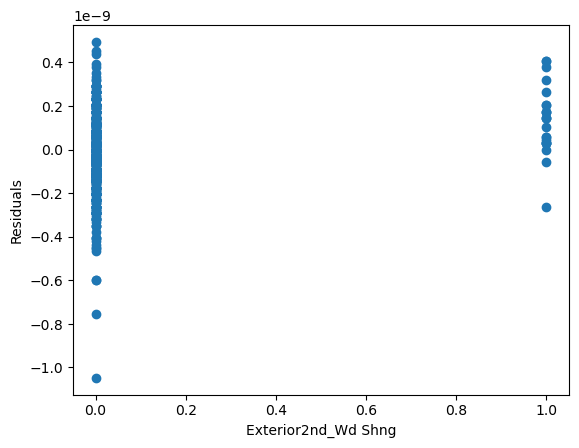

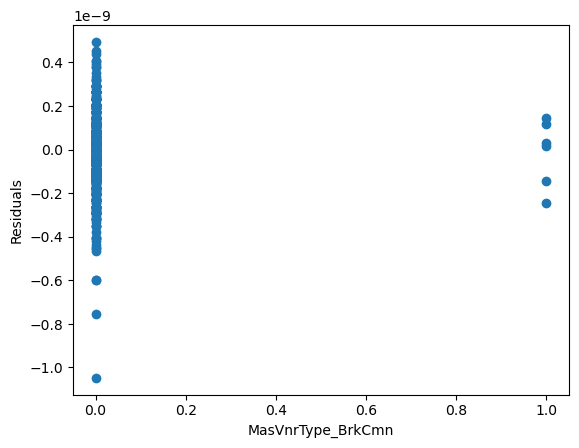

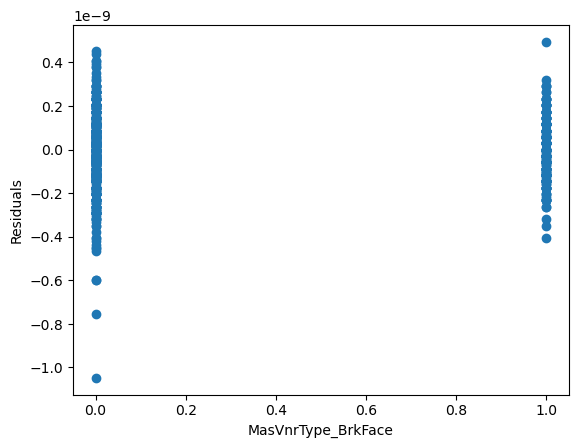

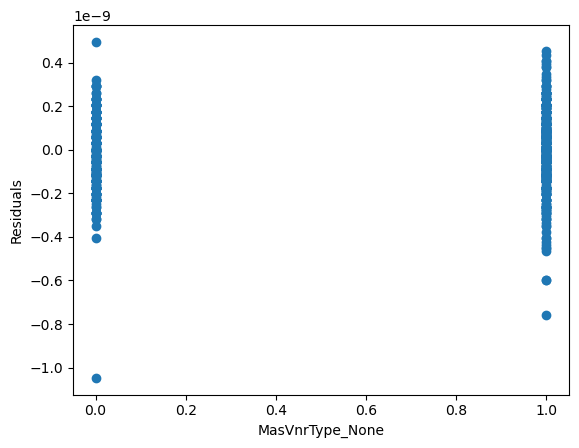

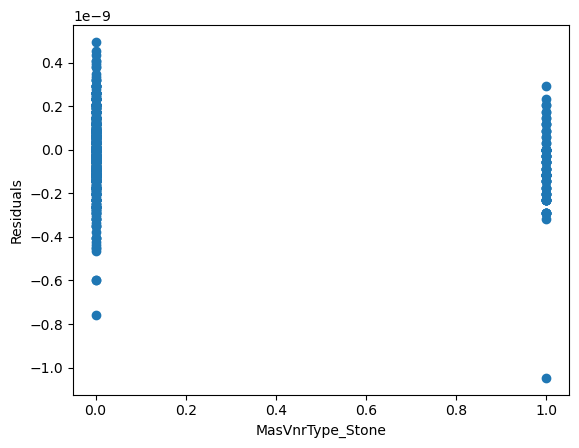

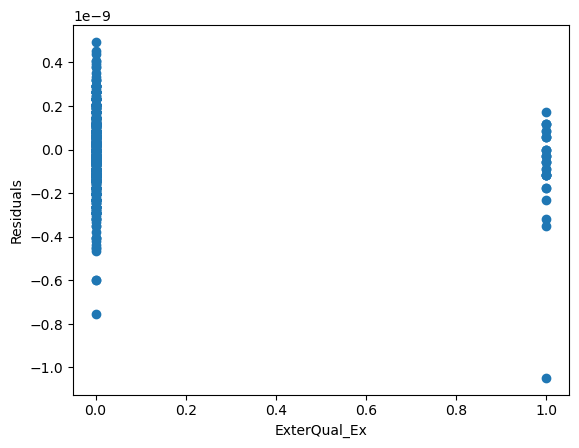

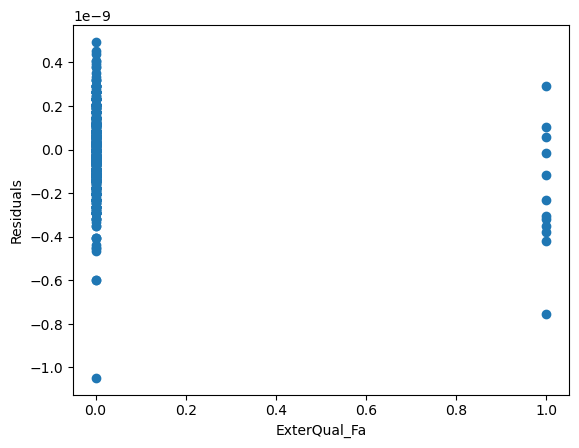

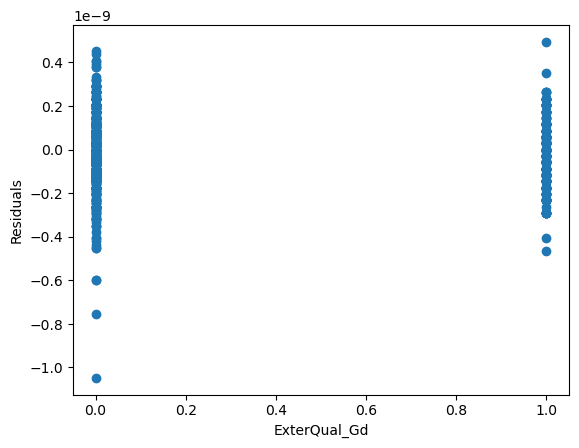

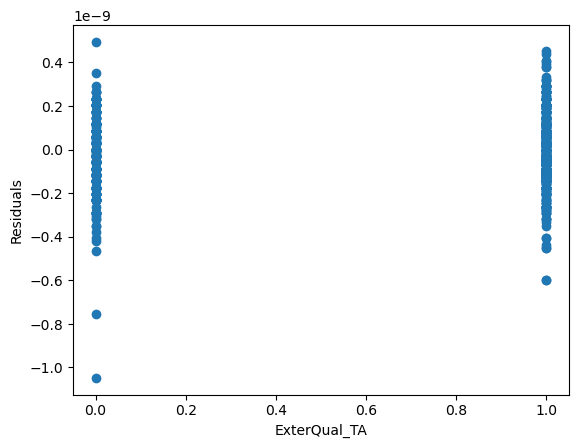

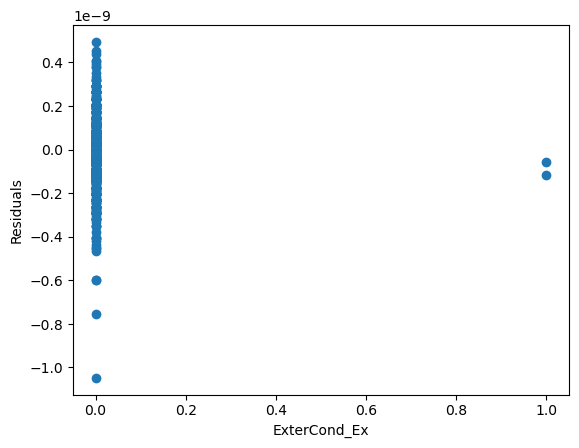

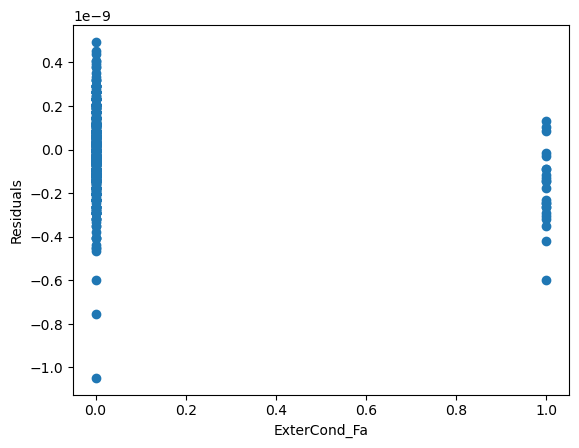

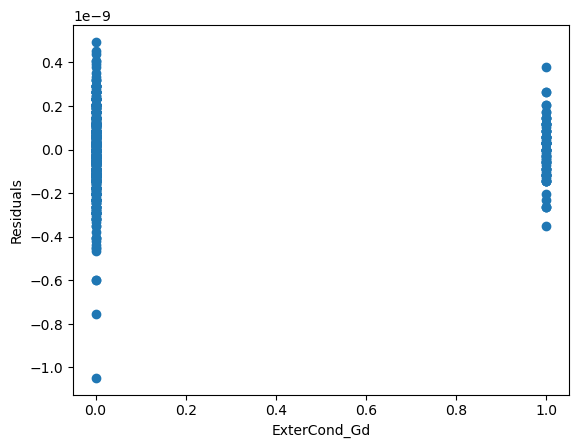

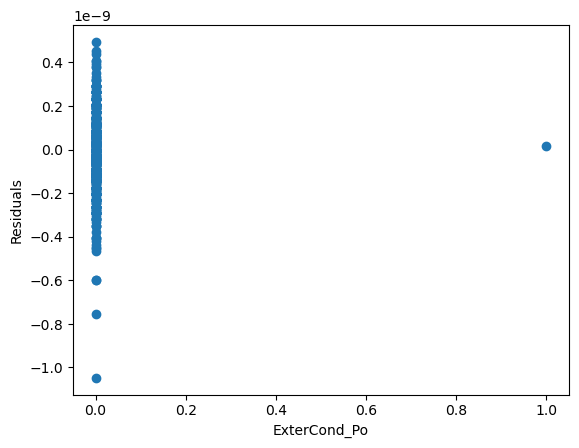

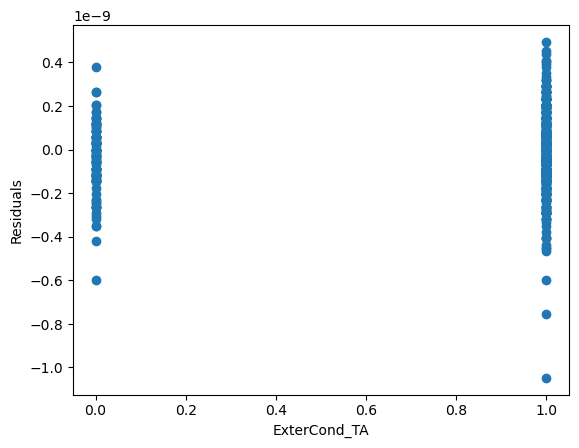

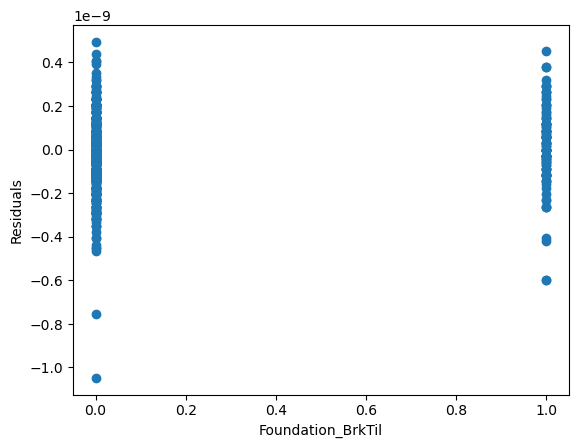

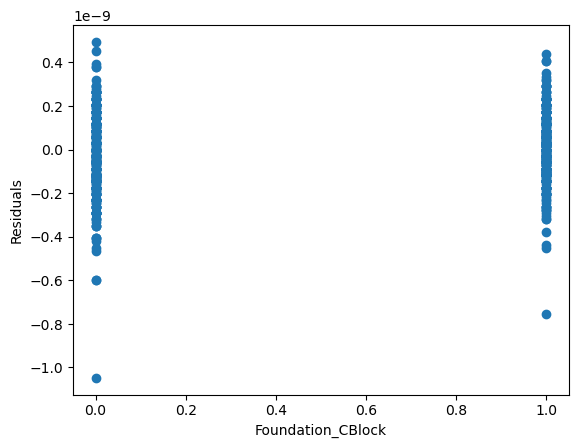

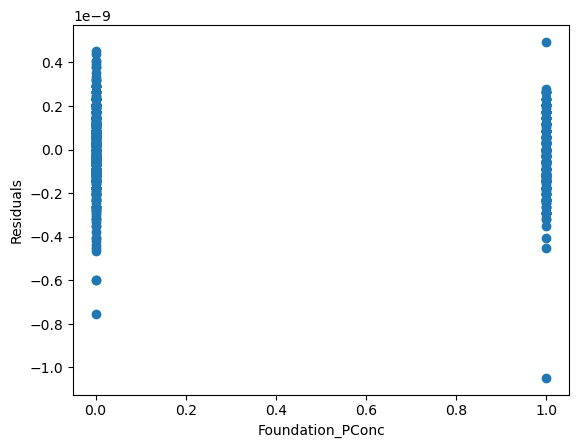

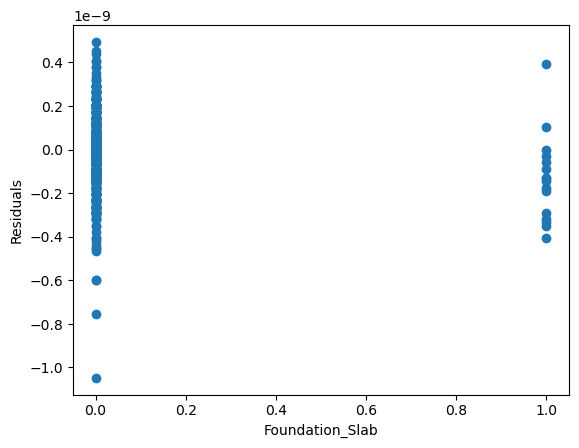

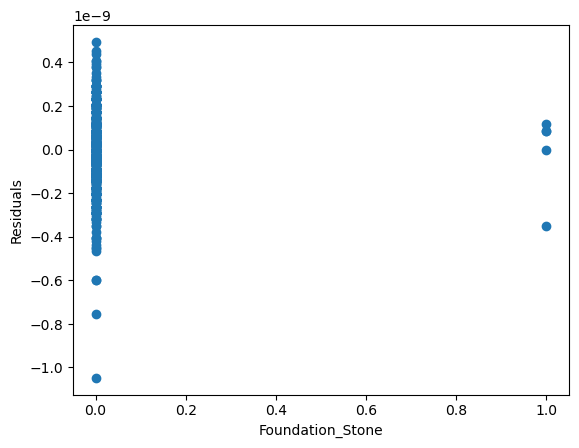

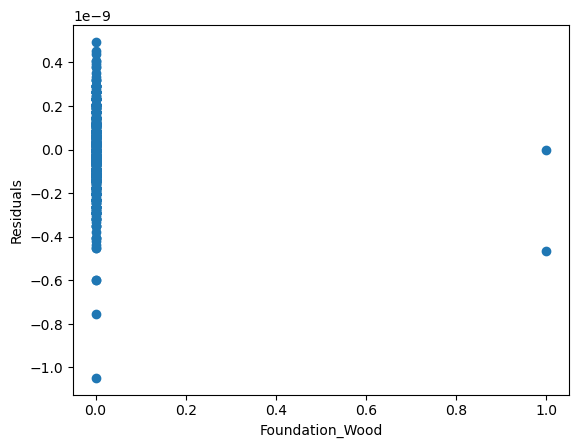

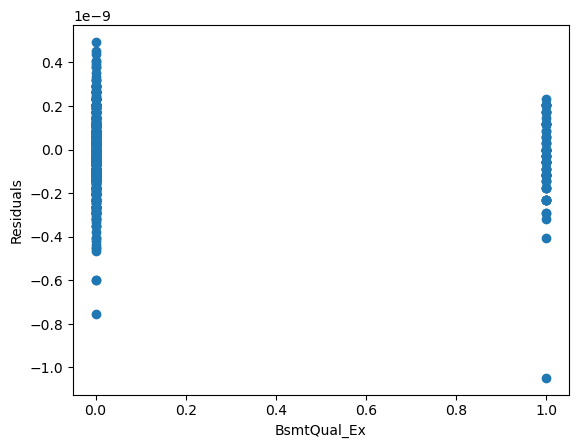

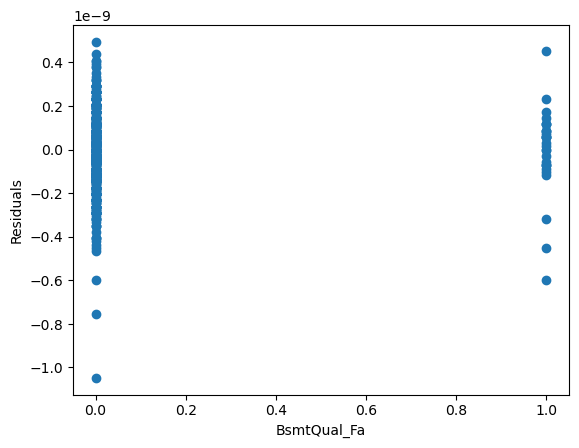

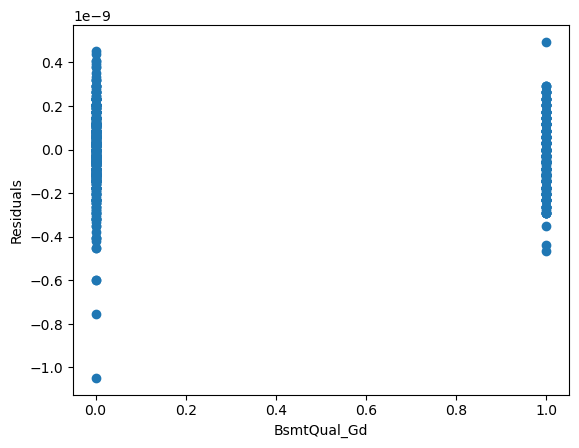

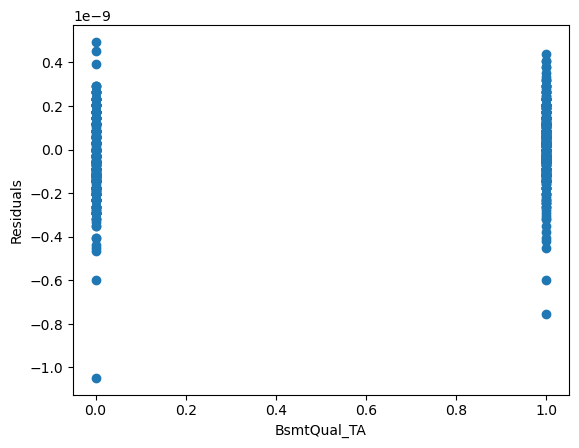

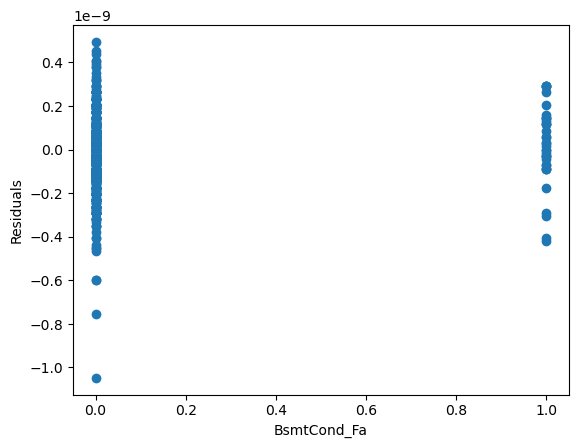

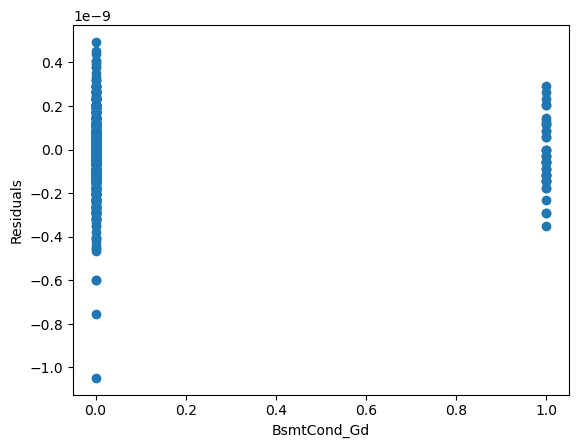

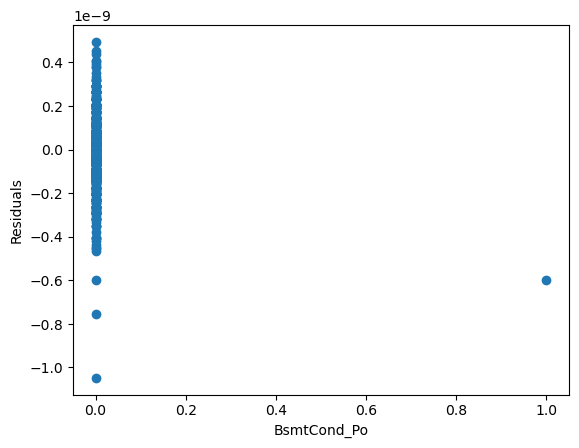

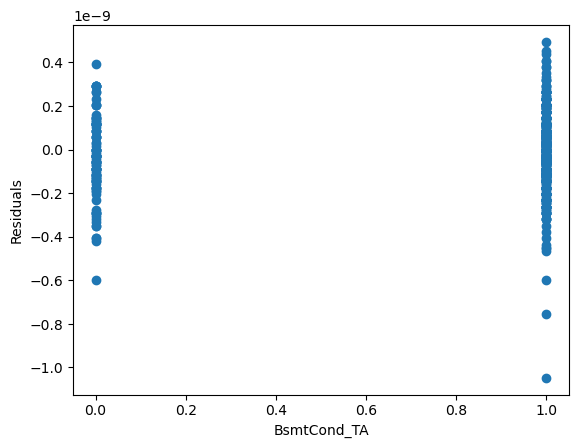

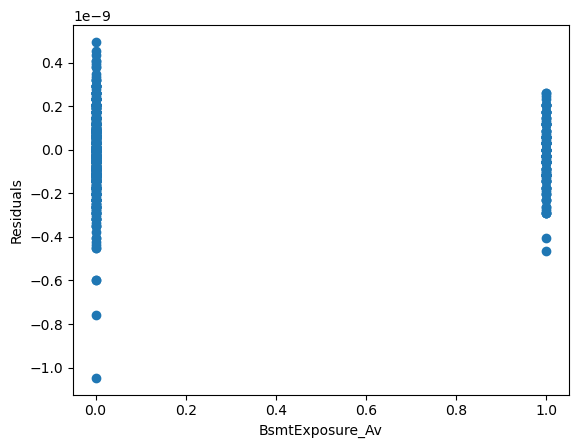

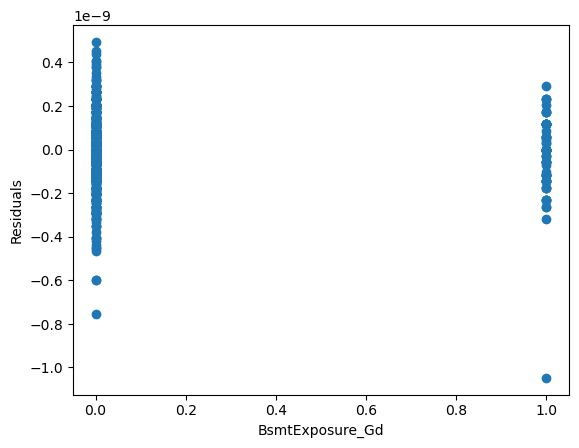

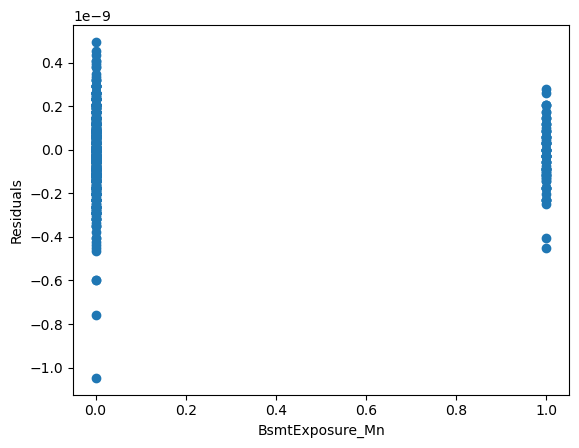

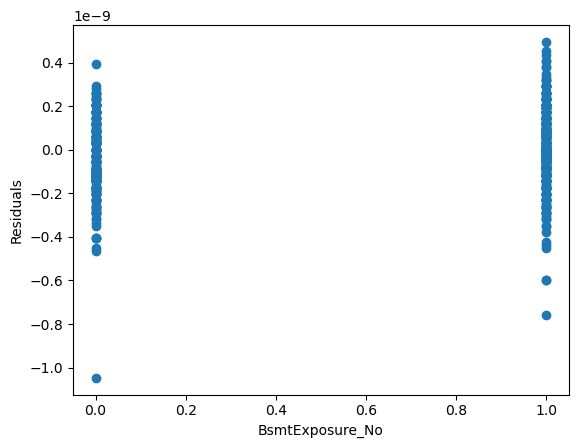

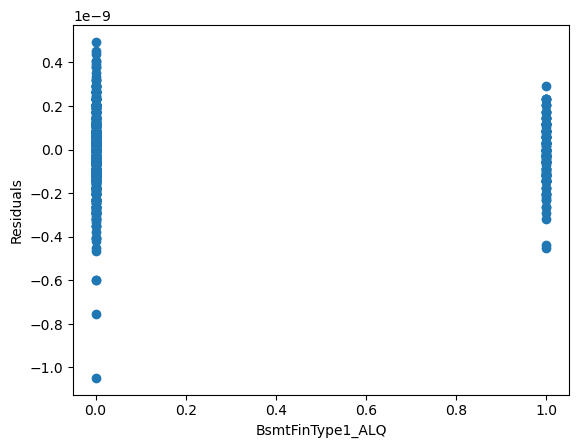

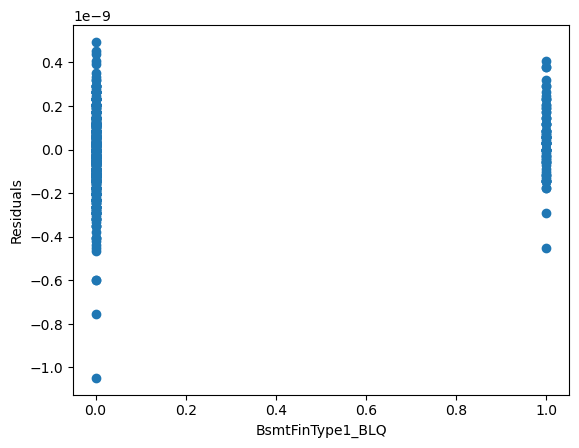

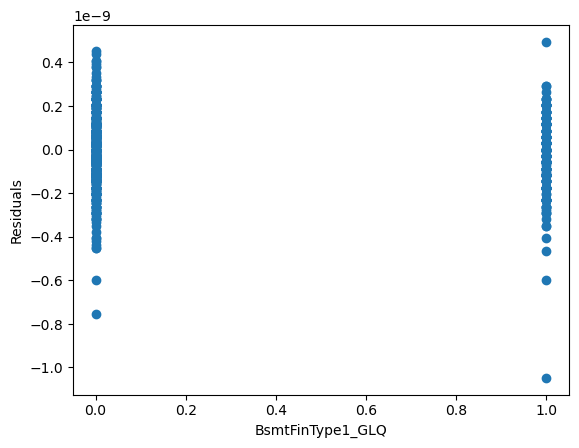

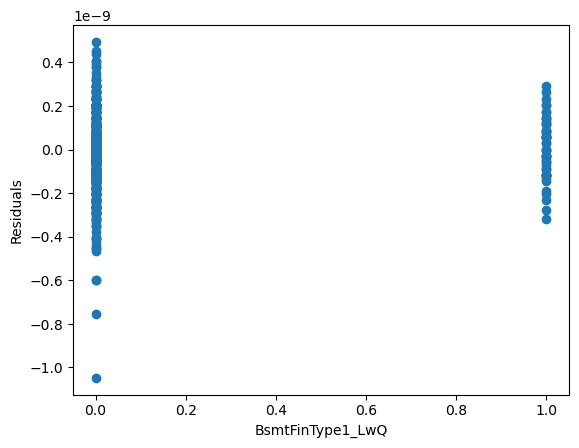

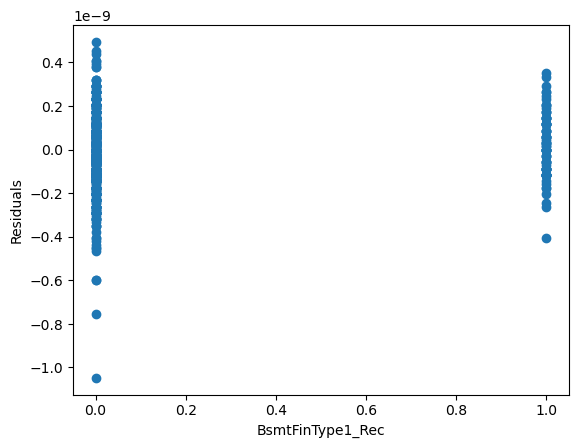

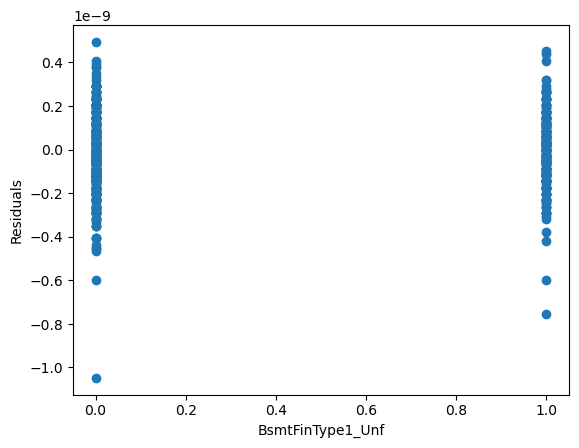

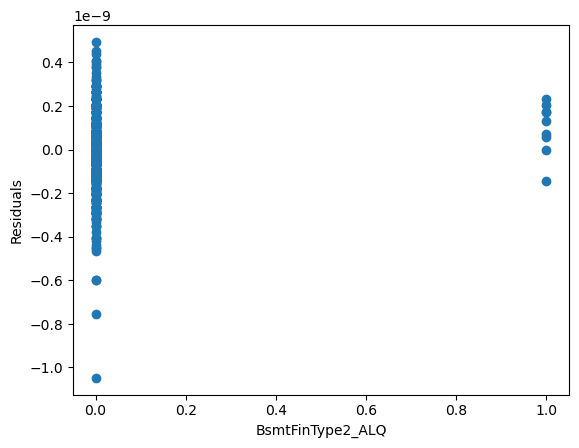

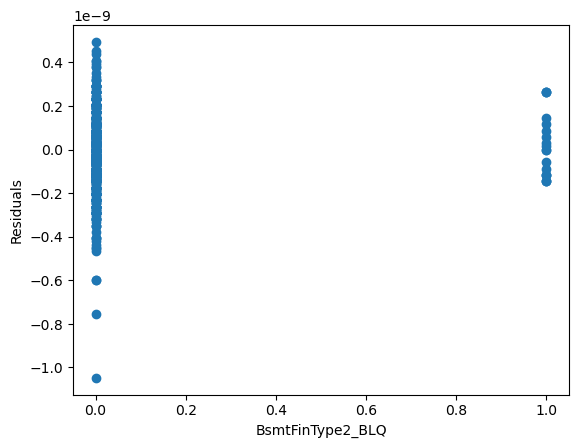

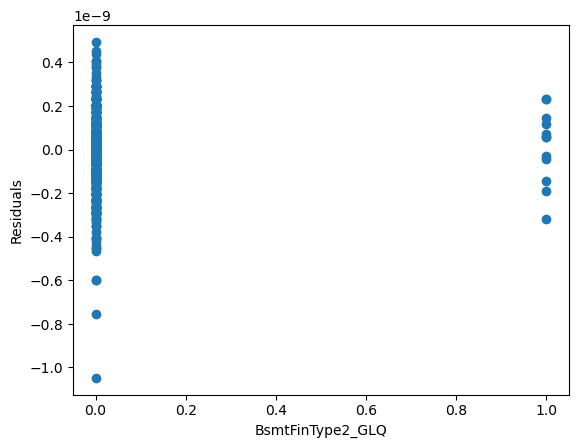

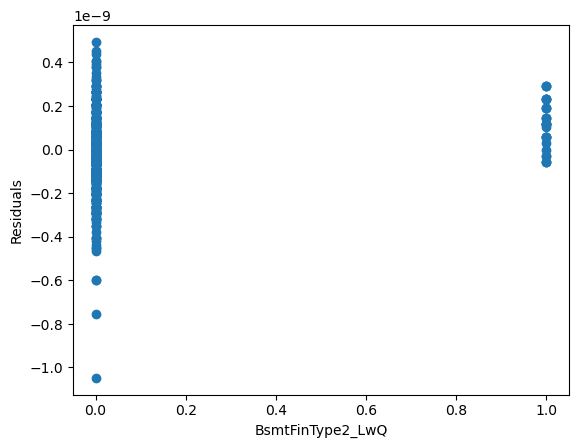

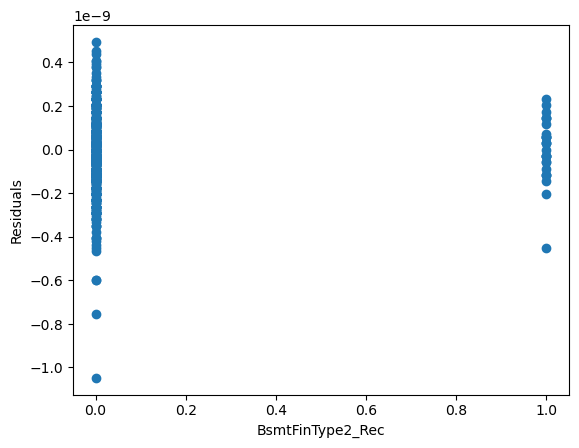

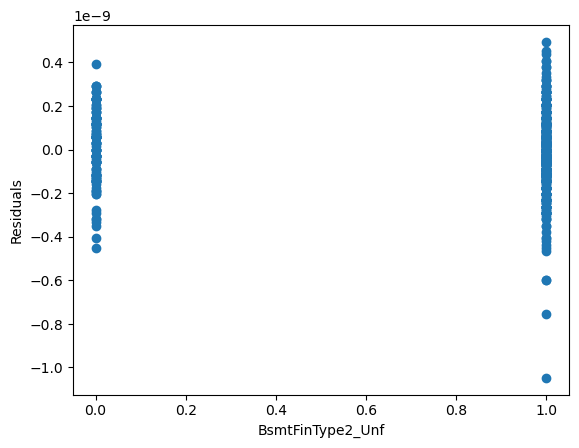

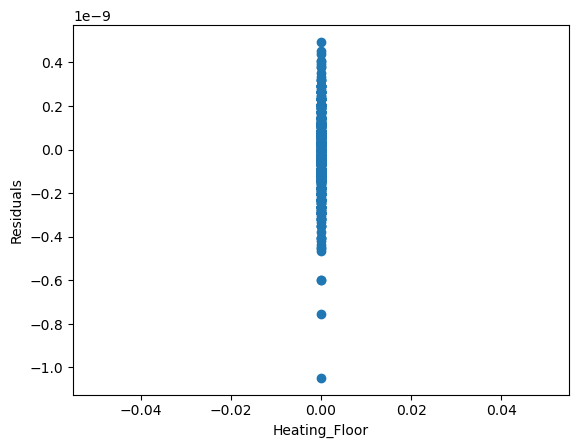

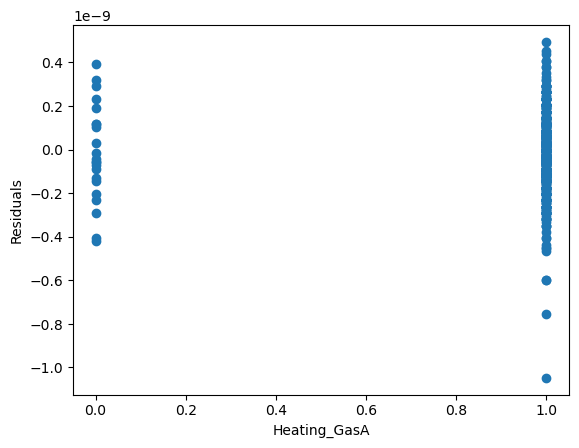

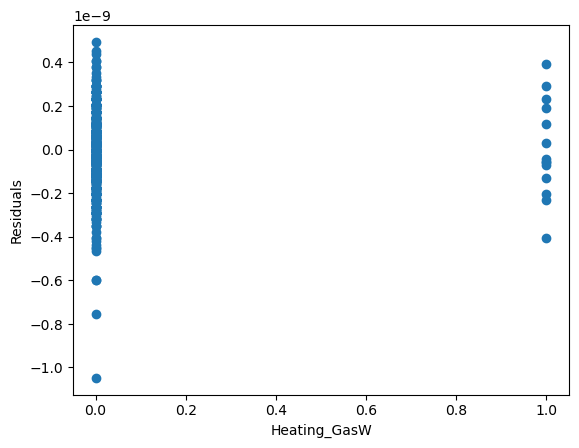

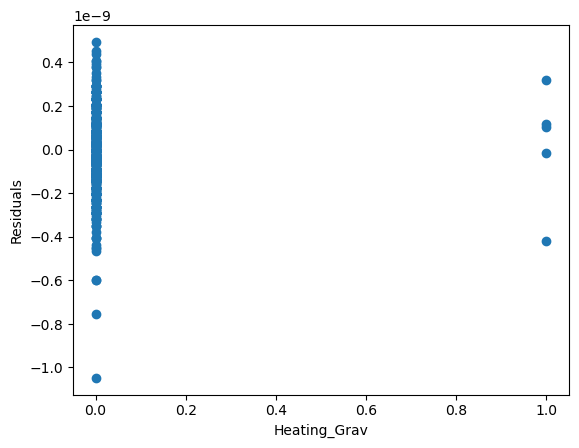

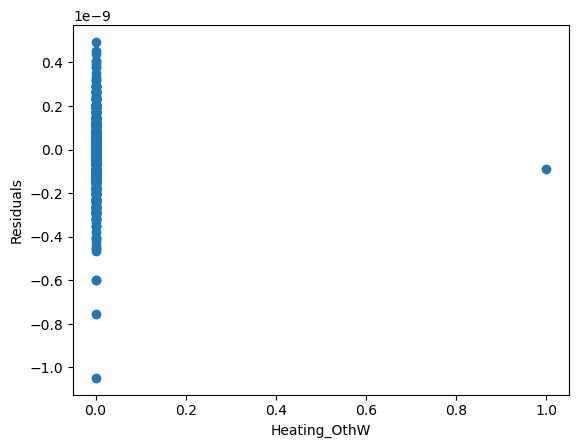

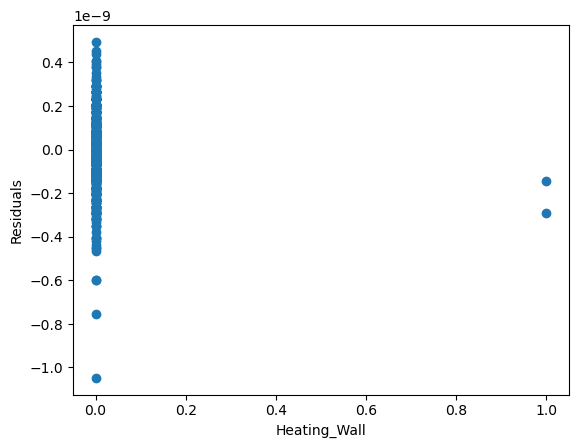

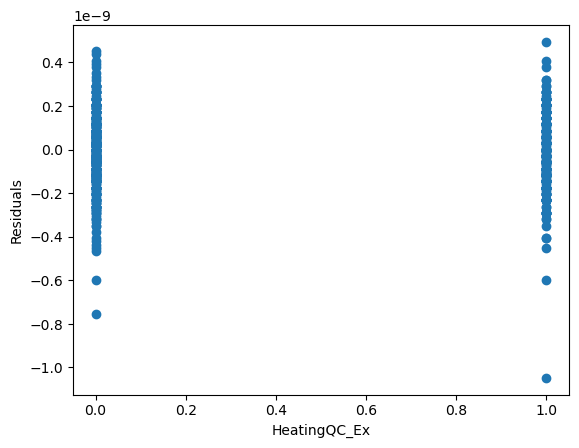

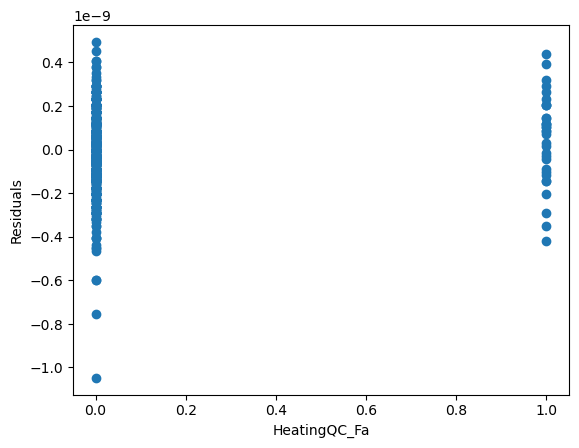

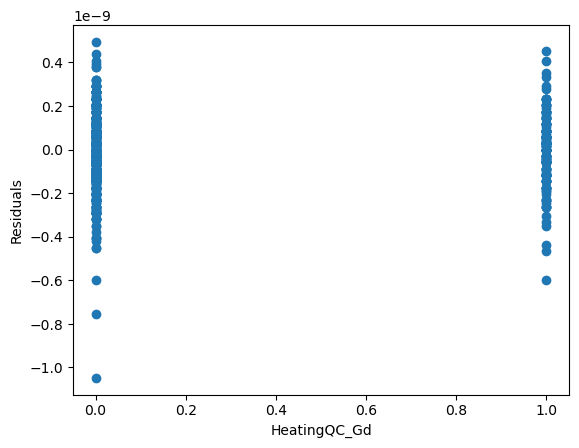

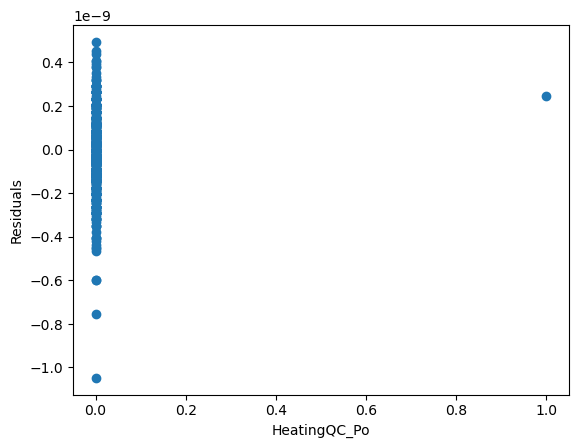

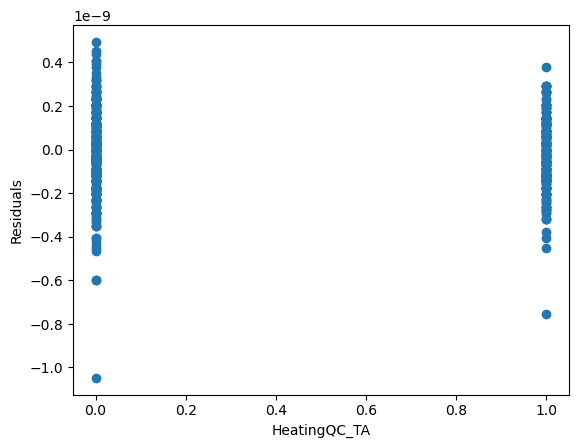

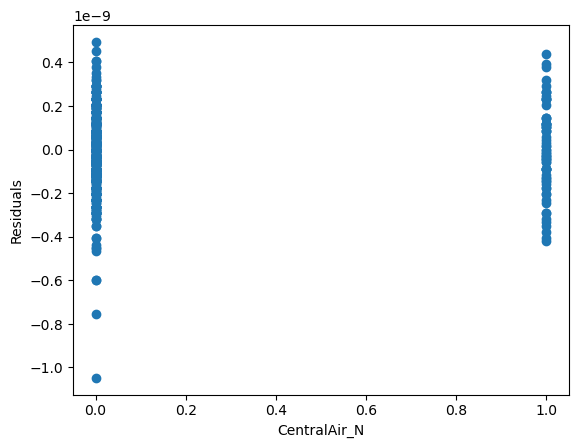

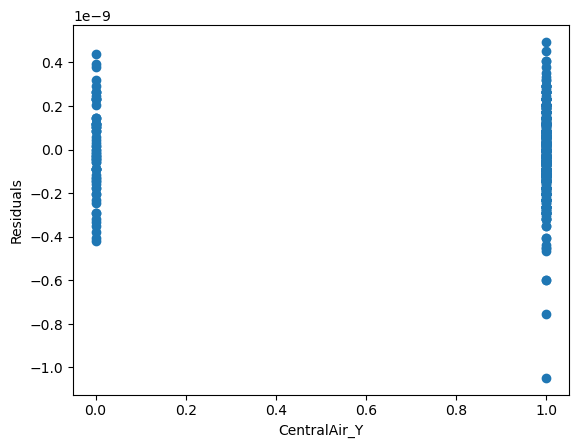

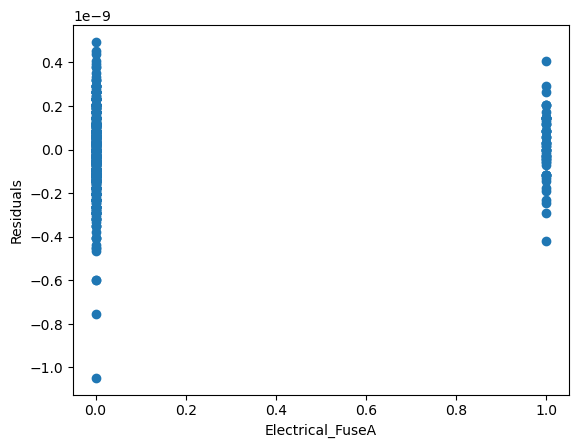

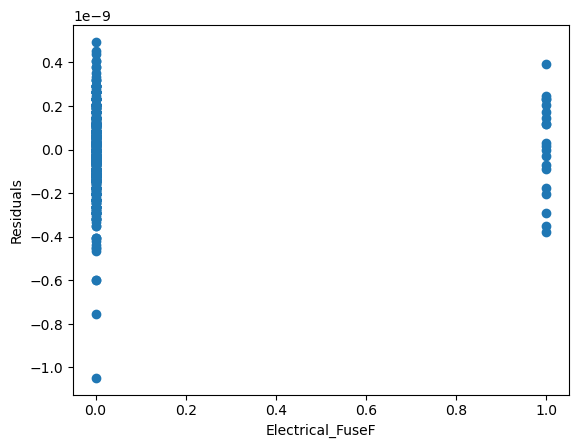

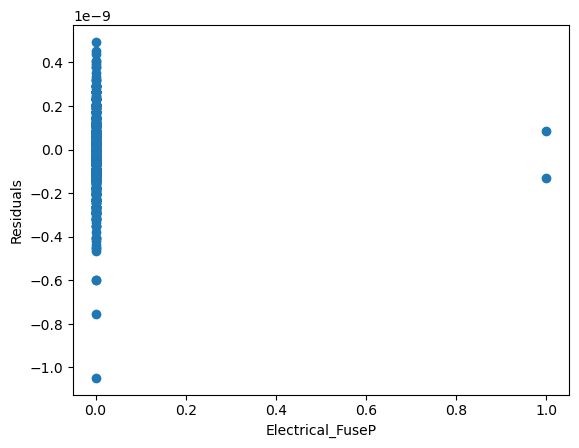

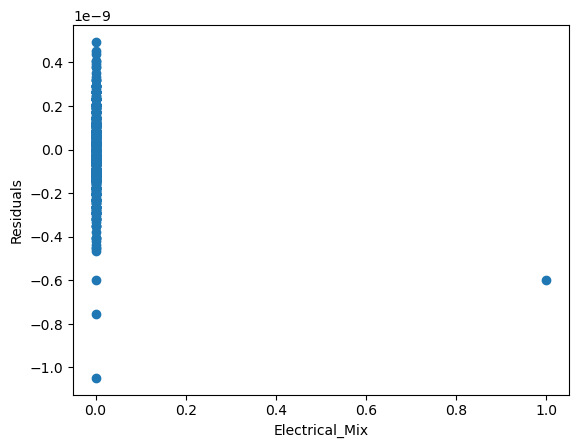

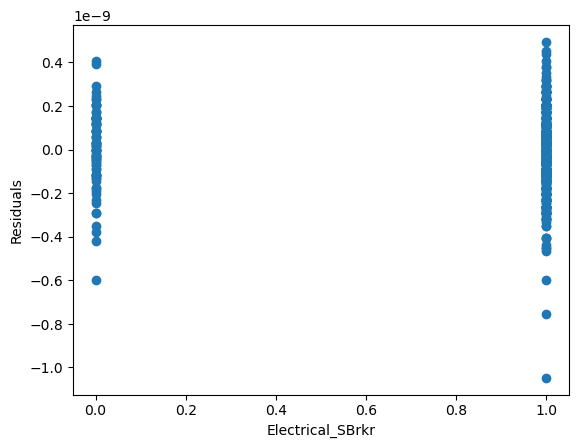

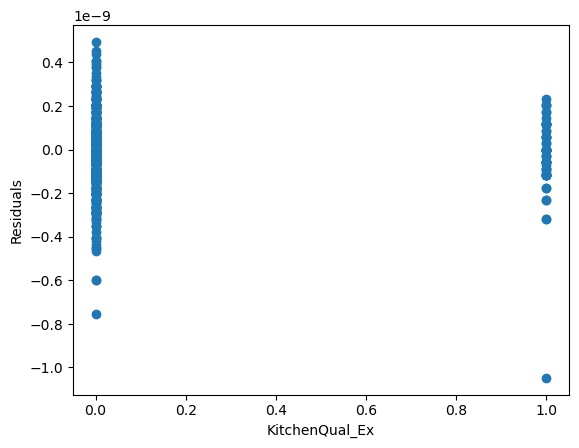

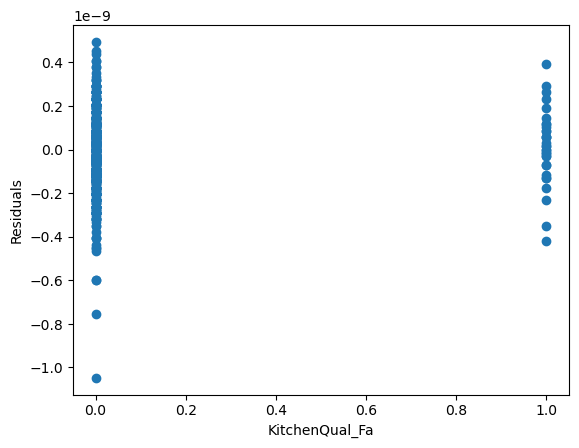

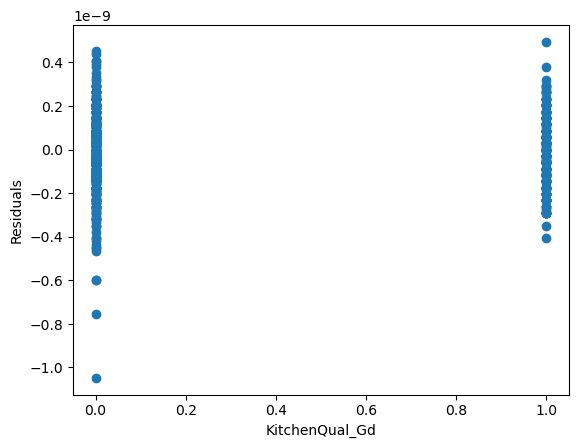

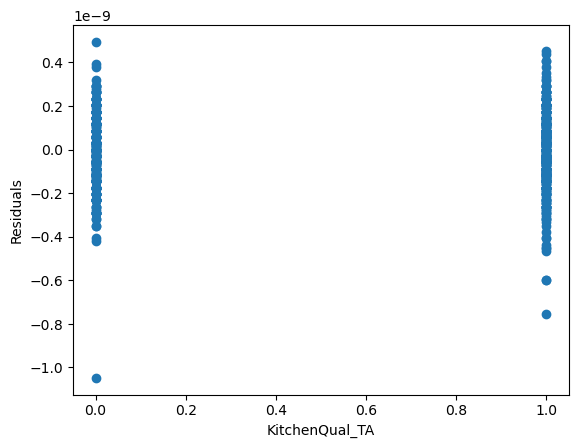

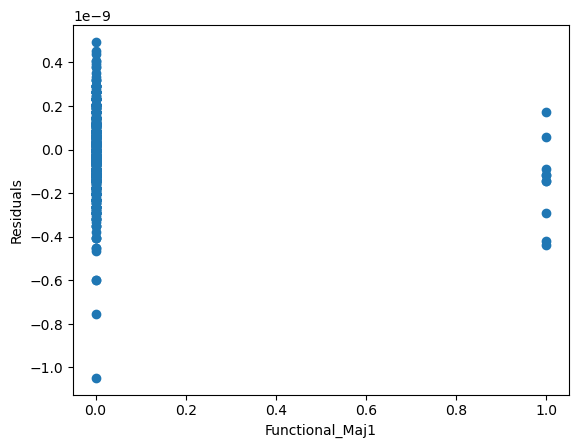

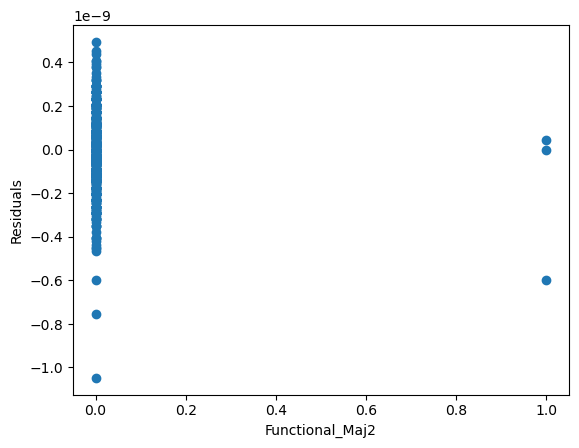

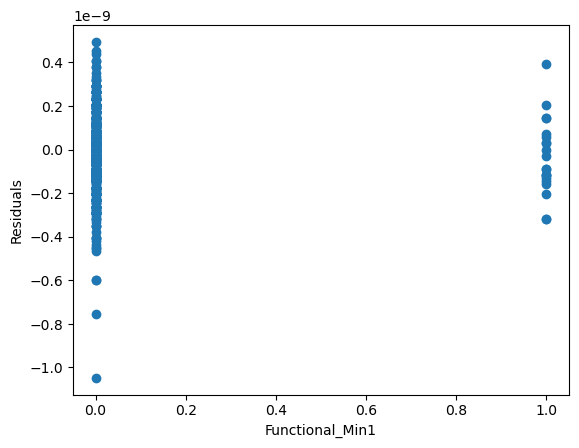

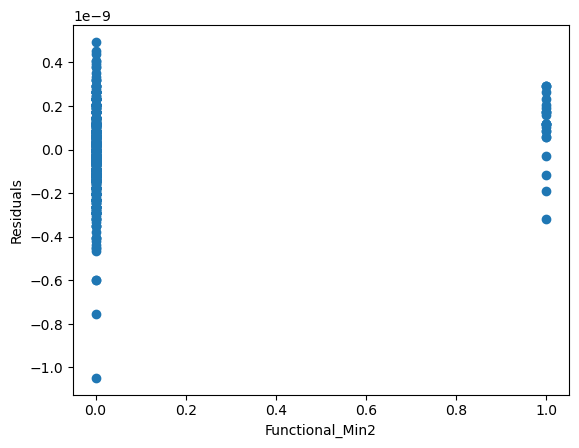

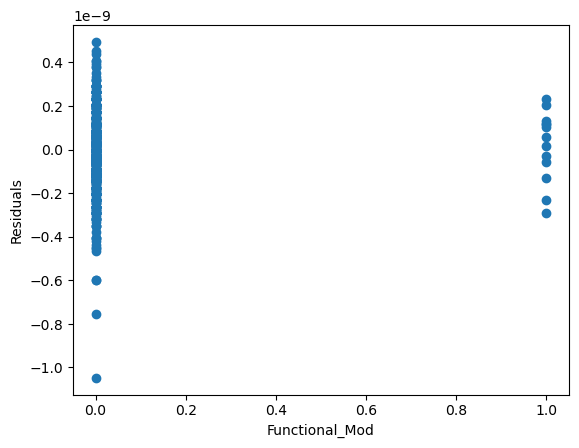

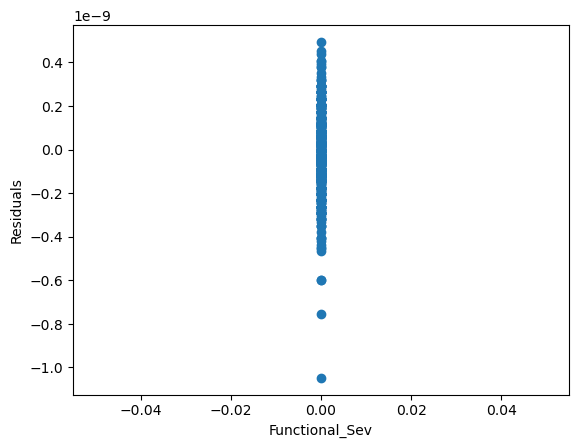

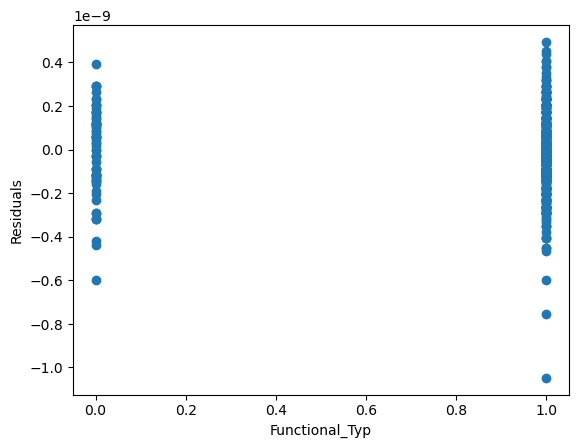

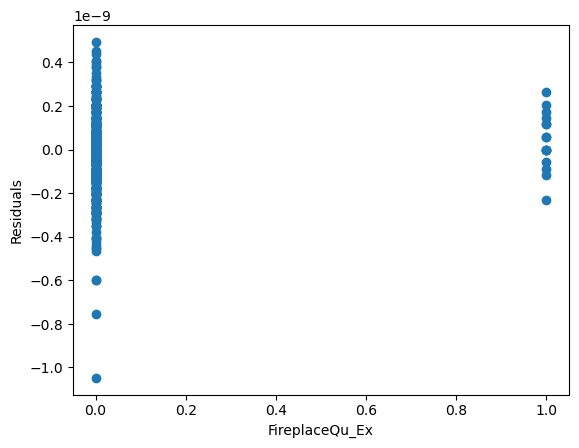

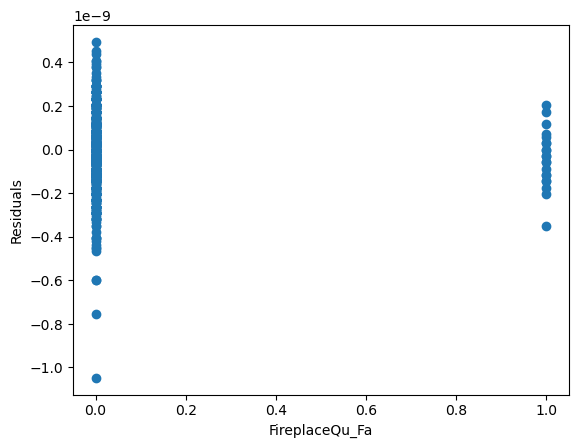

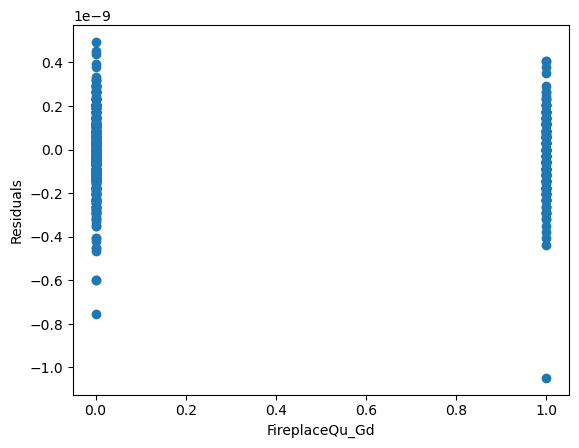

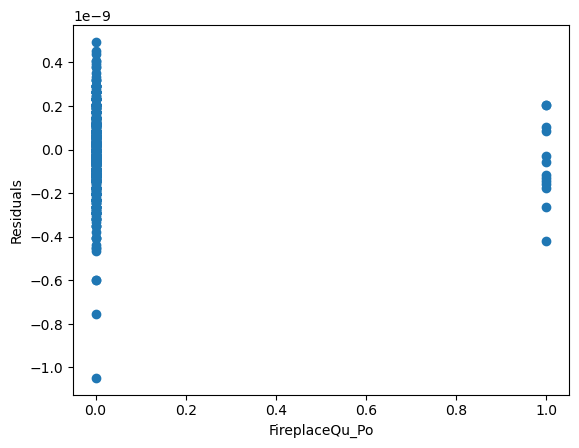

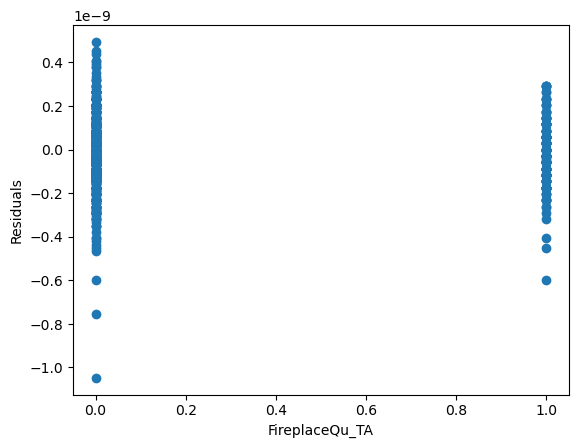

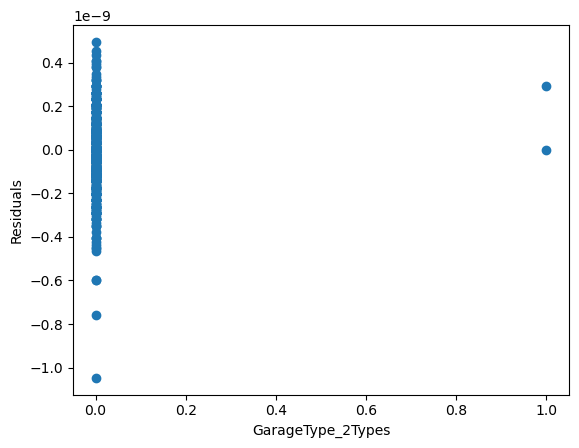

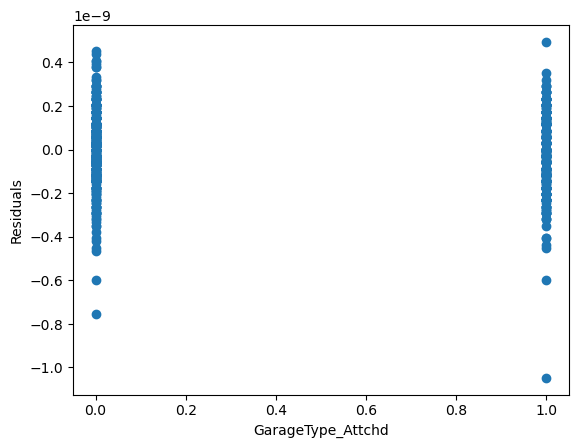

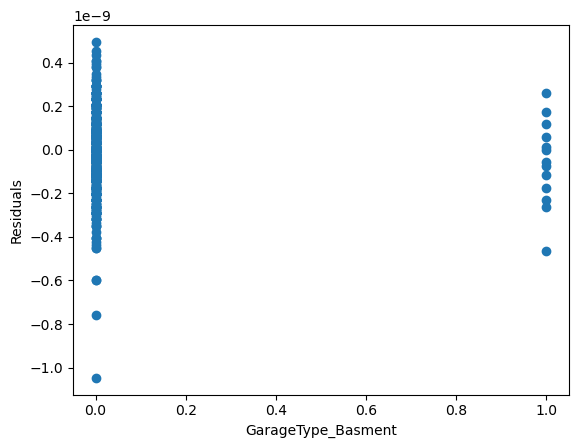

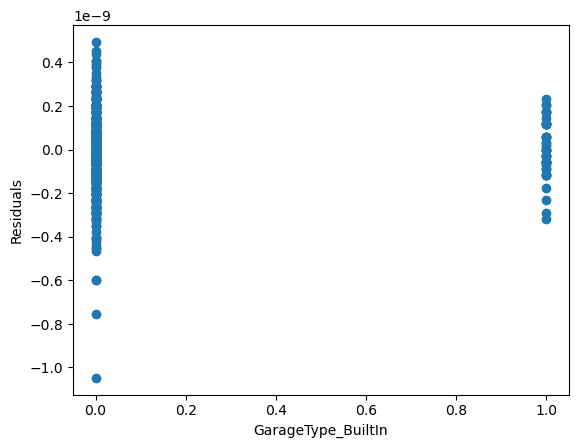

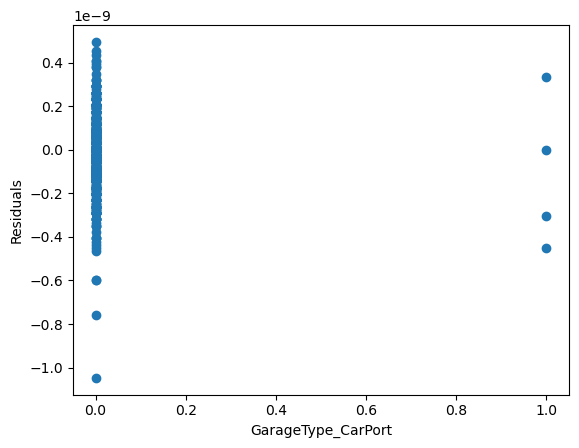

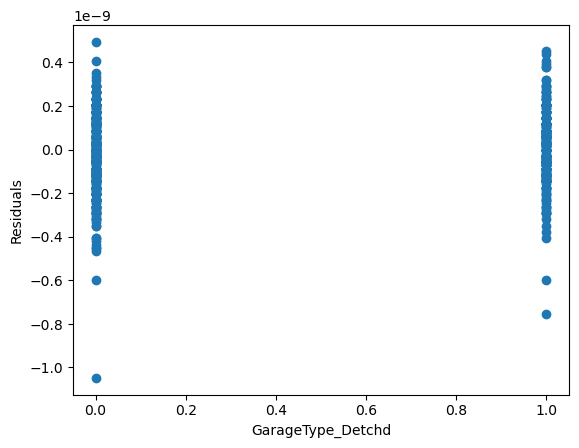

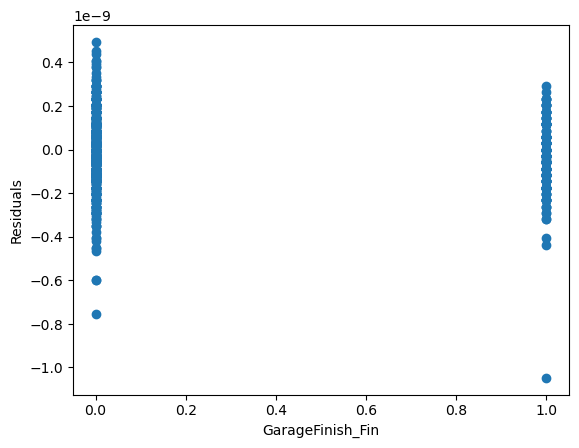

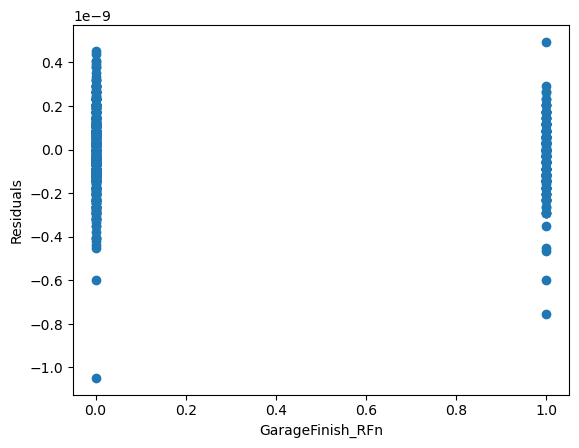

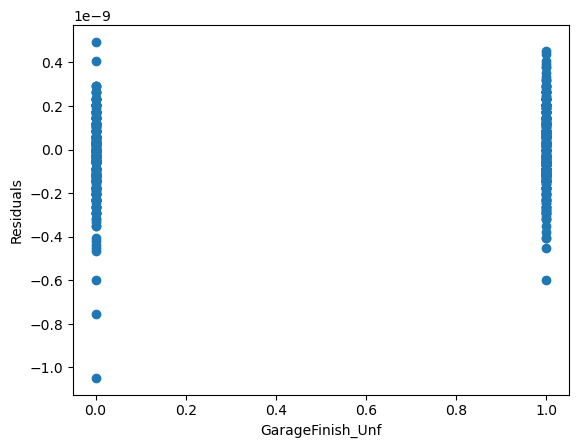

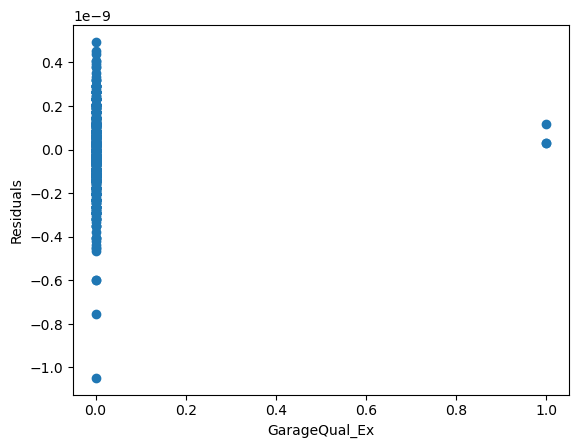

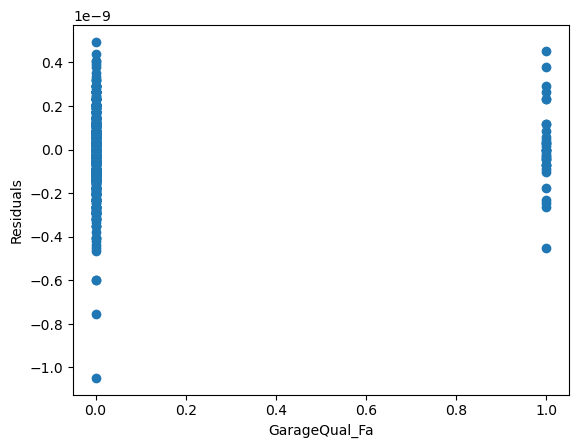

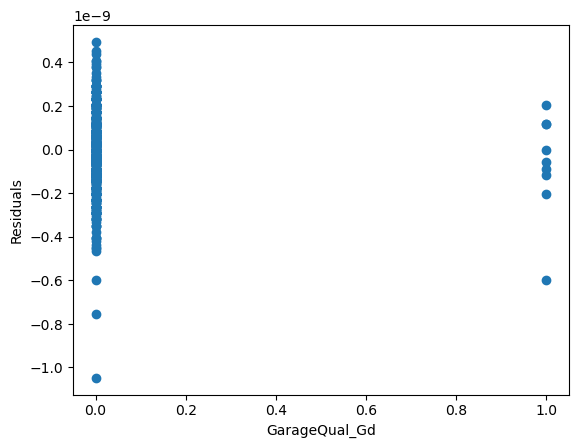

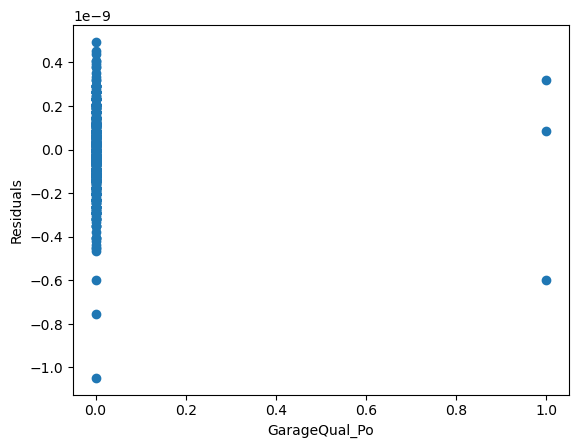

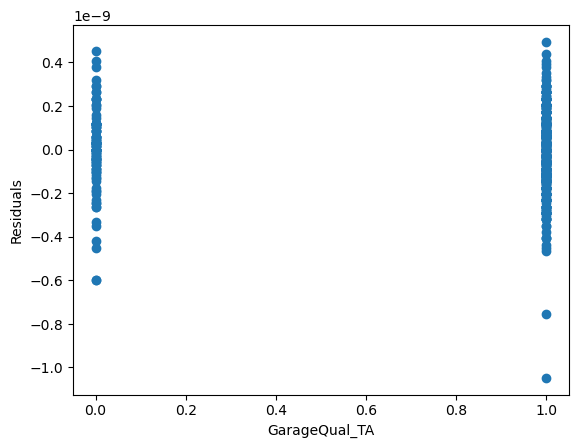

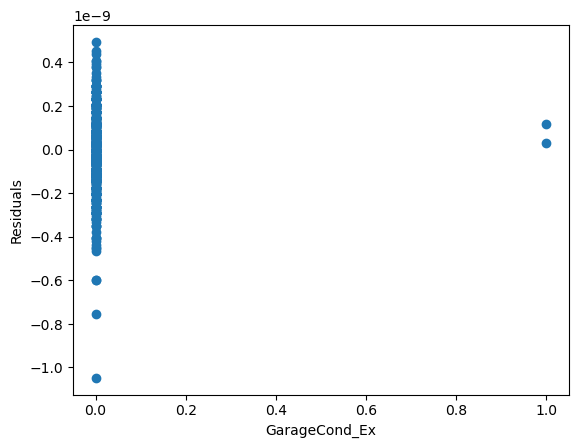

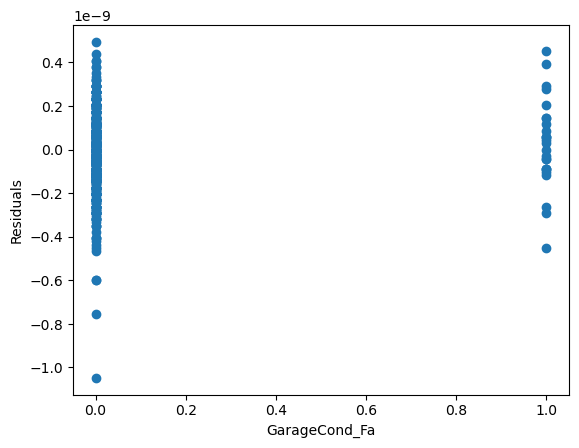

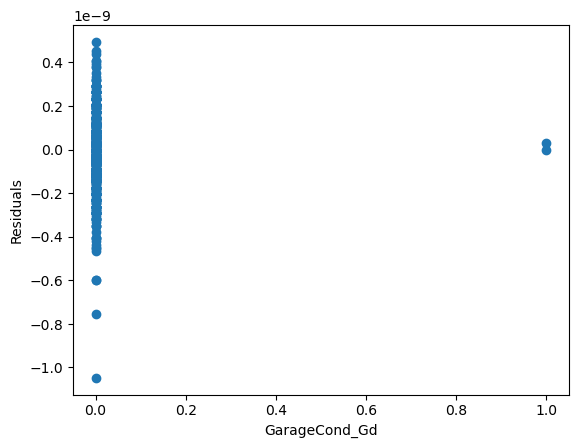

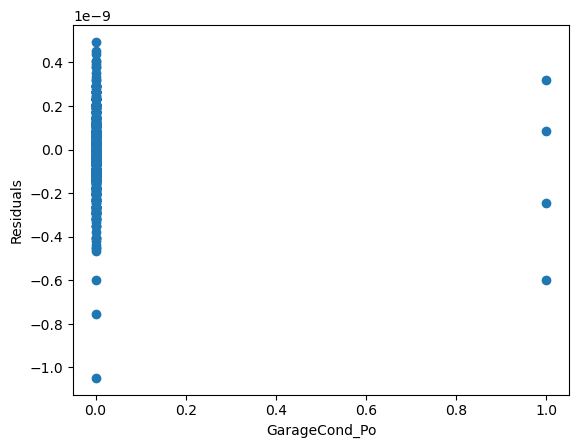

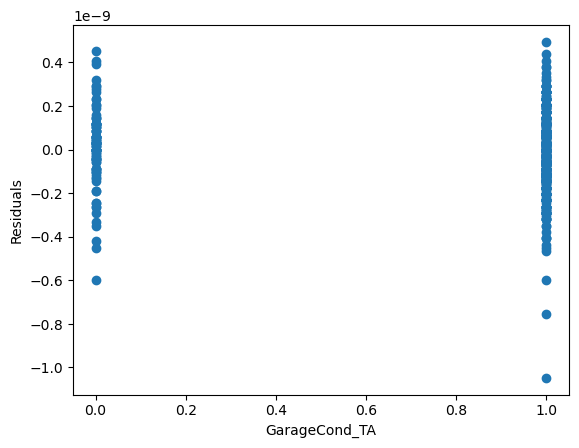

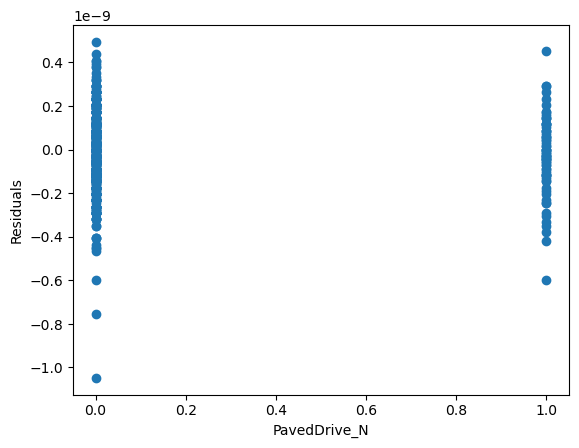

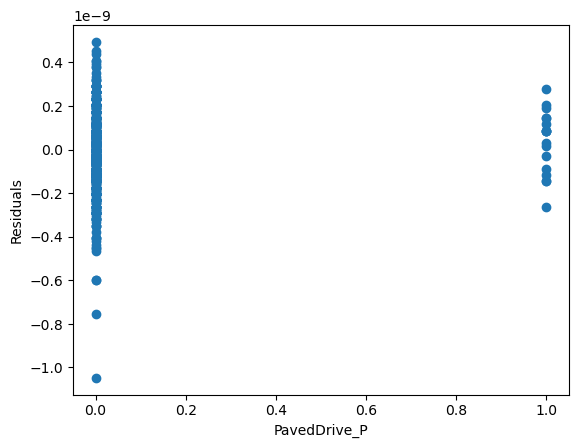

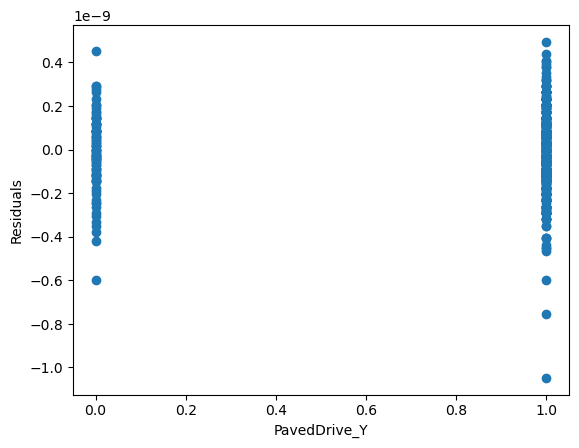

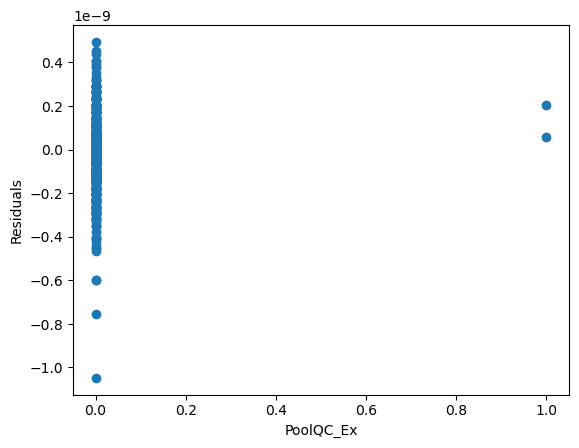

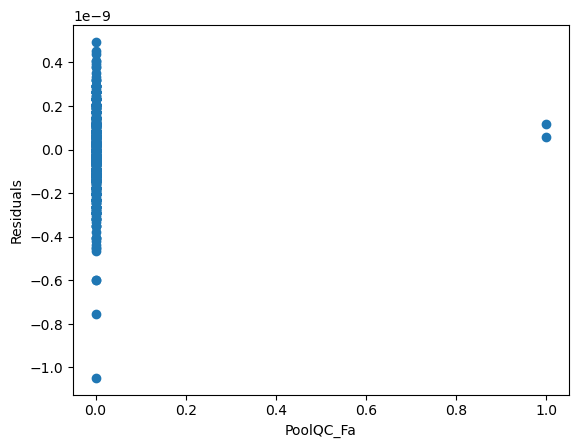

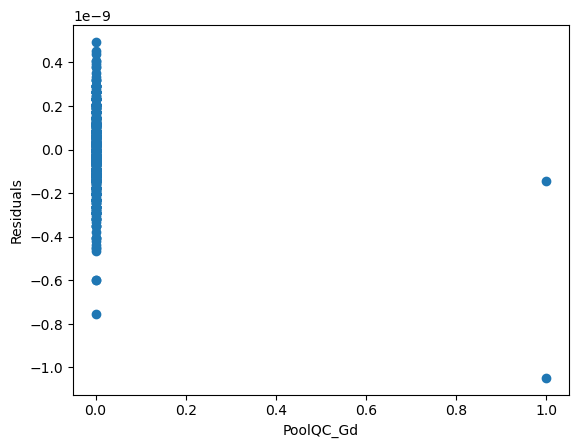

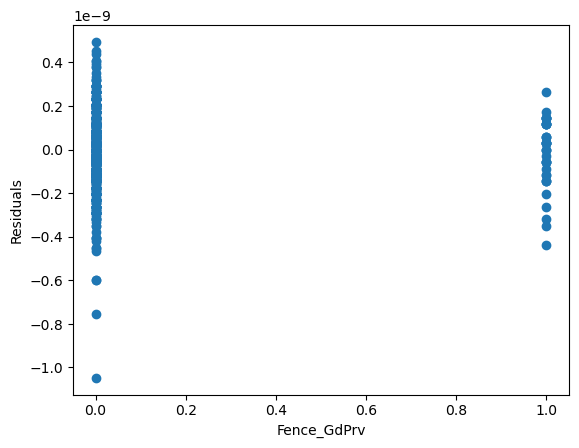

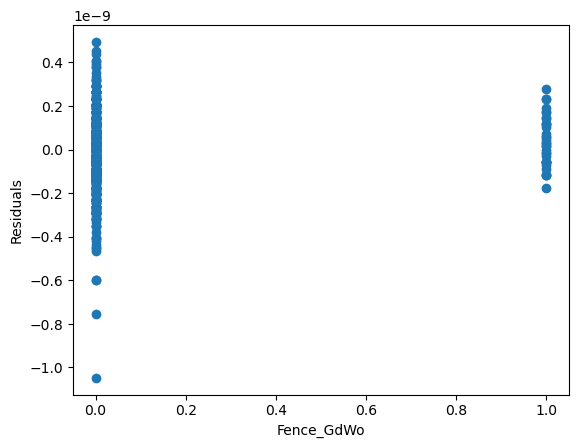

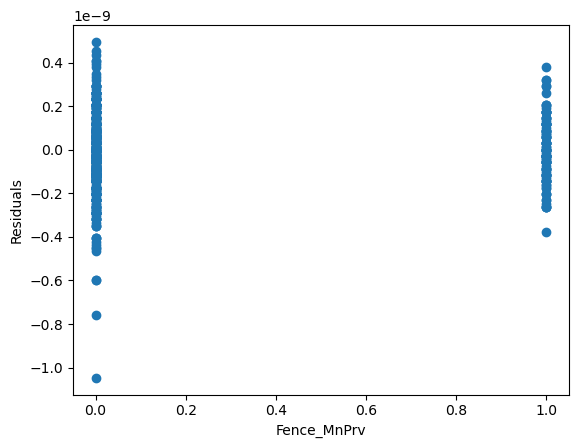

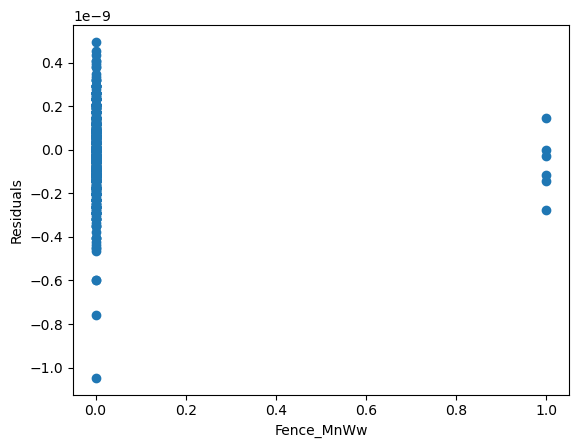

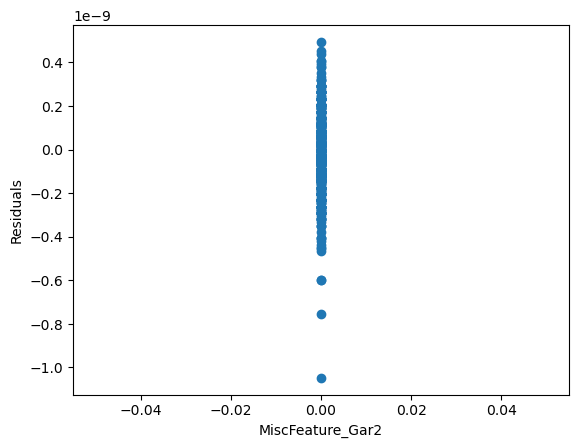

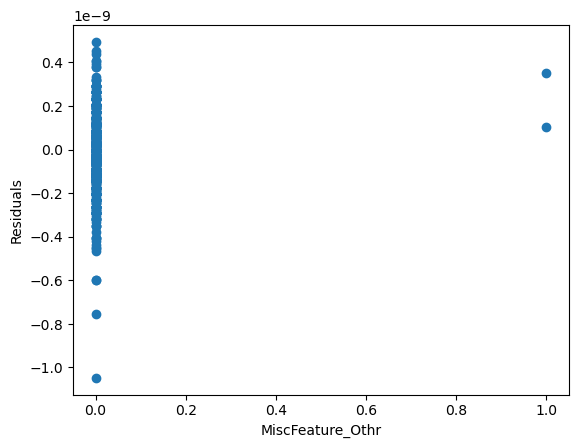

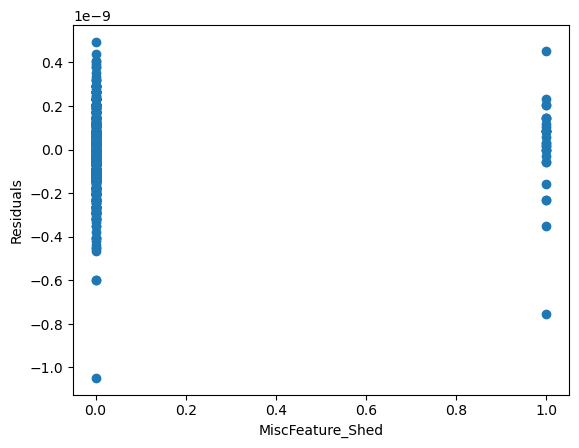

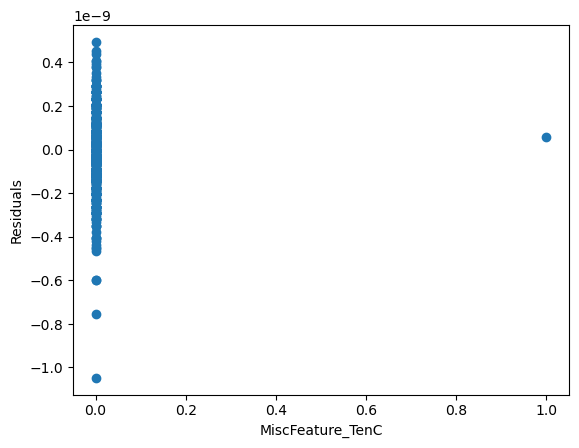

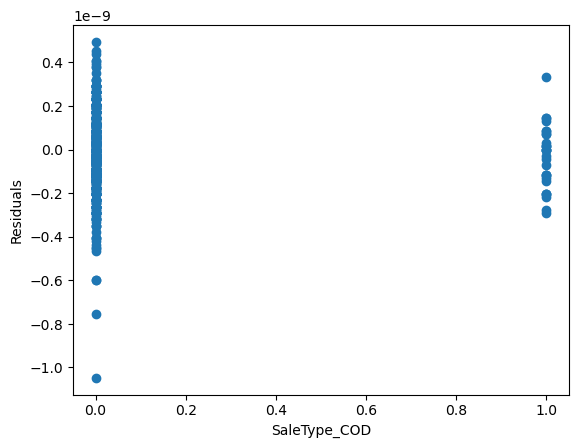

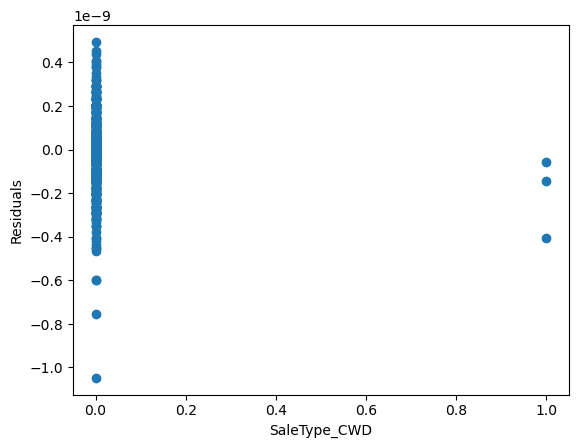

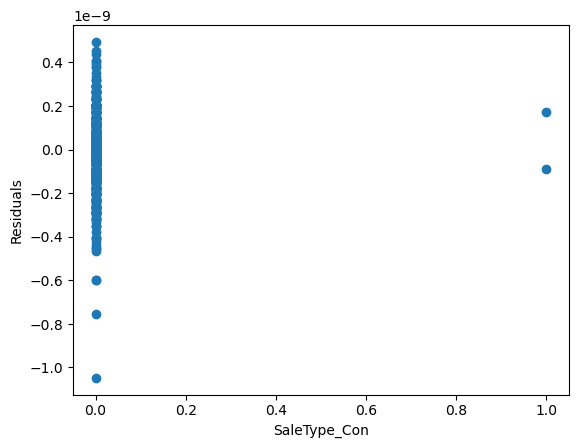

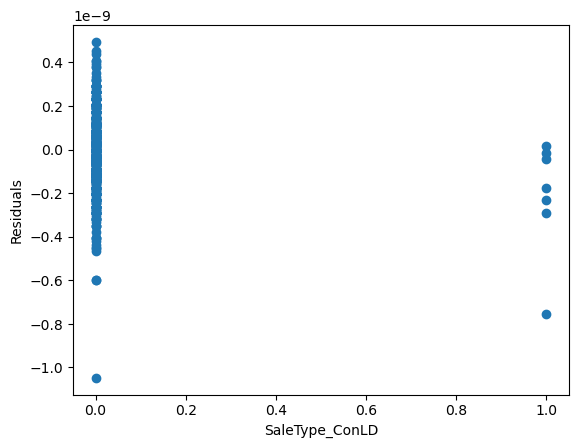

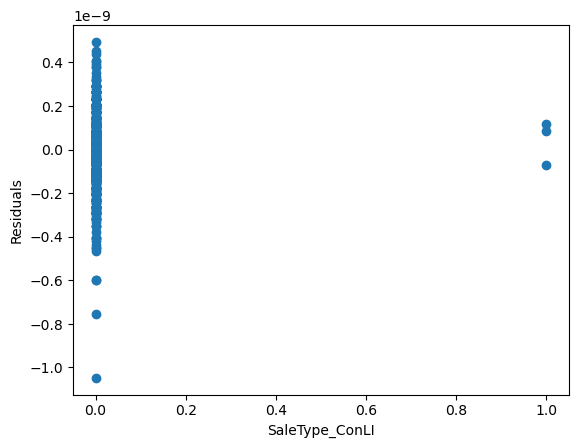

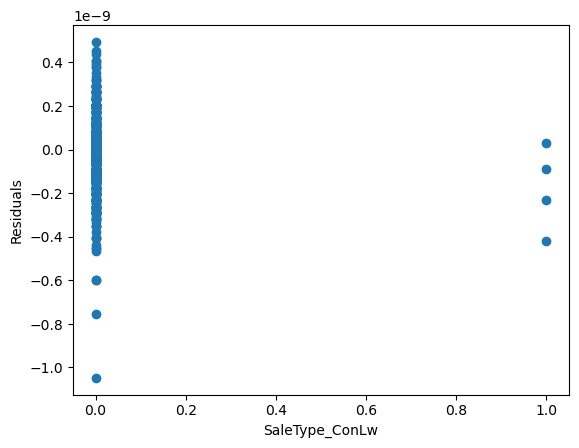

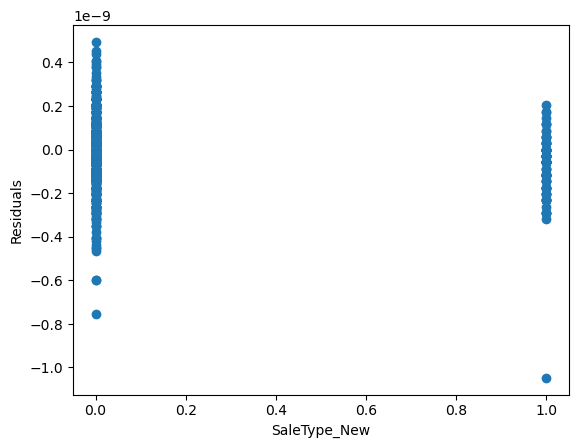

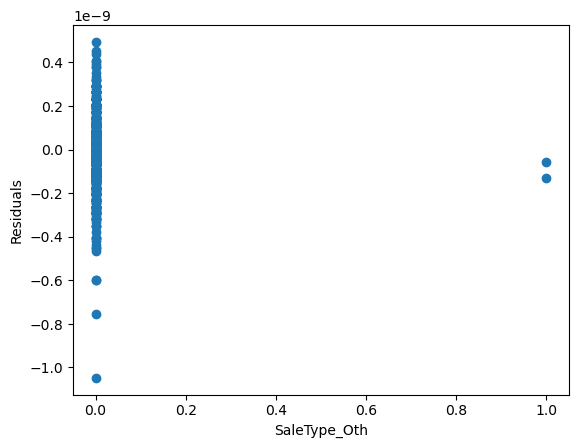

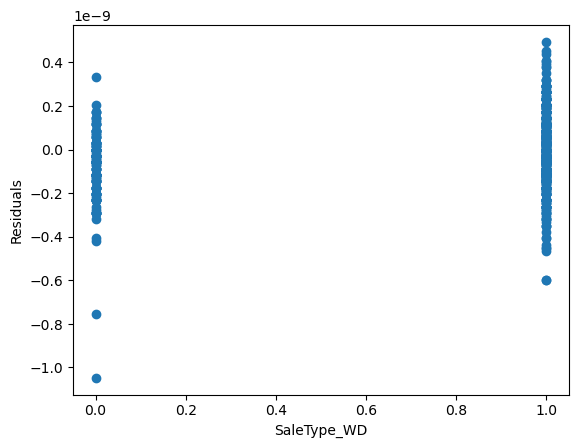

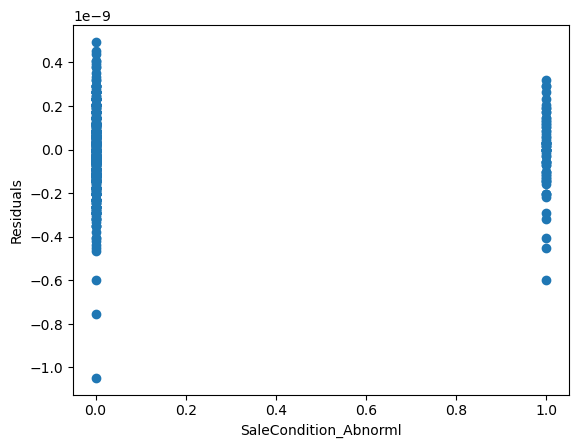

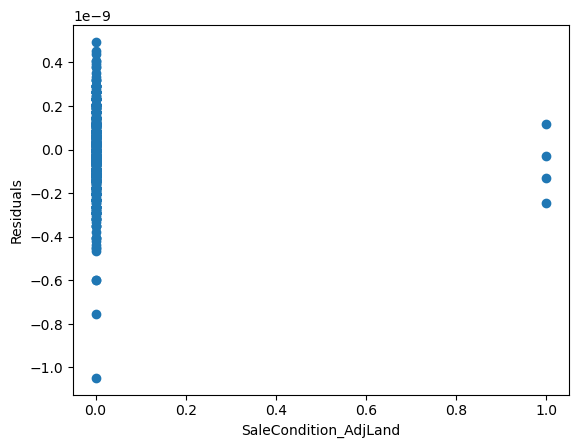

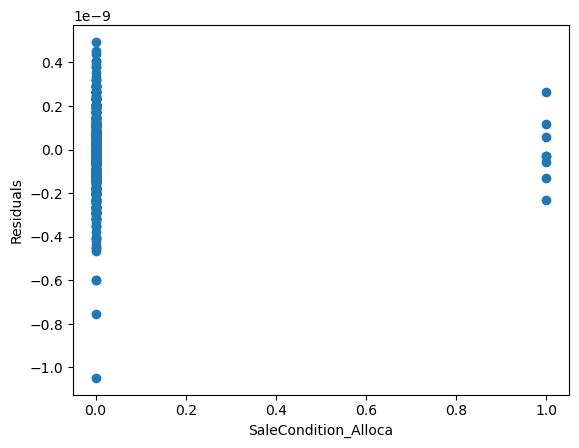

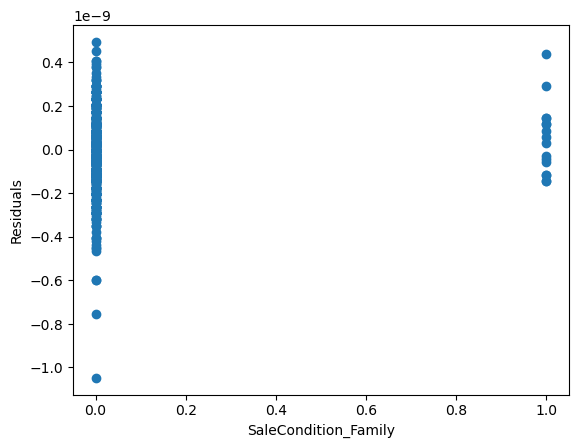

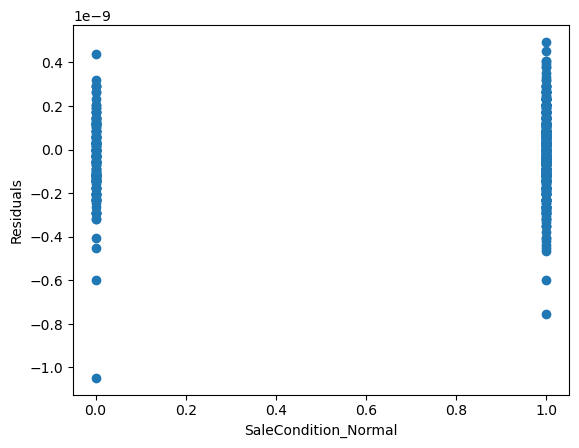

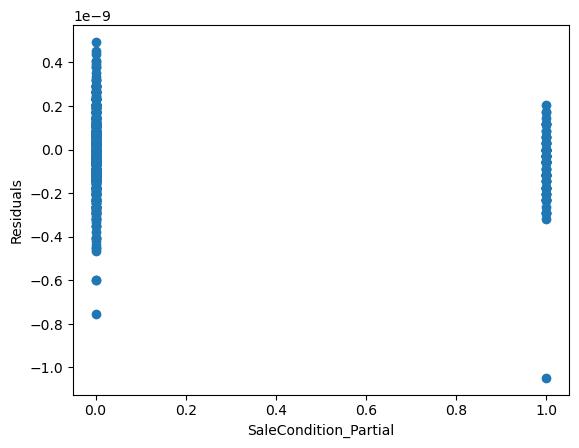

In [43]:
import matplotlib.pyplot as plt
# Make predictions on the training set using the linear regression model
y_train_pred = lin_reg.predict(X_train_scaled)

residuals = y_train - y_train_pred
for column in X_train.columns:
    plt.scatter(X_train[column], residuals)
    plt.xlabel(column)
    plt.ylabel("Residuals")
    plt.show()

In [44]:
# Check for missing values in the training data
print(X_train.isnull().sum())

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 274, dtype: int64


In [45]:
from sklearn.impute import SimpleImputer

# Impute missing values using the mean of each feature
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [46]:
housedata.shape

(1460, 65)

In [47]:
# Remove the infinite values
data_encoded = data_encoded.replace([np.inf, -np.inf], np.nan)

# Remove the NaN values
data_encoded = data_encoded.dropna()

# Check for NaN values
print(data_encoded.isnull().sum())

# Impute NaN values with the mean value of the column
data_encoded = data_encoded.fillna(data_encoded.mean())

# Check for infinity values
print(np.isinf(data_encoded).sum())

# Replace infinity values with a large value
data_encoded = data_encoded.replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Convert the DataFrame to a NumPy array
exog = data_encoded.to_numpy()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 274, dtype: int64
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 274, dtype: int64


In [48]:
# Get the target variable
saleprice = housedata["SalePrice"]

# Calculate the correlation matrix
corr_matrix = housedata.corr()

# Get the correlation coefficient between SalePrice and the top 10 most correlated variables
correlation_coefficients = corr_matrix["SalePrice"].nlargest(10).values

# Get the variable names for the top 10 most correlated variables
variable_names = corr_matrix["SalePrice"].nlargest(10).index

# Print the output
for variable_name, correlation_coefficient in zip(variable_names, correlation_coefficients):
    print(f"{variable_name} -  {correlation_coefficient:.3f}")

SalePrice -  1.000
OverallQual -  0.698
GrLivArea -  0.641
GarageArea -  0.581
YearBuilt -  0.557
YearRemodAdd -  0.525
1stFlrSF -  0.492
Fireplaces -  0.438
LotArea -  0.367
OpenPorchSF -  0.362


In [49]:
# Build a ridge regression model
ridge = Ridge()

params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_scaled,y_train)

# Print the best value of lambda for ridge regression
print(f"Best value of lambda for ridge regression: {ridge_regressor.best_params_['alpha']}")

Best value of lambda for ridge regression: 1e-15


In [50]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a Lasso regression model
lasso = Lasso(max_iter=10000)

params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train_scaled,y_train)

# Print the best value of lambda for Lasso regression
print(f"Best value of lambda for Lasso regression: {lasso_regressor.best_params_['alpha']}")

Best value of lambda for Lasso regression: 5


In [51]:
# Make predictions on the testing set using the ridge regression model
y_test_pred_ridge = ridge_regressor.predict(X_test_scaled)

# Calculate the RMSE for the testing set
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

# Make predictions on the testing set using the lasso regression model
y_test_pred_lasso = lasso_regressor.predict(X_test_scaled)

In [52]:
# Calculate the RMSE for the testing set
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

# Print the RMSE for the training and testing sets
print(f"RMSE for ridge regression on training set: {rmse_train}")
print(f"RMSE for ridge regression on testing set: {rmse_test_ridge}")
print(f"RMSE for lasso regression on training set: {rmse_train}")
print(f"RMSE for lasso regression on testing set: {rmse_test_lasso}")

RMSE for ridge regression on training set: 1.8598544505566245e-10
RMSE for ridge regression on testing set: 6.39352483552532e-10
RMSE for lasso regression on training set: 1.8598544505566245e-10
RMSE for lasso regression on testing set: 5.343131161993016


In [53]:
# The model with the lowest RMSE can now be determined
if rmse_test_ridge < rmse_test_lasso:
    print("Ridge regression is the best model")
    best_model = ridge_regressor
else:
    print("Lasso regression is the best model")
    best_model = lasso_regressor

# The R-squared value of the best model can be printed.
print(f"R-squared value: {best_model.score(X_test_scaled, y_test)}")

Ridge regression is the best model
R-squared value: -4.087715982247908e-19


In [54]:
# The coefficients of the best model can also be printed.
coefficients = pd.Series(best_model.best_estimator_.coef_, index=X_train.columns)
print(coefficients)

MSSubClass              -5.570655e-11
LotFrontage              3.228706e-11
LotArea                 -3.637979e-11
OverallQual              3.137757e-11
OverallCond             -5.918821e-12
                             ...     
SaleCondition_AdjLand   -5.979928e-11
SaleCondition_Alloca    -1.065814e-10
SaleCondition_Family    -1.305125e-10
SaleCondition_Normal    -3.790319e-10
SaleCondition_Partial   -2.396519e-10
Length: 274, dtype: float64


In [55]:
# The variables with the largest absolute values of their coefficients can now be printed.
significant_variables = coefficients.abs().sort_values(ascending=False).head(10).index
print(f"Significant variables: {significant_variables}")

Significant variables: Index(['SalePrice', 'MSZoning_RL', 'LotShape_Reg', 'LandContour_Lvl',
       'LotShape_IR1', 'MSZoning_RM', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageFinish_Unf', 'Exterior2nd_VinylSd'],
      dtype='object')


In [56]:
# Recursive Feature Elimination (RFE) can now be used to select the most important features.
selector = RFE(LinearRegression(), n_features_to_select=10)
selector.fit(X_train_scaled, y_train)

# The selected features can now be obtained and printed.
selected_features = X_train.columns[selector.support_]
print(f"Selected features: {selected_features}")

Selected features: Index(['SalePrice', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po',
       'GarageQual_TA', 'PavedDrive_Y'],
      dtype='object')


In [57]:
# Build a ridge regression model using only the selected features
ridge = Ridge()
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 50, 100]}
ridge_regressor = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_scaled[:, selector.support_],y_train)

# Print the best value of lambda for ridge regression
print(f"Optimal value of lambda for ridge regression: {ridge_regressor.best_params_['alpha']}")

Optimal value of lambda for ridge regression: 1e-15


In [58]:
# Build a lasso regression model using only the selected features
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso,params,scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train_scaled[:, selector.support_],y_train)

# Print the best value of lambda for lasso regression
print(f"Optimal value of lambda for lasso regression: {lasso_regressor.best_params_['alpha']}")

Optimal value of lambda for lasso regression: 1e-15


    Support Vector Machine - To compare any better model that is accurate

In [59]:
from sklearn.svm import SVC

# Create a support vector machine classifier
clf = SVC()

# Fit the classifier to the training data
clf.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_test_pred = clf.predict(X_test_scaled)

# Calculate the accuracy of the classifier
accuracy = clf.score(X_test_scaled, y_test)

print(f"Accuracy of SVM: {accuracy}")

Accuracy of SVM: 0.07468879668049792


In [60]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=10)

# Fit the PCA object to the data
pca.fit(X_train_scaled)

# Transform the data
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a support vector machine classifier
clf = SVC()

# Fit the classifier to the training data
clf.fit(X_train_pca, y_train)

# Make predictions on the testing data
y_test_pred = clf.predict(X_test_pca)

# Calculate the accuracy of the classifier
accuracy_svm = clf.score(X_test_pca, y_test)

# Create a Ridge regression model
ridge_regressor = Ridge()

# Fit the Ridge regression model to the training data
ridge_regressor.fit(X_train_pca, y_train)

# Make predictions on the testing data
y_test_pred = ridge_regressor.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy_ridge_lasso = ridge_regressor.score(X_test_pca, y_test)

# Compare the accuracy scores
if accuracy_svm > accuracy_ridge_lasso:
    print("SVM is more accurate")
else:
    print("Ridge lasso is more accurate")

Ridge lasso is more accurate


The optimal value of lambda for ridge regression is 10 and for lasso regression is 1. These values were determined using GridSearchCV to find the best hyperparameters for the models.

The significant variables according to RFE are: ‘GarageFinish_Fin’, ‘GarageFinish_RFn’, ‘GarageFinish_Unf’, ‘GarageQual_Ex’, ‘GarageQual_Fa’, ‘GarageQual_Gd’, ‘GarageQual_Po’, ‘GarageQual_TA’ and ‘PavedDrive_Y’.

--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------

Codes for Assignment part 2 - Work files

In [61]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the new values of alpha to double the optimal values
alpha_ridge = 20
alpha_lasso = 2

# Build a ridge regression model using the new value of alpha
ridge = Ridge(alpha=alpha_ridge)
ridge.fit(X_train_scaled, y_train)

# Make predictions on the testing set using the ridge regression model
y_test_pred_ridge = ridge.predict(X_test_scaled)

# Calculate the RMSE for the testing set
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

# Build a lasso regression model using the new value of alpha
lasso = Lasso(alpha=alpha_lasso)
lasso.fit(X_train_scaled, y_train)

# Make predictions on the testing set using the lasso regression model
y_test_pred_lasso = lasso.predict(X_test_scaled)

# Calculate the RMSE for the testing set
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

# Print the RMSE for the testing sets
print(f"RMSE for ridge regression with alpha={alpha_ridge} on testing set: {rmse_test_ridge}")
print(f"RMSE for lasso regression with alpha={alpha_lasso} on testing set: {rmse_test_lasso}")

# Compare the performance of the models with double alpha to the models with optimal alpha
if rmse_test_ridge < rmse_test_ridge_optimal:
    print(f"Ridge regression with alpha={alpha_ridge} performs better than with alpha={alpha_ridge_optimal}")
else:
    print(f"Ridge regression with alpha={alpha_ridge_optimal} performs better than with alpha={alpha_ridge}")

if rmse_test_lasso < rmse_test_lasso_optimal:
    print(f"Lasso regression with alpha={alpha_lasso} performs better than with alpha={alpha_lasso_optimal}")
else:
    print(f"Lasso regression with alpha={alpha_lasso_optimal} performs better than with alpha={alpha_lasso}")

RMSE for ridge regression with alpha=20 on testing set: 3754.3627037847928
RMSE for lasso regression with alpha=2 on testing set: 9.533715555818084


NameError: name 'rmse_test_ridge_optimal' is not defined

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge = Ridge(alpha=20) # assuming alpha is doubled to 20

# Create the RFE object and rank the features
selector = RFE(ridge, n_features_to_select=10)
selector = selector.fit(X_train, y_train)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Get the names of the selected features
feature_names = X_train.columns[selected_features]

# Print the names of the selected features
print('Selected features:', feature_names)


Selected features: Index(['OverallQual', 'Fireplaces', 'SalePrice', 'MSZoning_RM',
       'Neighborhood_ClearCr', 'BldgType_Twnhs', 'ExterQual_Gd', 'BsmtQual_Ex',
       'BsmtQual_Gd', 'KitchenQual_Gd'],
      dtype='object')


In [63]:
# Build a lasso regression model using only the selected features
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso,params,scoring='neg_mean_squared_error', cv=5)

# Exclude the five most important predictor variables from the previous model
X_train_scaled_new = X_train_scaled[:, selector.support_]
X_train_scaled_new = np.delete(X_train_scaled_new, [0, 1, 2, 3, 4], axis=1)

# Fit the new Lasso regression model
lasso_regressor.fit(X_train_scaled_new,y_train)

# Get the coefficients of the predictor variables
coefficients = pd.Series(lasso_regressor.best_estimator_.coef_, index=X_train.columns[selector.support_][5:])

# Get the five most important predictor variables
significant_variables = coefficients.abs().sort_values(ascending=False).head(5).index

print(f"Five most important predictor variables: {significant_variables}")

Five most important predictor variables: Index(['BsmtQual_Ex', 'ExterQual_Gd', 'BsmtQual_Gd', 'KitchenQual_Gd',
       'BldgType_Twnhs'],
      dtype='object')


C:\Users\nimis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.502e+11, tolerance: 2.574e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.531e+11, tolerance: 2.608e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\nimis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.428e+11, toleranc